# FEATURE ENGINEERING
ASSIGNMENT 1 – EXPLORATORY DATA ANALYSIS (EDA)

The “adult” data set was extracted from the census bureau database of US. This dataset was used in a prediction task to determine whether a person makes over 50K a year. 
You need to use the dataset link provided in the reference section for attempting this assignment. “adult.names” and “adult.data” are the required files. Following is the information about the columns (names can vary):
•	income: >50K, <=50K.
•	age: continuous.
•	workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
•	fnlwgt: continuous.
•	education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
•	education-num: continuous.
•	marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
•	occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
•	relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
•	race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
•	sex: Female, Male.
•	capital-gain: continuous.
•	capital-loss: continuous.
•	hours-per-week: continuous.
•	native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


1.	What are the different types of variables are present in the dataset? Construct a data frame of first 20 and last records of the dataset. 
2.	Investigate the presence of correlated variables.
3.	For each of the categorical variables, construct a bar chart of the variable, with an overlay of the target variable. Normalize if necessary. 
a.	Discuss the relationship, if any, each of these variables has with the target variable.
b.	Which variables would you expect to make a significant appearance in any data mining classification model?
4.	For each pair of categorical variables, construct a cross tabulation. Discuss the results.
5.	Report on whether anomalous fields exist in this dataset, based on your EDA, which are these fields and what should be done about it.
6.	Report the mean, median, minimum, maximum and standard deviation of each of the numeric variables.
7.	Construct a histogram of each numerical variables, with an overlay of the target variable income. 
a.	Discuss the relationship, if any, each of these variables has with the target variable.
b.	Which variables would you expect to make a significant appearance in any data mining classification model?
8.	For each pair of numeric variables, construct a scatter plot of the variables. Discuss the results.
9.	Based on your EDA so far, identify the interesting sub-groups of records within the dataset that would be worth further investigation.
10.	Summarize your salient EDA findings from the above exercises, just as if you were writing a report. 


# Importing libraries

In [7]:
#Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import skew
from matplotlib.colors import ListedColormap

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

# 1. What are the different types of variables are present in the dataset? Construct a data frame of first 20 and last records of the dataset. 

In [9]:

# Preprocessing Input data
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12,8)
col_Names=["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]
df = pd.read_csv('adult.data',names=col_Names)
print(df.shape)

#construct data frame of first 20 and last 20 records
df_start = df.head(20)
df_end = df.tail(20)
df_concat = df_start.append(df_end)
print(df_concat)


(32561, 15)
       age          workclass  fnlwgt      education  education_num  \
0       39          State-gov   77516      Bachelors             13   
1       50   Self-emp-not-inc   83311      Bachelors             13   
2       38            Private  215646        HS-grad              9   
3       53            Private  234721           11th              7   
4       28            Private  338409      Bachelors             13   
5       37            Private  284582        Masters             14   
6       49            Private  160187            9th              5   
7       52   Self-emp-not-inc  209642        HS-grad              9   
8       31            Private   45781        Masters             14   
9       42            Private  159449      Bachelors             13   
10      37            Private  280464   Some-college             10   
11      30          State-gov  141297      Bachelors             13   
12      23            Private  122272      Bachelors             

1. Data set consists of 32561 rows and 15 columns.
2. Variabled present in dataframe are - "age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"
3. 6 Numerical(discrete)- age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
4. 9 Categorical- 
8 nominal values- workclass, education, marital-status, occupation, relationship, race, sex, native-country, 1 ordinal value - income

# Data Exploration

In [10]:
#Describe the dataset
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [11]:
#look at random sample
df.sample(15)

age          workclass  fnlwgt     education  education_num  \
27498   25                  ?  100903     Bachelors             13   
30859   35            Private  220943       HS-grad              9   
14479   27            Private  166350       HS-grad              9   
11509   74            Private  183701          10th              6   
13200   35   Self-emp-not-inc  350247   Prof-school             15   
24426   39            Private  147500       HS-grad              9   
11205   51            Private   89652       HS-grad              9   
20824   23            Private  272185     Assoc-voc             11   
15859   22            Private  202416     Bachelors             13   
22326   47            Private  202322       5th-6th              3   
27935   57                  ?  188877           9th              5   
4709    38            Private  179668     Bachelors             13   
12481   44            Private  190739       HS-grad              9   
27001   45            Private  102202     Assoc-voc             11   
2613    19            Private   57067       HS-grad              9   

            marital_status          occupation     relationship    race  \
27498   Married-civ-spouse                   ?             Wife   White   
30859             Divorced       Other-service        Unmarried   Black   
14479        Never-married               Sales    Not-in-family   White   
11509              Widowed       Other-service    Not-in-family   Black   
13200   Married-civ-spouse      Prof-specialty          Husband   White   
24426   Married-civ-spouse      Prof-specialty             Wife   Black   
11205             Divorced        Adm-clerical        Unmarried   White   
20824        Never-married        Craft-repair        Own-child   White   
15859        Never-married        Adm-clerical        Own-child   White   
22326   Married-civ-spouse   Handlers-cleaners          Husband   White   
27935             Divorced                   ?    Not-in-family   White   
4709    Married-civ-spouse      Prof-specialty          Husband   White   
12481        Never-married       Other-service   Other-relative   Black   
27001             Divorced        Adm-clerical    Not-in-family   White   
2613         Never-married   Machine-op-inspct   Other-relative   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
27498   Female             0             0              25   United-States   
30859   Female             0          1594              40   United-States   
14479     Male             0             0              50   United-States   
11509   Female             0             0               6   United-States   
13200     Male             0             0              50   United-States   
24426   Female             0             0              40   United-States   
11205   Female          4787             0              24   United-States   
20824     Male             0             0              33   United-States   
15859   Female             0             0              40   United-States   
22326     Male             0             0              40          Mexico   
27935     Male             0             0              40   United-States   
4709      Male             0             0              50   United-States   
12481     Male             0             0              32   United-States   
27001   Female             0             0              40   United-States   
2613      Male             0             0              45   United-States   

       income  
27498   <=50K  
30859   <=50K  
14479   <=50K  
11509   <=50K  
13200    >50K  
24426   <=50K  
11205    >50K  
20824   <=50K  
15859   <=50K  
22326   <=50K  
27935   <=50K  
4709     >50K  
12481   <=50K  
27001   <=50K  
2613    <=50K

# 2. Investigate the presence of correlated variables.

                     age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.078141       0.066345      0.124948      0.058484   
fnlwgt         -0.078141  1.000000      -0.035706     -0.006039     -0.006914   
education_num   0.066345 -0.035706       1.000000      0.119140      0.074749   
capital_gain    0.124948 -0.006039       0.119140      1.000000     -0.066569   
capital_loss    0.058484 -0.006914       0.074749     -0.066569      1.000000   
hours_per_week  0.142907 -0.021621       0.167215      0.093322      0.059852   

                hours_per_week  
age                   0.142907  
fnlwgt               -0.021621  
education_num         0.167215  
capital_gain          0.093322  
capital_loss          0.059852  
hours_per_week        1.000000  


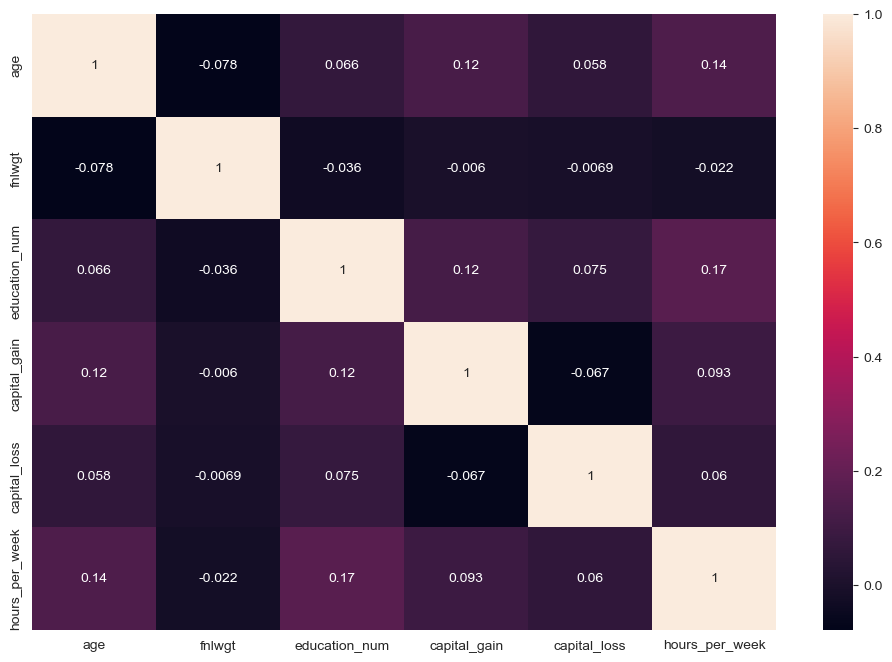

In [12]:
#Find correlation between features and plot heatmap for all the numerical values.
#lets plot heatmap using spearman correlation

spearman_corr= df.corr('spearman')
print(spearman_corr)
sns.heatmap(spearman_corr, annot=True)
plt.show()

From the heatmap following is evident:
1. The diagonal values represent correllation to itself. +1 values indicate strong positive relation. -1 indicates strong negative relation. 
2. Among numerical fields, not any are very strongly related, although less significant relation is seen among below variables-
2a. age and capital-gain- 0.12
2b. age and hours-per-week - 0.14
2c. education-num and capital-gain - 0.12
2d. educqtion-num and hours-per-week - 0.17

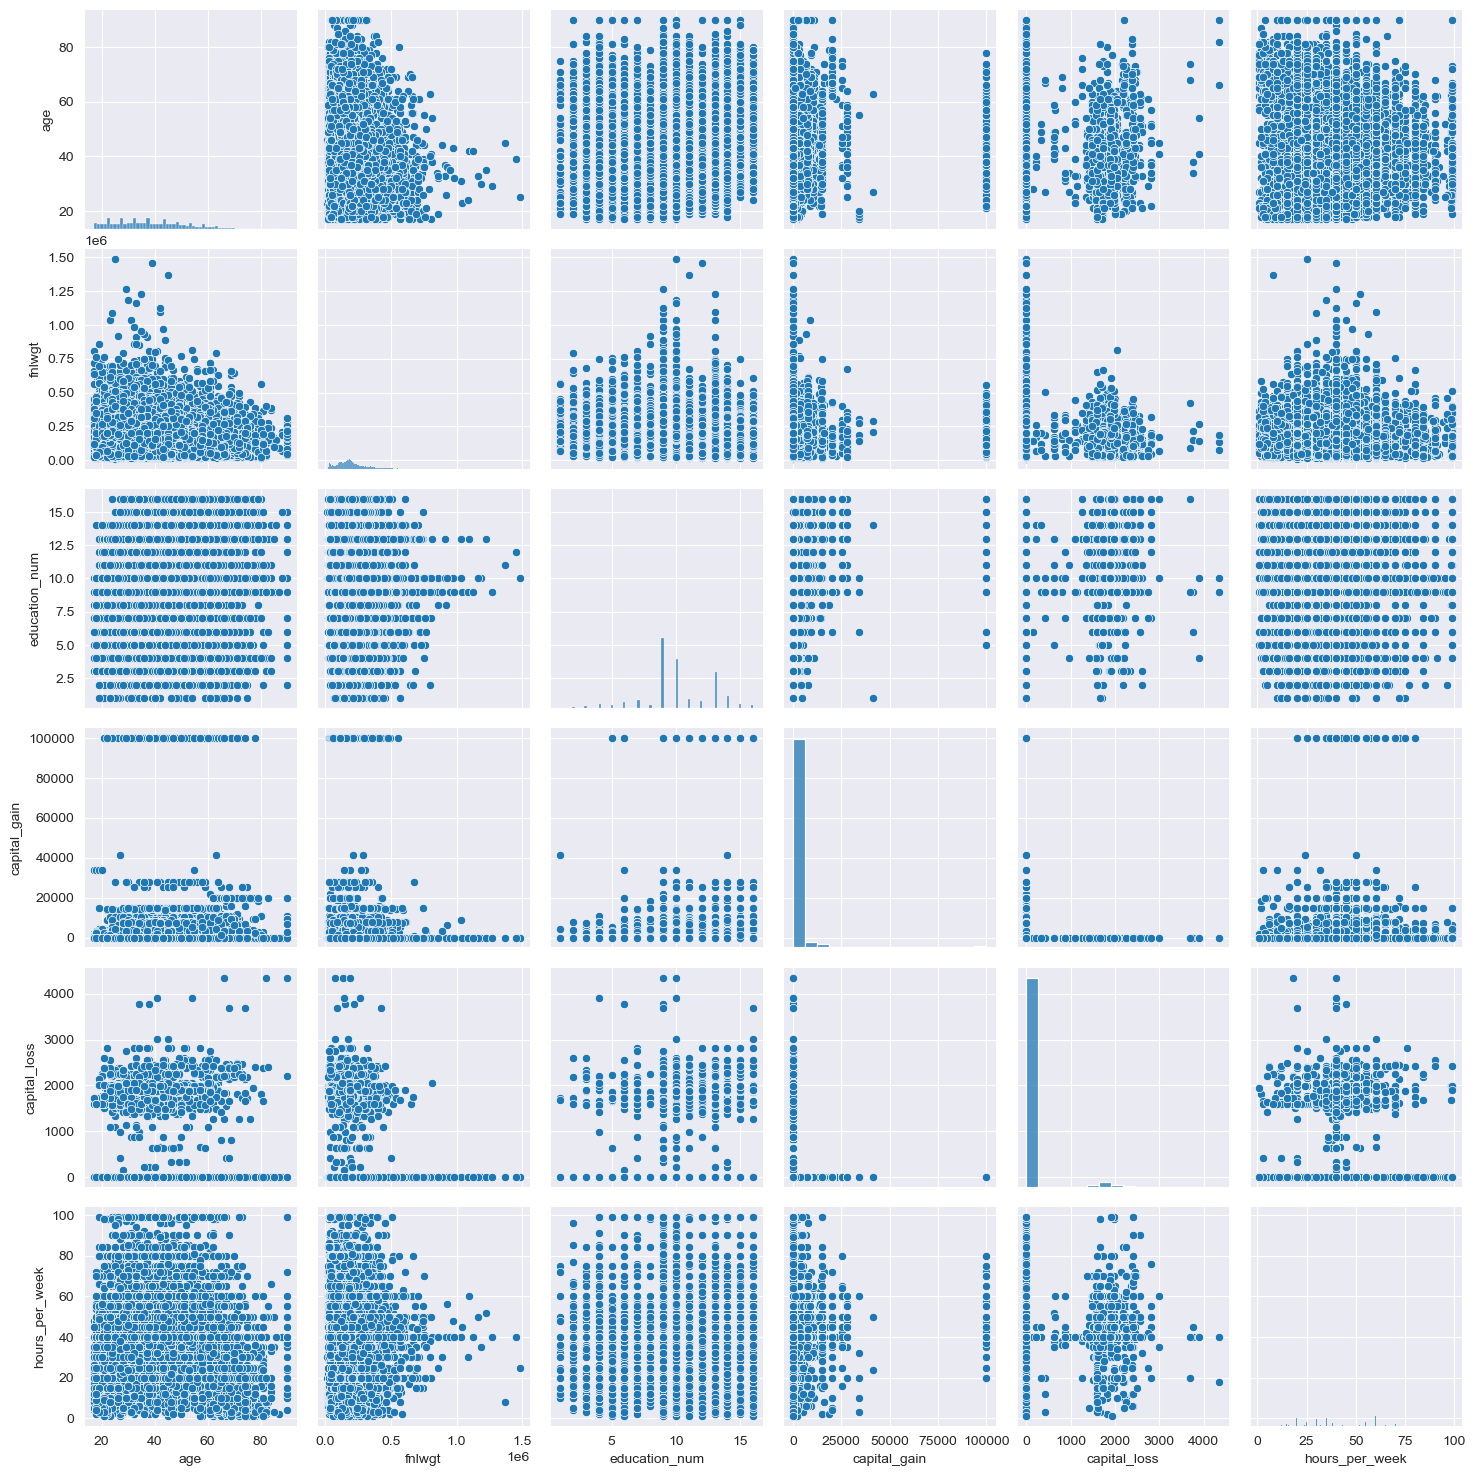

In [13]:
#Pairplot between features of numerical data
sns.pairplot(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])

From histogram and scatterplot,
The diagonal plots represent distribution of the variable relative to itself
Lets see relationship between features:
1. age and hours-per-week : The plot shows with increasing age, hours-per-week decreases.
2. age and capital-gain: There seems to be 2 categories of people.One who make <25000 capital gain and another with capital gain >100000. fnlwgt/capital gain and education-num/captial-gain too shows similar relation.
3. age and capital-loss: there seems to be 3 categories of people. One making 0 capital loss, another falling between 2000 to 3000 capital -loss. Another very few incurring loss of 4000.fnlwgt/capital-loss and education-num/capital-loss too shows similar relation.
4. There are significant rows with 0 capital gain and capital loss across all age groups.

## Analyze frequency distribution of categorical data
    workclass, education, marital-status, occupation, relationship, race, sex, native-country, income

                     age  fnlwgt  education  education_num  marital_status  \
workclass                                                                    
 ?                  1836    1836       1836           1836            1836   
 Federal-gov         960     960        960            960             960   
 Local-gov          2093    2093       2093           2093            2093   
 Never-worked          7       7          7              7               7   
 Private           22696   22696      22696          22696           22696   
 Self-emp-inc       1116    1116       1116           1116            1116   
 Self-emp-not-inc   2541    2541       2541           2541            2541   
 State-gov          1298    1298       1298           1298            1298   
 Without-pay          14      14         14             14              14   

                   occupation  relationship   race    sex  capital_gain  \
workclass                                                         

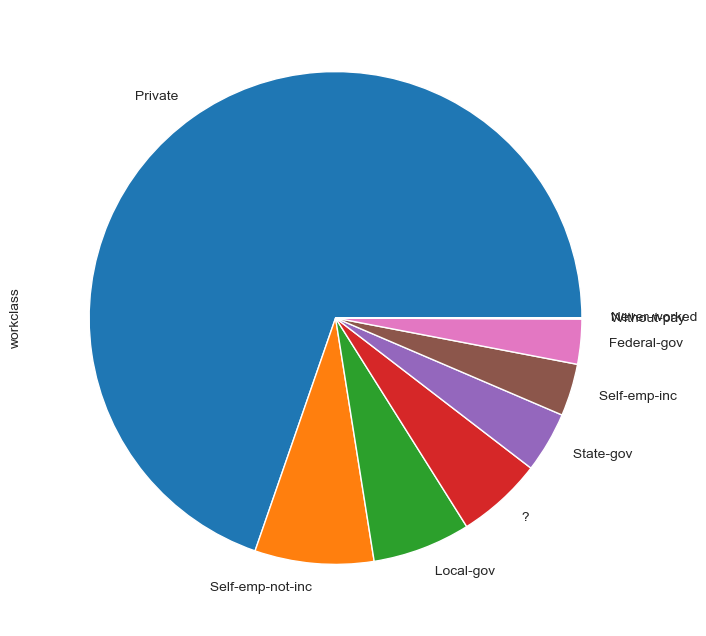

In [14]:

print(df.groupby(['workclass']).count())

#plot the pie chart of sex data
df.workclass.value_counts(normalize=True).plot.pie()
plt.show()

                 age  workclass  fnlwgt  education_num  marital_status  \
education                                                                
 10th            933        933     933            933             933   
 11th           1175       1175    1175           1175            1175   
 12th            433        433     433            433             433   
 1st-4th         168        168     168            168             168   
 5th-6th         333        333     333            333             333   
 7th-8th         646        646     646            646             646   
 9th             514        514     514            514             514   
 Assoc-acdm     1067       1067    1067           1067            1067   
 Assoc-voc      1382       1382    1382           1382            1382   
 Bachelors      5355       5355    5355           5355            5355   
 Doctorate       413        413     413            413             413   
 HS-grad       10501      10501   1050

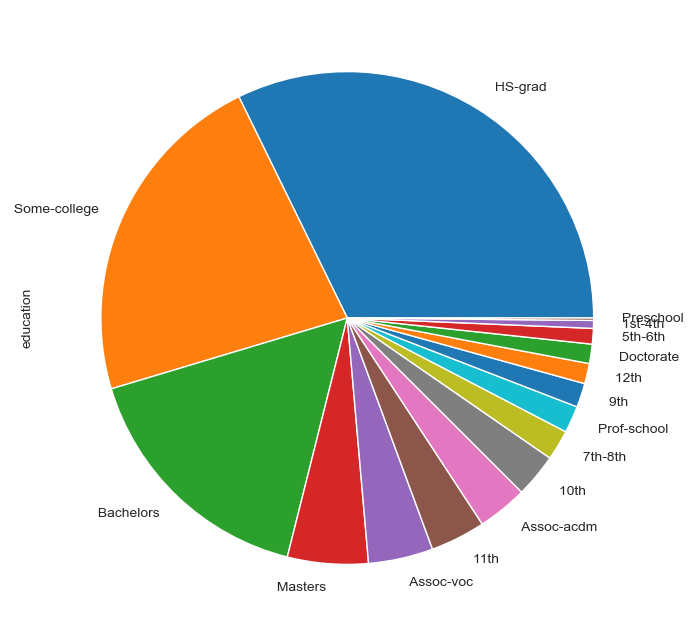

In [15]:
print(df.groupby(['education']).count())

df.education.value_counts(normalize=True).plot.pie()
plt.show()

                          age  workclass  fnlwgt  education  education_num  \
marital_status                                                               
 Divorced                4443       4443    4443       4443           4443   
 Married-AF-spouse         23         23      23         23             23   
 Married-civ-spouse     14976      14976   14976      14976          14976   
 Married-spouse-absent    418        418     418        418            418   
 Never-married          10683      10683   10683      10683          10683   
 Separated               1025       1025    1025       1025           1025   
 Widowed                  993        993     993        993            993   

                        occupation  relationship   race    sex  capital_gain  \
marital_status                                                                 
 Divorced                     4443          4443   4443   4443          4443   
 Married-AF-spouse              23            23     23  

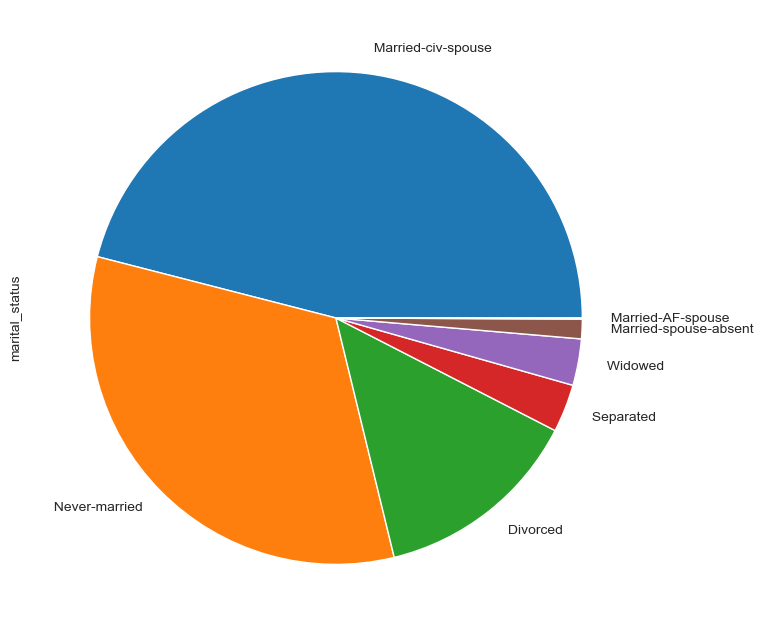

In [16]:
print(df.groupby(['marital_status']).count())
df.marital_status.value_counts(normalize=True).plot.pie()
plt.show()

                     age  workclass  fnlwgt  education  education_num  \
occupation                                                              
 ?                  1843       1843    1843       1843           1843   
 Adm-clerical       3770       3770    3770       3770           3770   
 Armed-Forces          9          9       9          9              9   
 Craft-repair       4099       4099    4099       4099           4099   
 Exec-managerial    4066       4066    4066       4066           4066   
 Farming-fishing     994        994     994        994            994   
 Handlers-cleaners  1370       1370    1370       1370           1370   
 Machine-op-inspct  2002       2002    2002       2002           2002   
 Other-service      3295       3295    3295       3295           3295   
 Priv-house-serv     149        149     149        149            149   
 Prof-specialty     4140       4140    4140       4140           4140   
 Protective-serv     649        649     649        

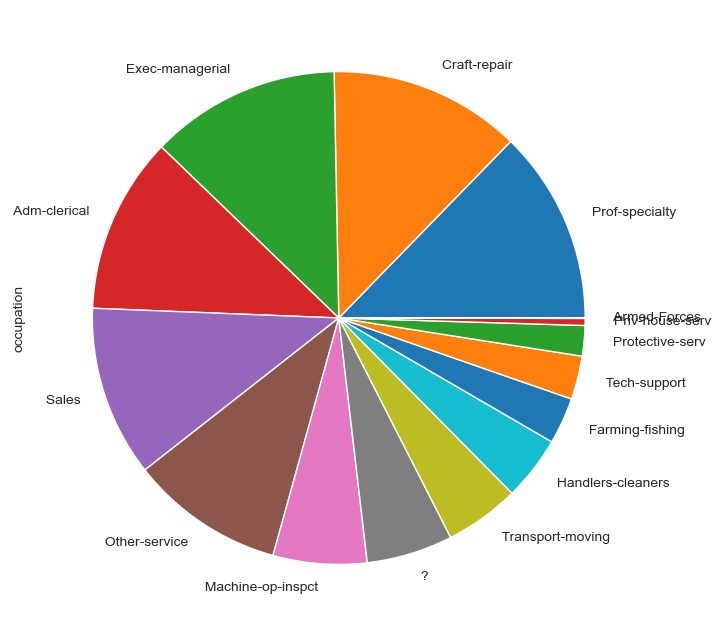

In [17]:
print(df.groupby(['occupation']).count())

df.occupation.value_counts(normalize=True).plot.pie()
plt.show()


                   age  workclass  fnlwgt  education  education_num  \
relationship                                                          
 Husband         13193      13193   13193      13193          13193   
 Not-in-family    8305       8305    8305       8305           8305   
 Other-relative    981        981     981        981            981   
 Own-child        5068       5068    5068       5068           5068   
 Unmarried        3446       3446    3446       3446           3446   
 Wife             1568       1568    1568       1568           1568   

                 marital_status  occupation   race    sex  capital_gain  \
relationship                                                              
 Husband                  13193       13193  13193  13193         13193   
 Not-in-family             8305        8305   8305   8305          8305   
 Other-relative             981         981    981    981           981   
 Own-child                 5068        5068   5068   506

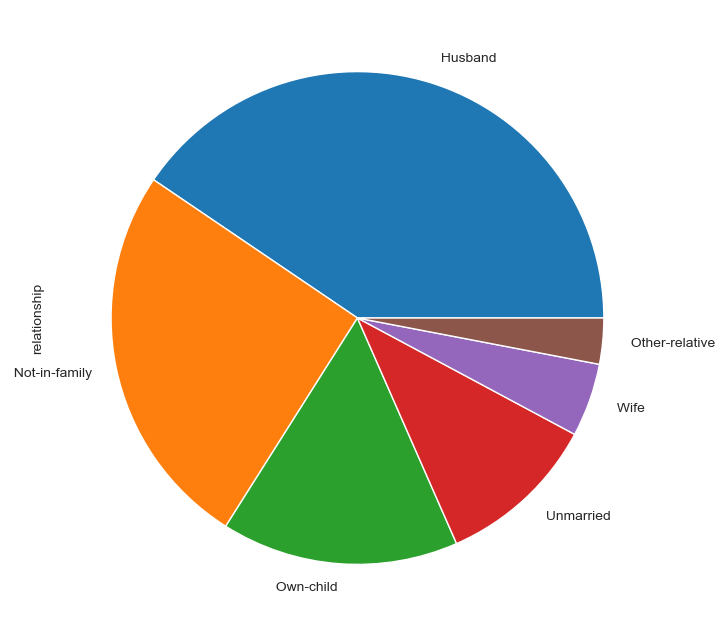

In [18]:
print(df.groupby(['relationship']).count())

df.relationship.value_counts(normalize=True).plot.pie()
plt.show()

                       age  workclass  fnlwgt  education  education_num  \
race                                                                      
 Amer-Indian-Eskimo    311        311     311        311            311   
 Asian-Pac-Islander   1039       1039    1039       1039           1039   
 Black                3124       3124    3124       3124           3124   
 Other                 271        271     271        271            271   
 White               27816      27816   27816      27816          27816   

                     marital_status  occupation  relationship    sex  \
race                                                                   
 Amer-Indian-Eskimo             311         311           311    311   
 Asian-Pac-Islander            1039        1039          1039   1039   
 Black                         3124        3124          3124   3124   
 Other                          271         271           271    271   
 White                        27816       

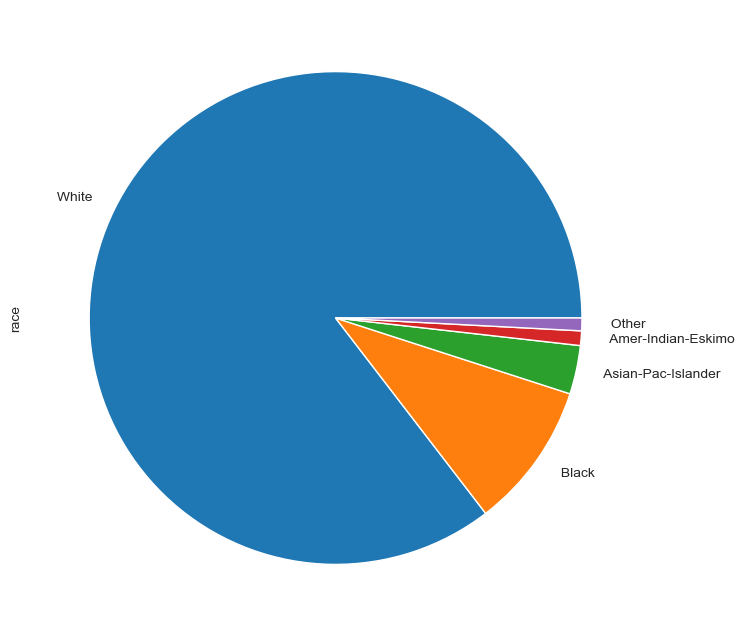

In [19]:
print(df.groupby(['race']).count())

df.race.value_counts(normalize=True).plot.pie()
plt.show()

           age  workclass  fnlwgt  education  education_num  marital_status  \
sex                                                                           
 Female  10771      10771   10771      10771          10771           10771   
 Male    21790      21790   21790      21790          21790           21790   

         occupation  relationship   race  capital_gain  capital_loss  \
sex                                                                    
 Female       10771         10771  10771         10771         10771   
 Male         21790         21790  21790         21790         21790   

         hours_per_week  native_country  income  
sex                                              
 Female           10771           10771   10771  
 Male             21790           21790   21790  


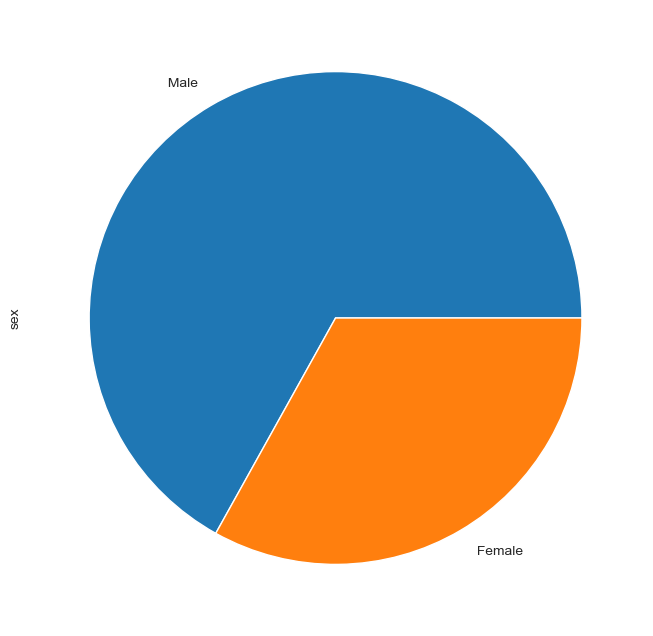

In [20]:

print(df.groupby(['sex']).count())

df.sex.value_counts(normalize=True).plot.pie()
plt.show()

                               age  workclass  fnlwgt  education  \
native_country                                                     
 ?                             583        583     583        583   
 Cambodia                       19         19      19         19   
 Canada                        121        121     121        121   
 China                          75         75      75         75   
 Columbia                       59         59      59         59   
 Cuba                           95         95      95         95   
 Dominican-Republic             70         70      70         70   
 Ecuador                        28         28      28         28   
 El-Salvador                   106        106     106        106   
 England                        90         90      90         90   
 France                         29         29      29         29   
 Germany                       137        137     137        137   
 Greece                         29         29   

 Yugoslavia                            16              16      16  


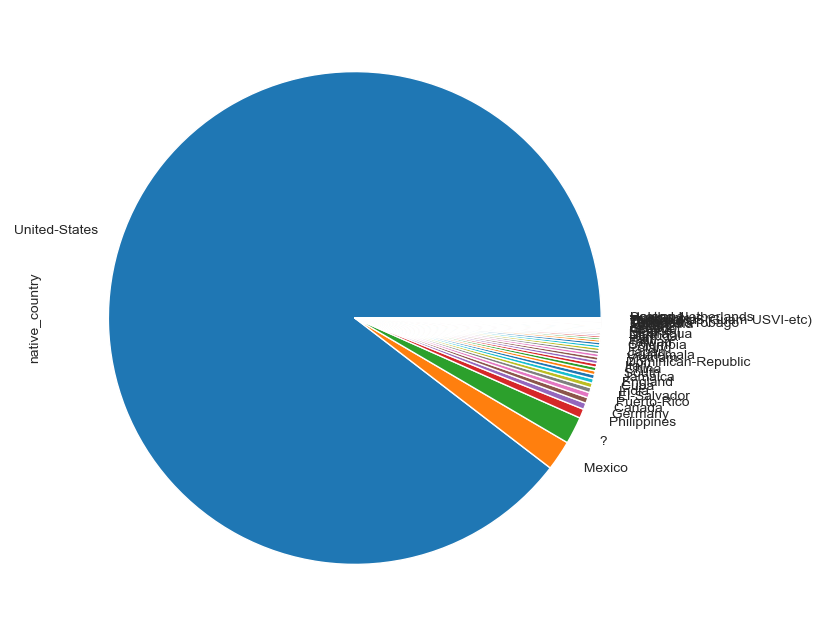

In [21]:
print(df.groupby(['native_country']).count())

df.native_country.value_counts(normalize=True).plot.pie()
plt.show()

          age  workclass  fnlwgt  education  education_num  marital_status  \
income                                                                       
 <=50K  24720      24720   24720      24720          24720           24720   
 >50K    7841       7841    7841       7841           7841            7841   

        occupation  relationship   race    sex  capital_gain  capital_loss  \
income                                                                       
 <=50K       24720         24720  24720  24720         24720         24720   
 >50K         7841          7841   7841   7841          7841          7841   

        hours_per_week  native_country  
income                                  
 <=50K           24720           24720  
 >50K             7841            7841  


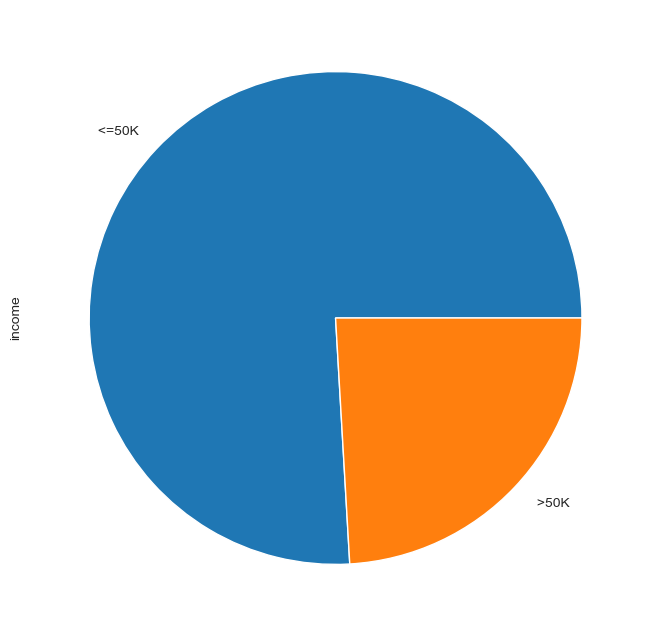

In [22]:
print(df.groupby(['income']).count())

df.income.value_counts(normalize=True).plot.pie()
plt.show()

# Apply One-hot Encoding technique to convert categorical data to Numerical values by appending additional columns to original dataset

In [23]:
#strip varibles of object type for any whitespaces
df_trimmed = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_trimmed['income'] = df_trimmed['income'].map(lambda x: 1 if x==">50K"  else 0)

In [24]:
df_trimmed.tail(20)
df = df_trimmed

In [25]:
df_workclass = pd.get_dummies(df['workclass'])
df_education= pd.get_dummies(df['workclass'])
df_marital_status= pd.get_dummies(df['marital_status'])
df_occupation= pd.get_dummies(df['occupation'])
df_relationship= pd.get_dummies(df['relationship'])
df_race= pd.get_dummies(df['race'])
df_sex= pd.get_dummies(df['sex'])
df_native_country= pd.get_dummies(df['native_country'])

# Joining the dummy variables to the main dataframe
df_numerical = pd.concat([df, df_workclass, df_education, df_marital_status, df_occupation, df_relationship, df_race, df_sex, df_native_country], axis=1)
#df_new.rename(columns = {"yes": "smoking", "no": "non_smoking"},inplace = True,errors="raise")
pd.set_option('display.max_columns', None)
df_numerical.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country  income  ?  \
0          2174             0              40  United-States       0  0   
1             0             0              13  United-States       0  0   
2             0             0              40  United-States       0  0   
3             0             0              40  United-States       0  0   
4             0             0              40           Cuba       0  0   

   Federal-gov  Local-gov  Never-worked  Private  Self-emp-inc  \
0            0          0             0        0             0   
1            0          0             0        0             0   
2            0          0             0        1             0   
3            0          0             0        1             0   
4            0          0             0        1             0   

   Self-emp-not-inc  State-gov  Without-pay  ?  Federal-gov  Local-gov  \
0                 0          1            0  0            0          0   
1                 1          0            0  0            0          0   
2                 0          0            0  0            0          0   
3                 0          0            0  0            0          0   
4                 0          0            0  0            0          0   

   Never-worked  Private  Self-emp-inc  Self-emp-not-inc  State-gov  \
0             0        0             0                 0          1   
1             0        0             0                 1          0   
2             0        1             0                 0          0   
3             0        1             0                 0          0   
4             0        1             0                 0          0   

   Without-pay  Divorced  Married-AF-spouse  Married-civ-spouse  \
0            0         0                  0                   0   
1            0         0                  0                   1   
2            0         1                  0                   0   
3            0         0                  0                   1   
4            0         0                  0                   1   

   Married-spouse-absent  Never-married  Separated  Widowed  ?  Adm-clerical  \
0                      0              1          0        0  0             1   
1                      0              0          0        0  0             0   
2                      0              0          0        0  0             0   
3                      0              0          0        0  0             0   
4                      0              0          0        0  0             0   

   Armed-Forces  Craft-repair  Exec-managerial  Farming-fishing  \
0             0             0                0                0   
1             0             0                1                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   Handlers-cleaners  Machine-op-inspct  Other-service  Priv-house-serv  \
0                  0                  0              0                0   
1                  0        

                      age    fnlwgt  education_num  capital_gain  \
age              1.000000 -0.078141       0.066345      0.124948   
fnlwgt          -0.078141  1.000000      -0.035706     -0.006039   
education_num    0.066345 -0.035706       1.000000      0.119140   
capital_gain     0.124948 -0.006039       0.119140      1.000000   
capital_loss     0.058484 -0.006914       0.074749     -0.066569   
...                   ...       ...            ...           ...   
Thailand        -0.005343  0.000354       0.005939     -0.007080   
Trinadad&Tobago  0.006860  0.001605      -0.015425     -0.007274   
United-States    0.013664 -0.078225       0.054585      0.015350   
Vietnam         -0.016934 -0.012246      -0.003806      0.003064   
Yugoslavia       0.000874  0.004224       0.001070     -0.001700   

                 capital_loss  hours_per_week    income         ?  \
age                  0.058484        0.142907  0.272962 -0.001973   
fnlwgt              -0.006914       -0.021621

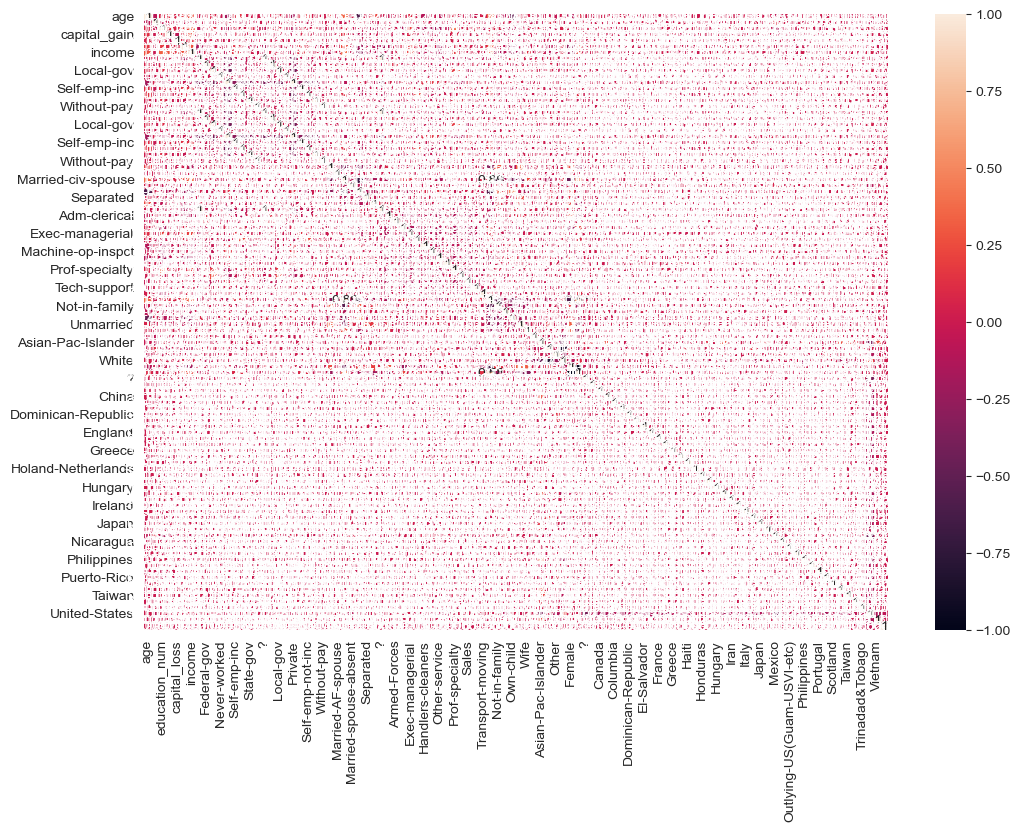

In [26]:
#Find correlation between features and plot heatmap for all the numerical values.
#lets plot heatmap using spearman correlation

spearman_corr= df_numerical.corr('spearman')
print(spearman_corr)
sns.heatmap(spearman_corr, annot=True)
plt.show()

In [27]:
#Determine the golden feature set by taking strong relationship between dependent and independent variable from the figured correlation.
spearman_corr_charges = df_numerical.corr('spearman')['income']
golden_feature_list_spearman = spearman_corr_charges[abs(spearman_corr_charges) > 0.2].sort_values(ascending=False)
print(golden_feature_list_spearman)

income                1.000000
Married-civ-spouse    0.444696
Husband               0.401035
education_num         0.329682
capital_gain          0.278159
age                   0.272962
hours_per_week        0.269075
Male                  0.215980
Exec-managerial       0.214861
Female               -0.215980
Own-child            -0.228532
Never-married        -0.318440
Name: income, dtype: float64


# 3. For each of the categorical variables, construct a bar chart of the variable, with an overlay of the target variable. Normalize if necessary. 
a.	Discuss the relationship, if any, each of these variables has with the target variable.
b.	Which variables would you expect to make a significant appearance in any data mining classification model?
workclass, education, marital-status, occupation, relationship, race, sex, native-country, income

<Axes: >

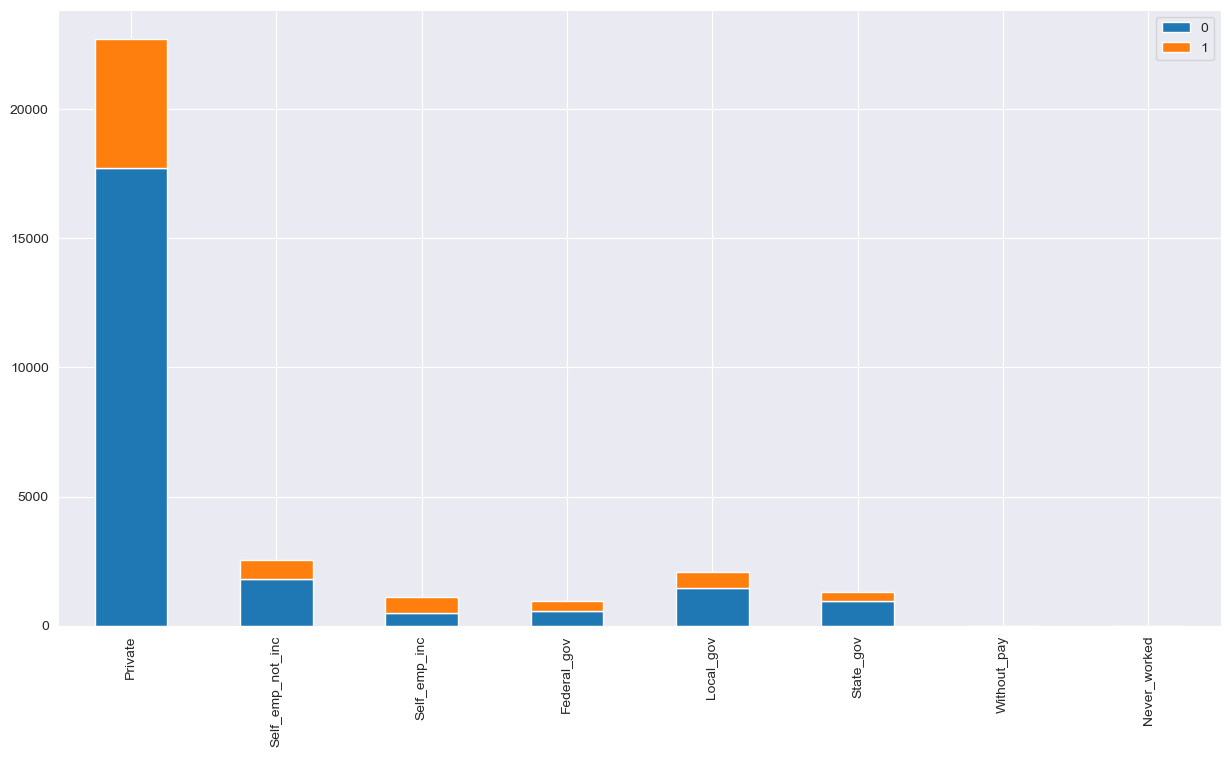

In [28]:
#workclass bar chart plot
Private = df[df['workclass']=='Private']['income'].value_counts()
Self_emp_not_inc = df[df['workclass']=='Self-emp-not-inc']['income'].value_counts()
Self_emp_inc = df[df['workclass']=='Self-emp-inc']['income'].value_counts()
Federal_gov = df[df['workclass']=='Federal-gov']['income'].value_counts()
Local_gov = df[df['workclass']=='Local-gov']['income'].value_counts()
State_gov = df[df['workclass']=='State-gov']['income'].value_counts()
Without_pay = df[df['workclass']=='Without-pay']['income'].value_counts()
Never_worked = df[df['workclass']=='Never-worked']['income'].value_counts()
df_temp=pd.DataFrame([Private,Self_emp_not_inc,Self_emp_inc,Federal_gov,Local_gov,State_gov,Without_pay,Never_worked])
df_temp.index=['Private','Self_emp_not_inc','Self_emp_inc','Federal_gov','Local_gov','State_gov','Without_pay','Never_worked']
df_temp.plot(kind='bar',stacked=True, figsize=(15,8))

Significant number of people in Private workclass seems to have income > 50k
Without_pay and never_worked class doesnot seem to have any income >50k
Self-emp-inc workclass have almost half strength earning >50k

<Axes: >

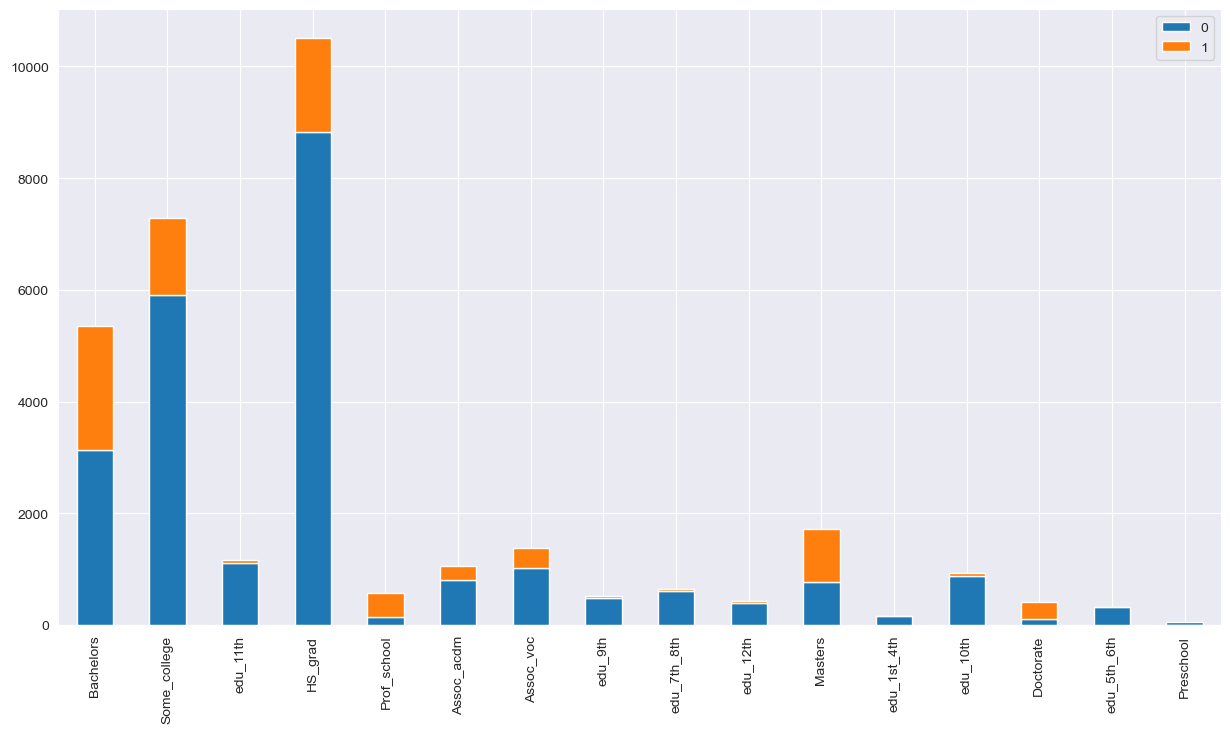

In [29]:
#education bar chart plot
Bachelors = df[df['education']=='Bachelors']['income'].value_counts()
Some_college = df[df['education']=='Some-college']['income'].value_counts()
edu_11th = df[df['education']=='11th']['income'].value_counts()
HS_grad = df[df['education']=='HS-grad']['income'].value_counts()
Prof_school = df[df['education']=='Prof-school']['income'].value_counts()
Assoc_acdm = df[df['education']=='Assoc-acdm']['income'].value_counts()
Assoc_voc = df[df['education']=='Assoc-voc']['income'].value_counts()
edu_9th = df[df['education']=='9th']['income'].value_counts()
edu_7th_8th = df[df['education']=='7th-8th']['income'].value_counts()
edu_12th = df[df['education']=='12th']['income'].value_counts()
Masters = df[df['education']=='Masters']['income'].value_counts()
edu_1st_4th = df[df['education']=='1st-4th']['income'].value_counts()
edu_10th = df[df['education']=='10th']['income'].value_counts()
Doctorate = df[df['education']=='Doctorate']['income'].value_counts()
edu_5th_6th = df[df['education']=='5th-6th']['income'].value_counts()
Preschool = df[df['education']=='Preschool']['income'].value_counts()
df_temp=pd.DataFrame([Bachelors,Some_college,edu_11th,HS_grad,Prof_school,Assoc_acdm,Assoc_voc,edu_9th,edu_7th_8th,edu_12th,Masters,edu_1st_4th, edu_10th, Doctorate,edu_5th_6th, Preschool])
df_temp.index=['Bachelors','Some_college','edu_11th','HS_grad','Prof_school','Assoc_acdm','Assoc_voc','edu_9th','edu_7th_8th','edu_12th','Masters','edu_1st_4th', 'edu_10th', 'Doctorate','edu_5th_6th', 'Preschool']
df_temp.plot(kind='bar',stacked=True, figsize=(15,8))

Those with education 9th, 7th-8th, 1st-4th,5th-6th and pre-schooled does not have any income >50k
Those with bachelors and master education have close to 50% strength with income >50k.
Those with Doctorate education and Prof_school is the largest group earning >50k(almost 80%)
Some strength with education some_college,HS_grad makes income >50k 

<Axes: >

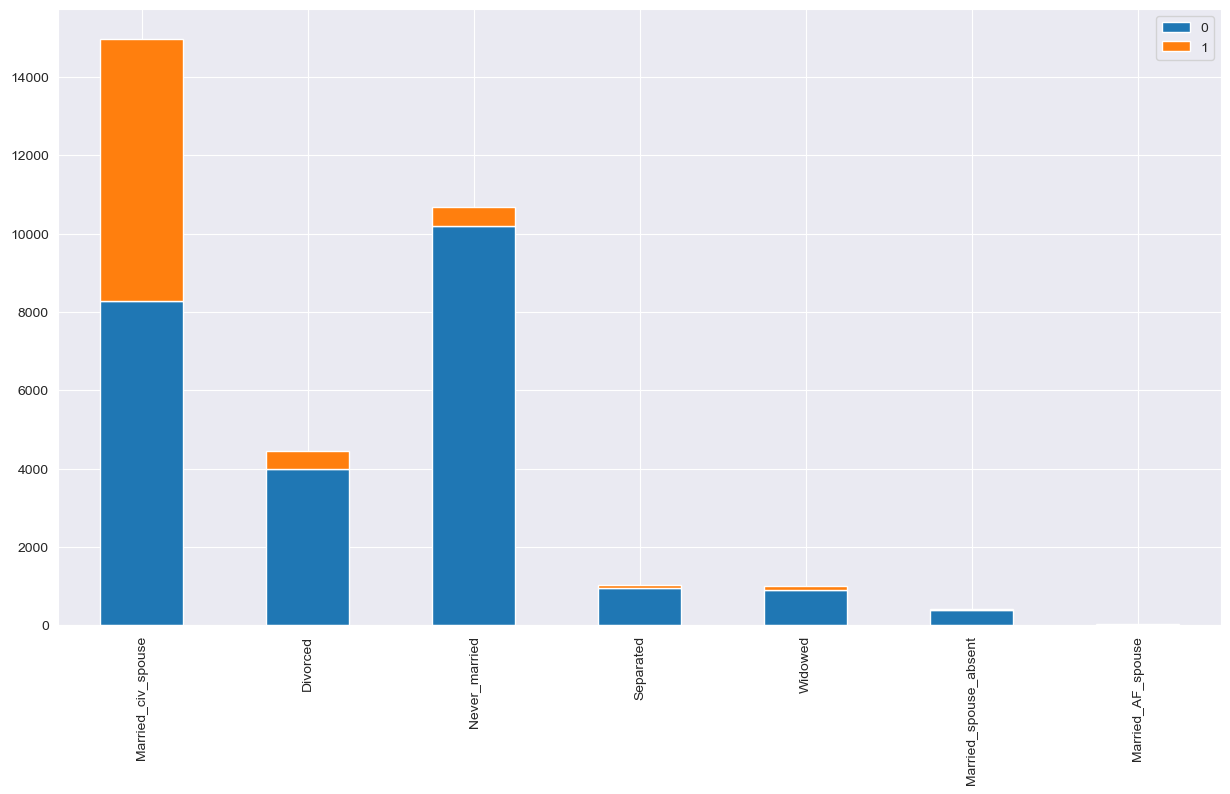

In [30]:
# bar chart plot
Married_civ_spouse= df[df['marital_status']=='Married-civ-spouse']['income'].value_counts()
Divorced= df[df['marital_status']=='Divorced']['income'].value_counts()
Never_married= df[df['marital_status']=='Never-married']['income'].value_counts()
Separated= df[df['marital_status']=='Separated']['income'].value_counts()
Widowed= df[df['marital_status']=='Widowed']['income'].value_counts()
Married_spouse_absent= df[df['marital_status']=='Married-spouse-absent']['income'].value_counts()
Married_AF_spouse= df[df['marital_status']=='Married-AF-spouse']['income'].value_counts()
df_temp=pd.DataFrame([Married_civ_spouse,Divorced,Never_married,Separated,Widowed,Married_spouse_absent,Married_AF_spouse])
df_temp.index=['Married_civ_spouse','Divorced','Never_married','Separated','Widowed','Married_spouse_absent','Married_AF_spouse']
df_temp.plot(kind='bar',stacked=True, figsize=(15,8))

almost 50% of those belonging to Married-civ-spouse makes income >50k
very small percentage of divorced, never_married, widowed makes income >50k
married_spouse_absent and Married-AF-spouse does not seem to make >50k income 

<Axes: >

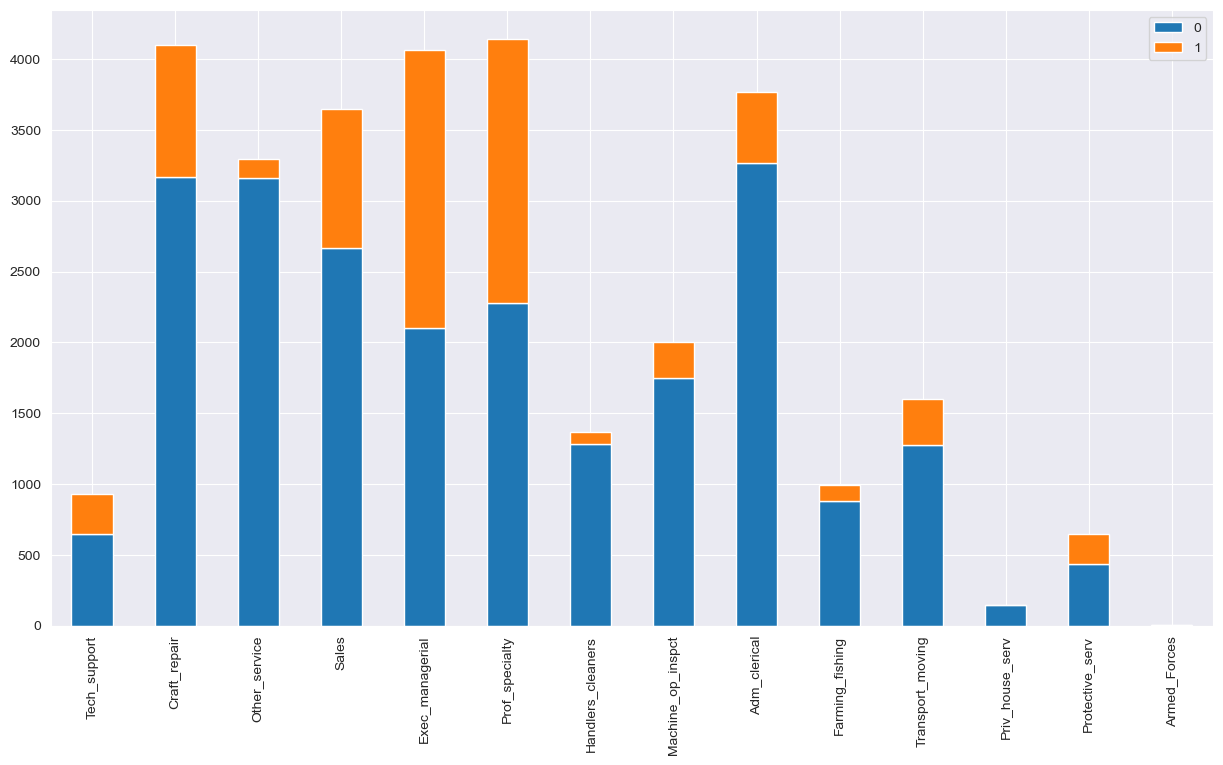

In [31]:
Tech_support= df[df['occupation']=='Tech-support']['income'].value_counts()
Craft_repair= df[df['occupation']=='Craft-repair']['income'].value_counts()
Other_service= df[df['occupation']=='Other-service']['income'].value_counts()
Sales= df[df['occupation']=='Sales']['income'].value_counts()
Exec_managerial= df[df['occupation']=='Exec-managerial']['income'].value_counts()
Prof_specialty= df[df['occupation']=='Prof-specialty']['income'].value_counts()
Handlers_cleaners= df[df['occupation']=='Handlers-cleaners']['income'].value_counts()
Machine_op_inspct= df[df['occupation']=='Machine-op-inspct']['income'].value_counts()
Adm_clerical= df[df['occupation']=='Adm-clerical']['income'].value_counts()
Farming_fishing= df[df['occupation']=='Farming-fishing']['income'].value_counts()
Transport_moving= df[df['occupation']=='Transport-moving']['income'].value_counts()
Priv_house_serv= df[df['occupation']=='Priv-house-serv']['income'].value_counts()
Protective_serv= df[df['occupation']=='Protective-serv']['income'].value_counts()
Armed_Forces= df[df['occupation']=='Armed-Forces']['income'].value_counts()
df_temp=pd.DataFrame([Tech_support, Craft_repair, Other_service, Sales, Exec_managerial, Prof_specialty, Handlers_cleaners, Machine_op_inspct, Adm_clerical, Farming_fishing, Transport_moving, Priv_house_serv, Protective_serv, Armed_Forces])
df_temp.index=['Tech_support', 'Craft_repair', 'Other_service', 'Sales', 'Exec_managerial', 'Prof_specialty', 'Handlers_cleaners', 'Machine_op_inspct', 'Adm_clerical', 'Farming_fishing', 'Transport_moving', 'Priv_house_serv', 'Protective_serv', 'Armed_Forces']
df_temp.plot(kind='bar',stacked=True, figsize=(15,8))

1. almost 50% of those in Exec-managerial, Prof-specialty occupation makes income >50k, followed by craft_repair,Sales/ Tech_support,Protective-serv.
2. Very few in Transport-moving,Machine-op-inspct/ Other_service,Farming-fishing,Handlers-cleaners make >50k
3. almost everyone in Armed-Forces and Priv-house-serv make income <= 50k

<Axes: >

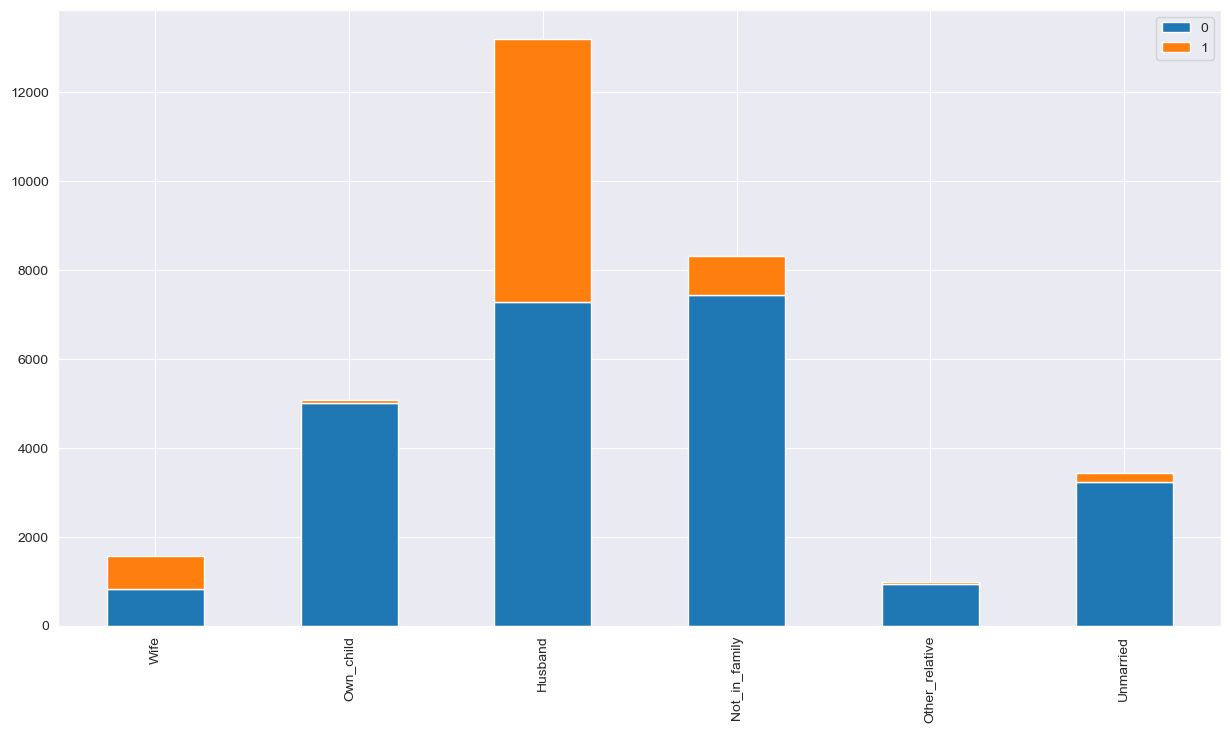

In [32]:
#relationship
Wife= df[df['relationship']=='Wife']['income'].value_counts()
Own_child= df[df['relationship']=='Own-child']['income'].value_counts()
Husband= df[df['relationship']=='Husband']['income'].value_counts()
Not_in_family= df[df['relationship']=='Not-in-family']['income'].value_counts()
Other_relative= df[df['relationship']=='Other-relative']['income'].value_counts()
Unmarried= df[df['relationship']=='Unmarried']['income'].value_counts()
df_temp=pd.DataFrame([Wife, Own_child, Husband, Not_in_family, Other_relative, Unmarried])
df_temp.index=['Wife', 'Own_child', 'Husband', 'Not_in_family', 'Other_relative', 'Unmarried']
df_temp.plot(kind='bar',stacked=True, figsize=(15,8))

1. Husband and wife relationship seems be having almost 50% strength making >50k
2. Very few in Not_in_family, unmarried, own_child makes income >50k
3. almost everyone of Other_relative category makes income <=50k

<Axes: >

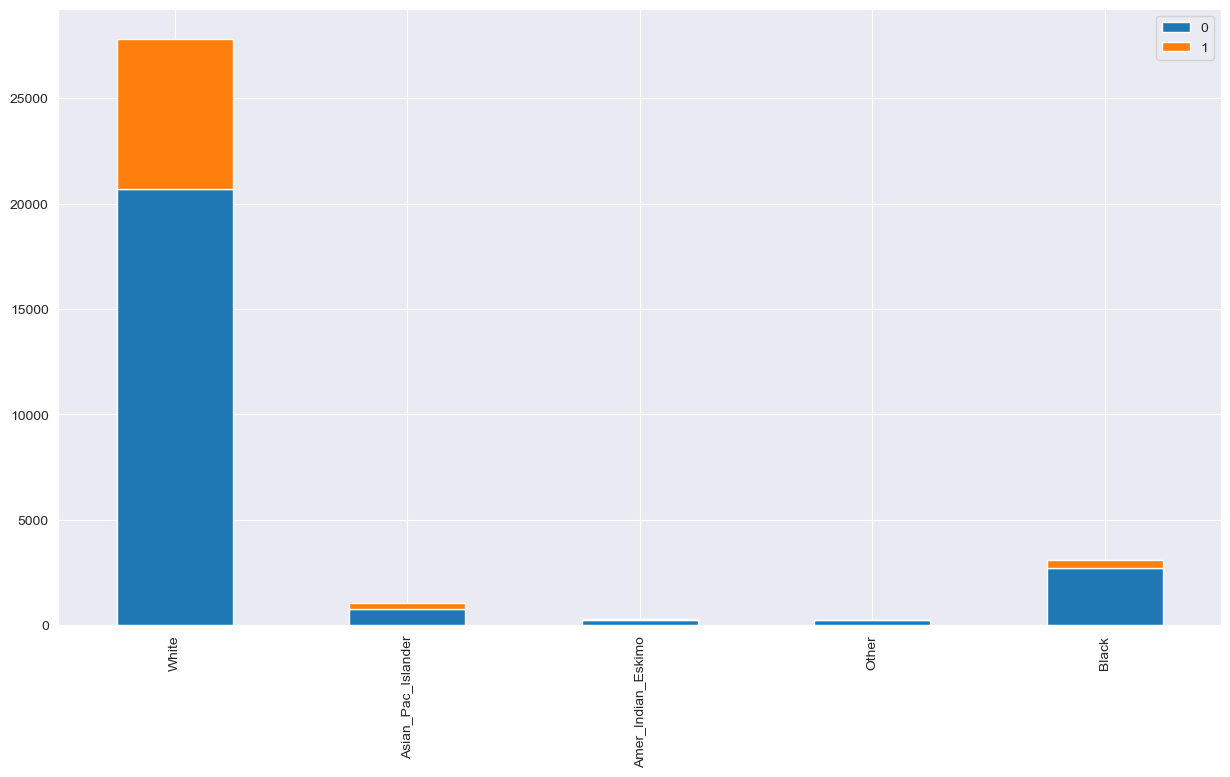

In [33]:
White= df[df['race']=='White']['income'].value_counts()
Asian_Pac_Islander= df[df['race']=='Asian-Pac-Islander']['income'].value_counts()
Amer_Indian_Eskimo= df[df['race']=='Amer-Indian-Eskimo']['income'].value_counts()
Other= df[df['race']=='Other']['income'].value_counts()
Black= df[df['race']=='Black']['income'].value_counts()
df_temp=pd.DataFrame([White, Asian_Pac_Islander, Amer_Indian_Eskimo, Other, Black])
df_temp.index=['White', 'Asian_Pac_Islander', 'Amer_Indian_Eskimo', 'Other', 'Black']
df_temp.plot(kind='bar',stacked=True, figsize=(15,8))

1. about 25-30% of whites make income >50k
2. very few blacks and Asian_Pac_Islander make income >50k
3. Amer_Indian_Eskimo and others almost everyone makes income <=50k.


In [34]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country  income  
0          2174             0              40  United-States       0  
1             0             0              13  United-States       0  
2             0             0              40  United-States       0  
3             0             0              40  United-States       0  
4             0             0              40           Cuba       0

<Axes: >

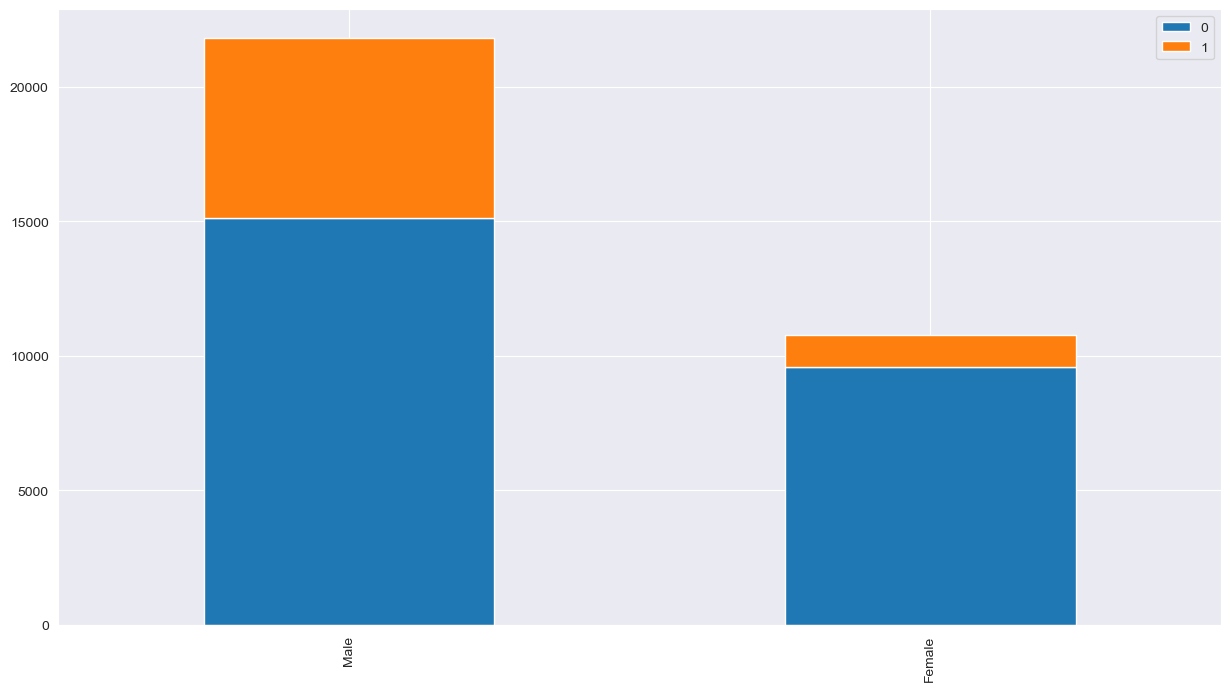

In [35]:
#sex bar chart plot
Male = df[df['sex']=='Male']['income'].value_counts()
Female = df[df['sex']=='Female']['income'].value_counts()
df_temp=pd.DataFrame([Male,Female])
df_temp.index=['Male','Female']
df_temp.plot(kind='bar',stacked=True, figsize=(15,8))

More percentage of male makes income >50k compared to females

<Axes: >

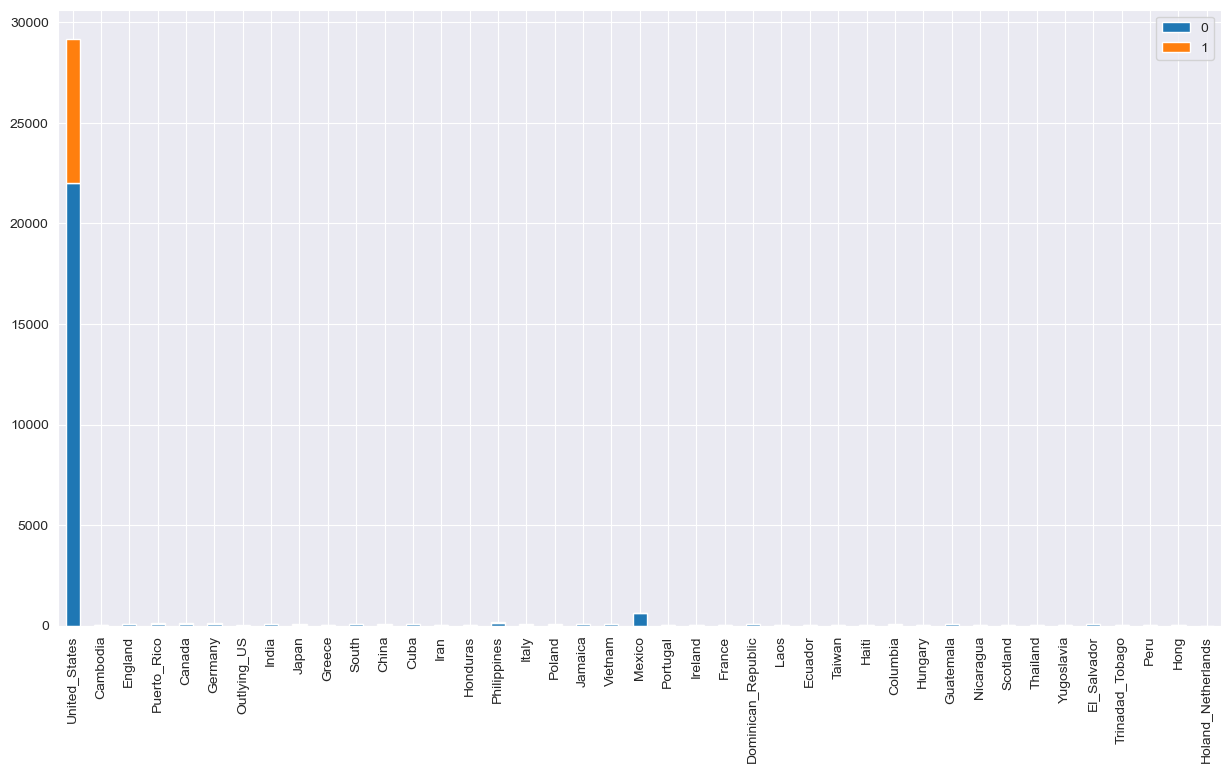

In [36]:
United_States= df[df['native_country']=='United-States']['income'].value_counts()
Cambodia= df[df['native_country']=='Cambodia']['income'].value_counts()
England= df[df['native_country']=='England']['income'].value_counts()
Puerto_Rico= df[df['native_country']=='Puerto-Rico']['income'].value_counts()
Canada= df[df['native_country']=='Canada']['income'].value_counts()
Germany= df[df['native_country']=='Germany']['income'].value_counts()
Outlying_US= df[df['native_country']=='Outlying-US(Guam-USVI-etc)']['income'].value_counts()
India= df[df['native_country']=='India']['income'].value_counts()
Japan= df[df['native_country']=='Japan']['income'].value_counts()
Greece= df[df['native_country']=='Greece']['income'].value_counts()
South= df[df['native_country']=='South']['income'].value_counts()
China= df[df['native_country']=='China']['income'].value_counts()
Cuba= df[df['native_country']=='Cuba']['income'].value_counts()
Iran= df[df['native_country']=='Iran']['income'].value_counts()
Honduras= df[df['native_country']=='Honduras']['income'].value_counts()
Philippines= df[df['native_country']=='Philippines']['income'].value_counts()
Italy= df[df['native_country']=='Italy']['income'].value_counts()
Poland= df[df['native_country']=='Poland']['income'].value_counts()
Jamaica= df[df['native_country']=='Jamaica']['income'].value_counts()
Vietnam= df[df['native_country']=='Vietnam']['income'].value_counts()
Mexico= df[df['native_country']=='Mexico']['income'].value_counts()
Portugal= df[df['native_country']=='Portugal']['income'].value_counts()
Ireland= df[df['native_country']=='Ireland']['income'].value_counts()
France= df[df['native_country']=='France']['income'].value_counts()
Dominican_Republic= df[df['native_country']=='Dominican-Republic']['income'].value_counts()
Laos= df[df['native_country']=='Laos']['income'].value_counts()
Ecuador= df[df['native_country']=='Ecuador']['income'].value_counts()
Taiwan= df[df['native_country']=='Taiwan']['income'].value_counts()
Haiti= df[df['native_country']=='Haiti']['income'].value_counts()
Columbia= df[df['native_country']=='Columbia']['income'].value_counts()
Hungary= df[df['native_country']=='Hungary']['income'].value_counts()
Guatemala= df[df['native_country']=='Guatemala']['income'].value_counts()
Nicaragua= df[df['native_country']=='Nicaragua']['income'].value_counts()
Scotland= df[df['native_country']=='Scotland']['income'].value_counts()
Thailand= df[df['native_country']=='Thailand']['income'].value_counts()
Yugoslavia= df[df['native_country']=='Yugoslavia']['income'].value_counts()
El_Salvador= df[df['native_country']=='El-Salvador']['income'].value_counts()
Trinadad_Tobago= df[df['native_country']=='Trinadad&Tobago']['income'].value_counts()
Peru= df[df['native_country']=='Peru']['income'].value_counts()
Hong= df[df['native_country']=='Hong']['income'].value_counts()
Holand_Netherlands= df[df['native_country']=='Holand_Netherlands']['income'].value_counts()

df_temp=pd.DataFrame([United_States, Cambodia, England, Puerto_Rico, Canada, Germany, Outlying_US, India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican_Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El_Salvador, Trinadad_Tobago, Peru, Hong, Holand_Netherlands])
df_temp.index=['United_States', 'Cambodia', 'England', 'Puerto_Rico', 'Canada', 'Germany', 'Outlying_US', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican_Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El_Salvador', 'Trinadad_Tobago', 'Peru', 'Hong', 'Holand_Netherlands']
df_temp.plot(kind='bar',stacked=True, figsize=(15,8))

Data collected with native US is more from frequency distribution, so those with US-native; almost 25-28% of people make income >50k, others make income <=50k. Mexico data shows very few earnings. Cannot inference significant relation from those belonging to other native-countries.

target variable income seems to be strongly dependent on Education,occupation, marital-status, relationship and sex.

# 4. For each pair of categorical variables, construct a cross tabulation. Discuss the results.

('workclass', 'education')
education             10th      11th      12th   1st-4th   5th-6th   7th-8th  \
workclass                                                                      
?                 0.003071  0.003624  0.001228  0.000369  0.000921  0.002211   
Federal-gov       0.000184  0.000276  0.000154  0.000000  0.000031  0.000061   
Local-gov         0.000952  0.001106  0.000584  0.000123  0.000276  0.000860   
Never-worked      0.000061  0.000031  0.000000  0.000000  0.000000  0.000031   
Private           0.021345  0.028347  0.010227  0.004177  0.008169  0.013022   
Self-emp-inc      0.000584  0.000430  0.000215  0.000061  0.000123  0.000430   
Self-emp-not-inc  0.002058  0.001843  0.000584  0.000399  0.000584  0.002887   
State-gov         0.000399  0.000430  0.000307  0.000031  0.000123  0.000307   
Without-pay       0.000000  0.000000  0.000000  0.000000  0.000000  0.000031   
Total Percentage  0.028654  0.036086  0.013298  0.005160  0.010227  0.019840   

education   

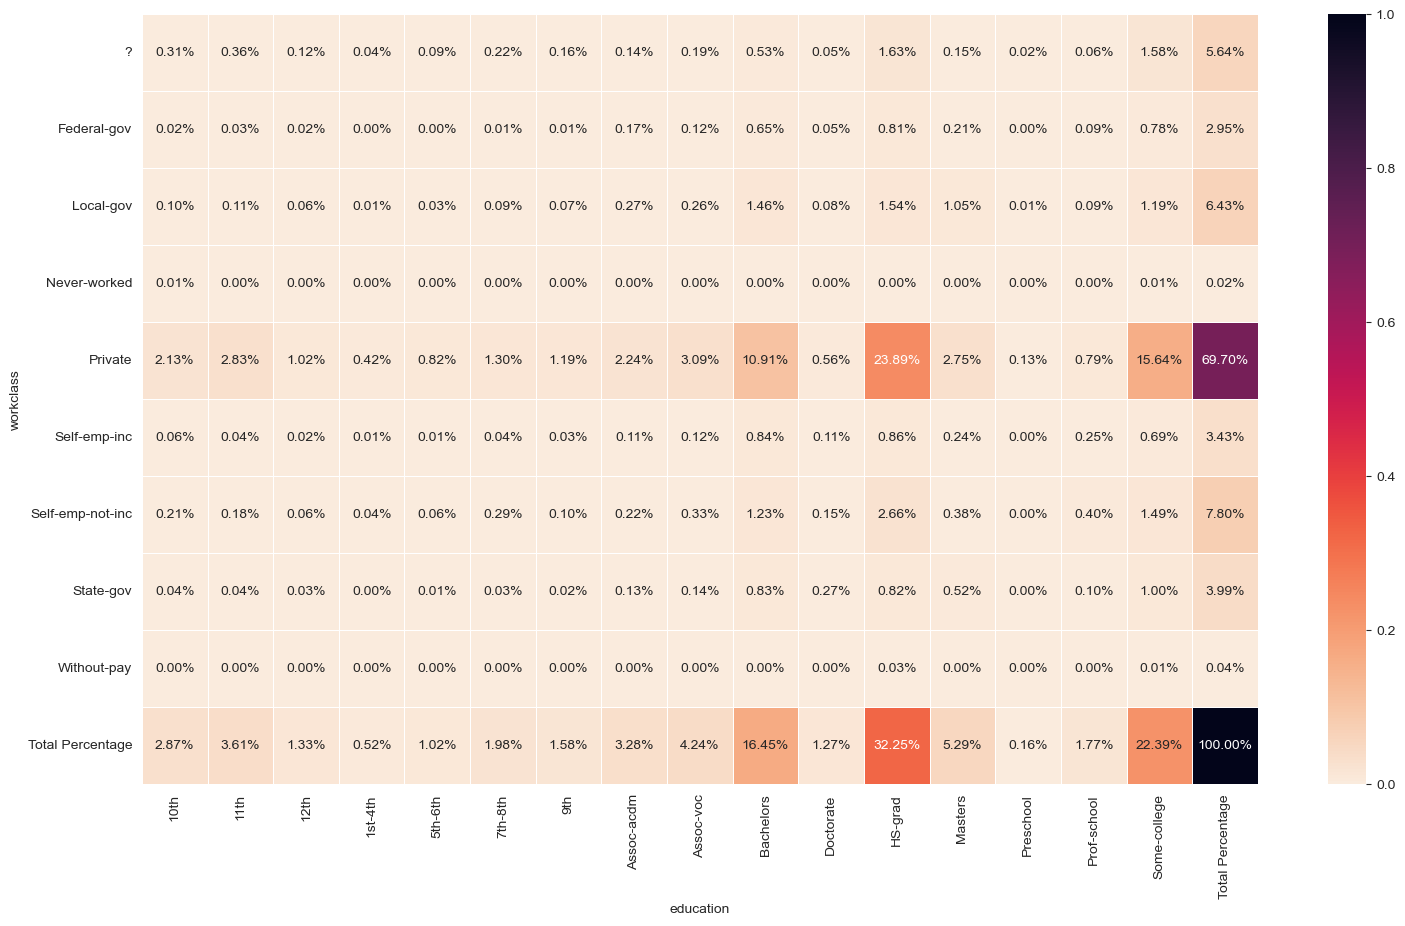



('workclass', 'marital_status')
marital_status    Divorced  Married-AF-spouse  Married-civ-spouse  \
workclass                                                           
?                 0.005651           0.000061            0.019533   
Federal-gov       0.005160           0.000092            0.014465   
Local-gov         0.011333           0.000000            0.031418   
Never-worked      0.000031           0.000000            0.000031   
Private           0.095789           0.000461            0.298885   
Self-emp-inc      0.003071           0.000000            0.025706   
Self-emp-not-inc  0.008968           0.000061            0.051595   
State-gov         0.006449           0.000031            0.018058   
Without-pay       0.000000           0.000000            0.000246   
Total Percentage  0.136452           0.000706            0.459937   

marital_status    Married-spouse-absent  Never-married  Separated   Widowed  \
workclass                                                 

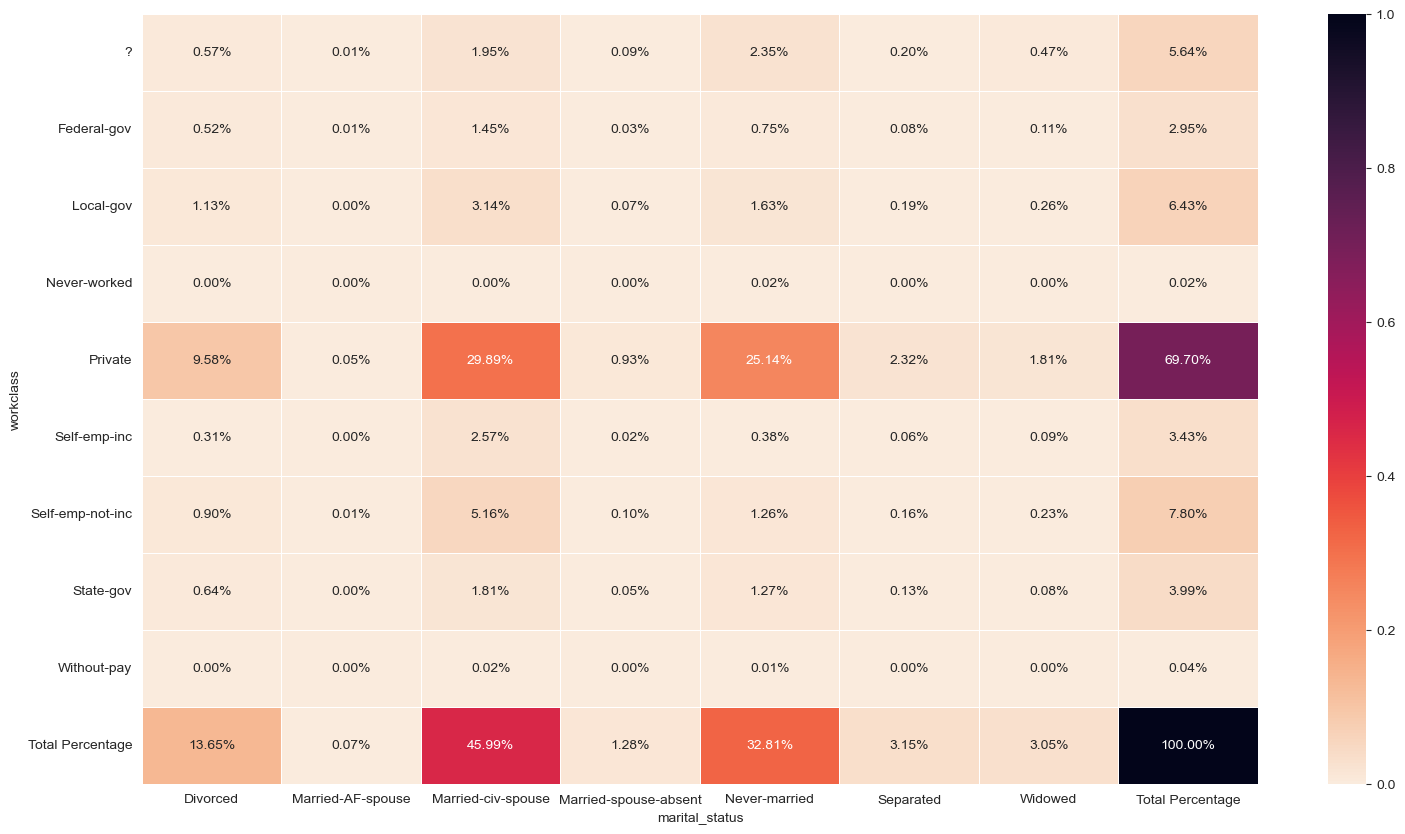



('workclass', 'occupation')
occupation               ?  Adm-clerical  Armed-Forces  Craft-repair  \
workclass                                                              
?                 0.056386      0.000000      0.000000      0.000000   
Federal-gov       0.000000      0.009736      0.000276      0.001966   
Local-gov         0.000000      0.008691      0.000000      0.004484   
Never-worked      0.000215      0.000000      0.000000      0.000000   
Private           0.000000      0.087006      0.000000      0.098124   
Self-emp-inc      0.000000      0.000952      0.000000      0.003255   
Self-emp-not-inc  0.000000      0.001536      0.000000      0.016308   
State-gov         0.000000      0.007770      0.000000      0.001720   
Without-pay       0.000000      0.000092      0.000000      0.000031   
Total Percentage  0.056601      0.115783      0.000276      0.125887   

occupation        Exec-managerial  Farming-fishing  Handlers-cleaners  \
workclass                       

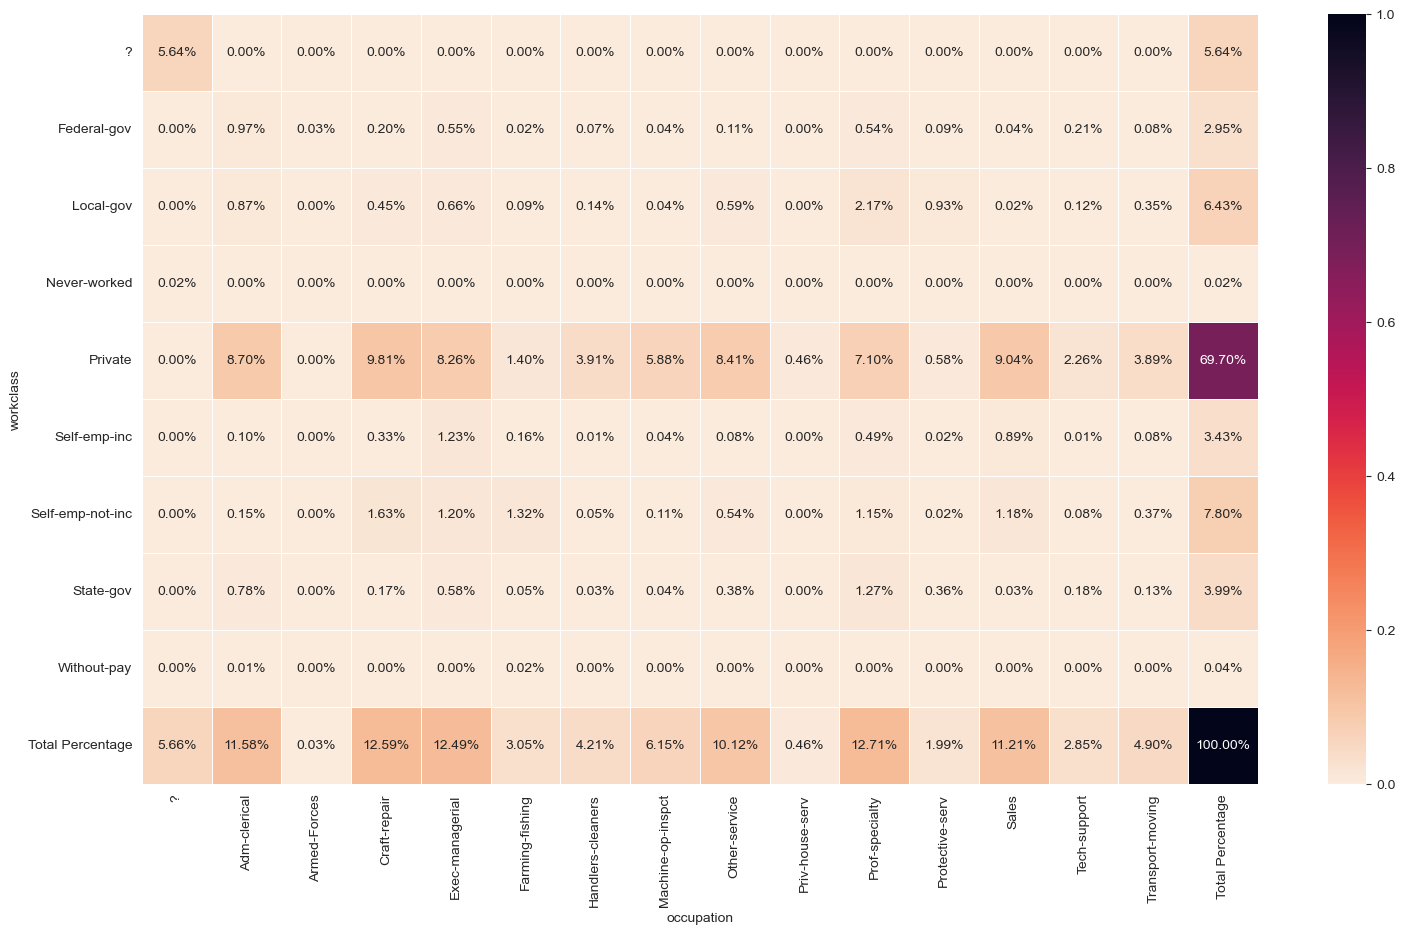



('workclass', 'relationship')
relationship       Husband  Not-in-family  Other-relative  Own-child  \
workclass                                                              
?                 0.015018       0.013482        0.001935   0.016523   
Federal-gov       0.013175       0.008569        0.000645   0.001966   
Local-gov         0.026381       0.016031        0.001321   0.006603   
Never-worked      0.000000       0.000031        0.000000   0.000154   
Private           0.263260       0.184454        0.023771   0.118762   
Self-emp-inc      0.024139       0.005160        0.000246   0.001720   
Self-emp-not-inc  0.047357       0.015847        0.001536   0.004760   
State-gov         0.015724       0.011486        0.000676   0.005006   
Without-pay       0.000123       0.000000        0.000000   0.000154   
Total Percentage  0.405178       0.255060        0.030128   0.155646   

relationship      Unmarried      Wife  Total Percentage  
workclass                                    

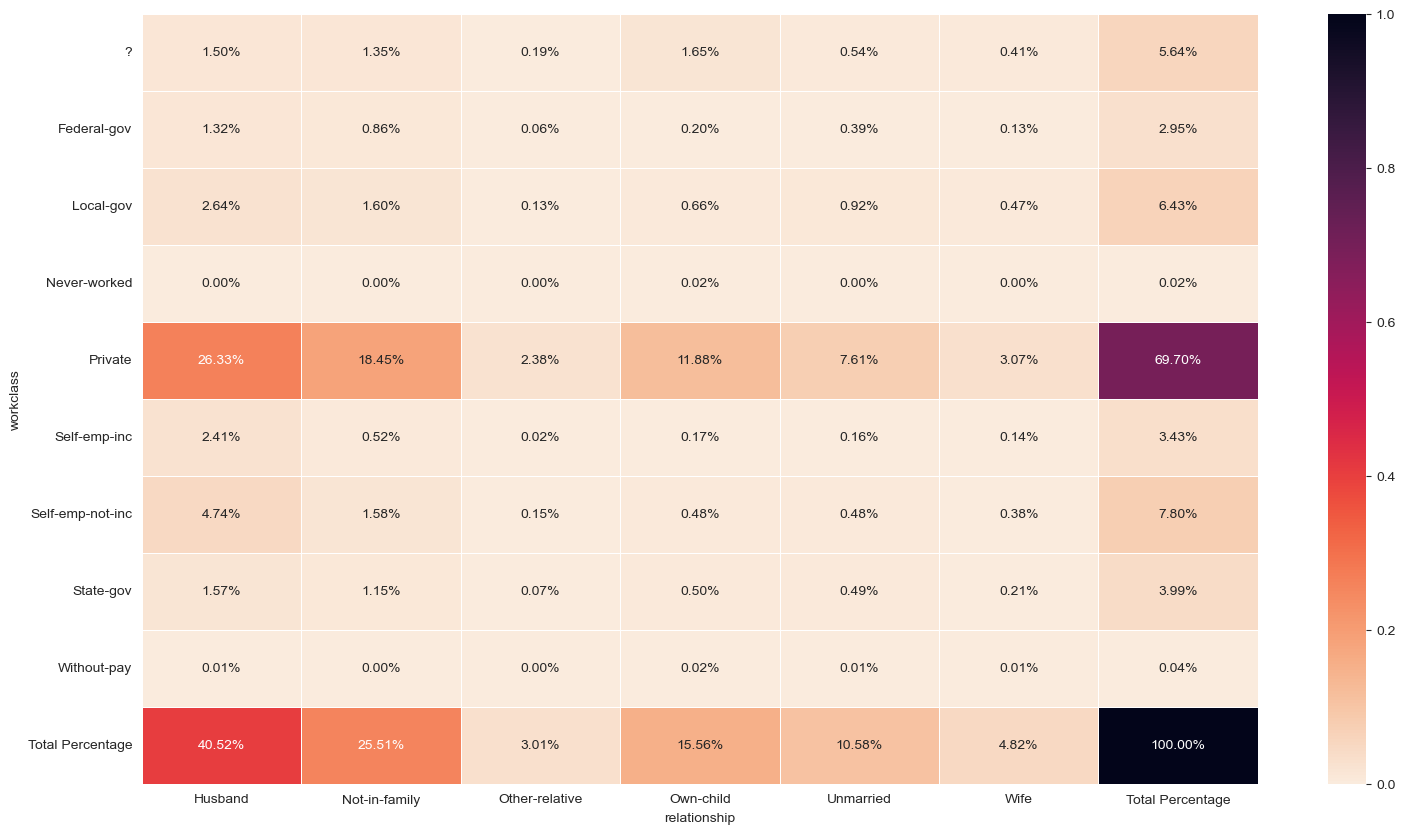



('workclass', 'race')
race              Amer-Indian-Eskimo  Asian-Pac-Islander     Black     Other  \
workclass                                                                      
?                           0.000768            0.001996  0.006542  0.000706   
Federal-gov                 0.000584            0.001351  0.005190  0.000215   
Local-gov                   0.001106            0.001198  0.008845  0.000307   
Never-worked                0.000000            0.000000  0.000061  0.000000   
Private                     0.005835            0.021897  0.066828  0.006542   
Self-emp-inc                0.000061            0.001413  0.000706  0.000154   
Self-emp-not-inc            0.000737            0.002242  0.002856  0.000276   
State-gov                   0.000461            0.001781  0.004883  0.000123   
Without-pay                 0.000000            0.000031  0.000031  0.000000   
Total Percentage            0.009551            0.031909  0.095943  0.008323   

race           

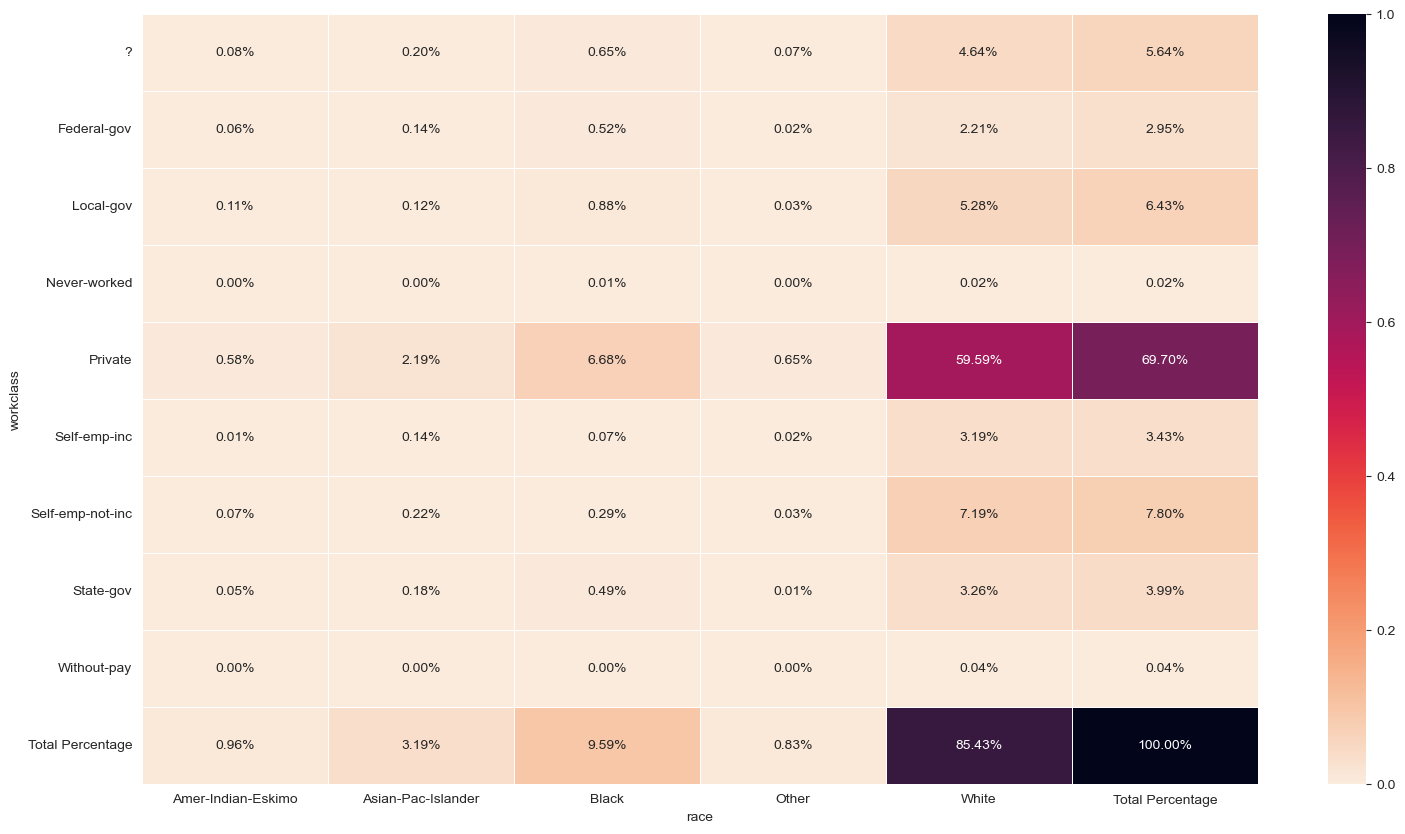



('workclass', 'sex')
sex                 Female      Male  Total Percentage
workclass                                             
?                 0.025767  0.030619          0.056386
Federal-gov       0.009674  0.019809          0.029483
Local-gov         0.025644  0.038635          0.064279
Never-worked      0.000061  0.000154          0.000215
Private           0.238076  0.458954          0.697030
Self-emp-inc      0.004146  0.030128          0.034274
Self-emp-not-inc  0.012254  0.065784          0.078038
State-gov         0.015018  0.024846          0.039864
Without-pay       0.000154  0.000276          0.000430
Total Percentage  0.330795  0.669205          1.000000


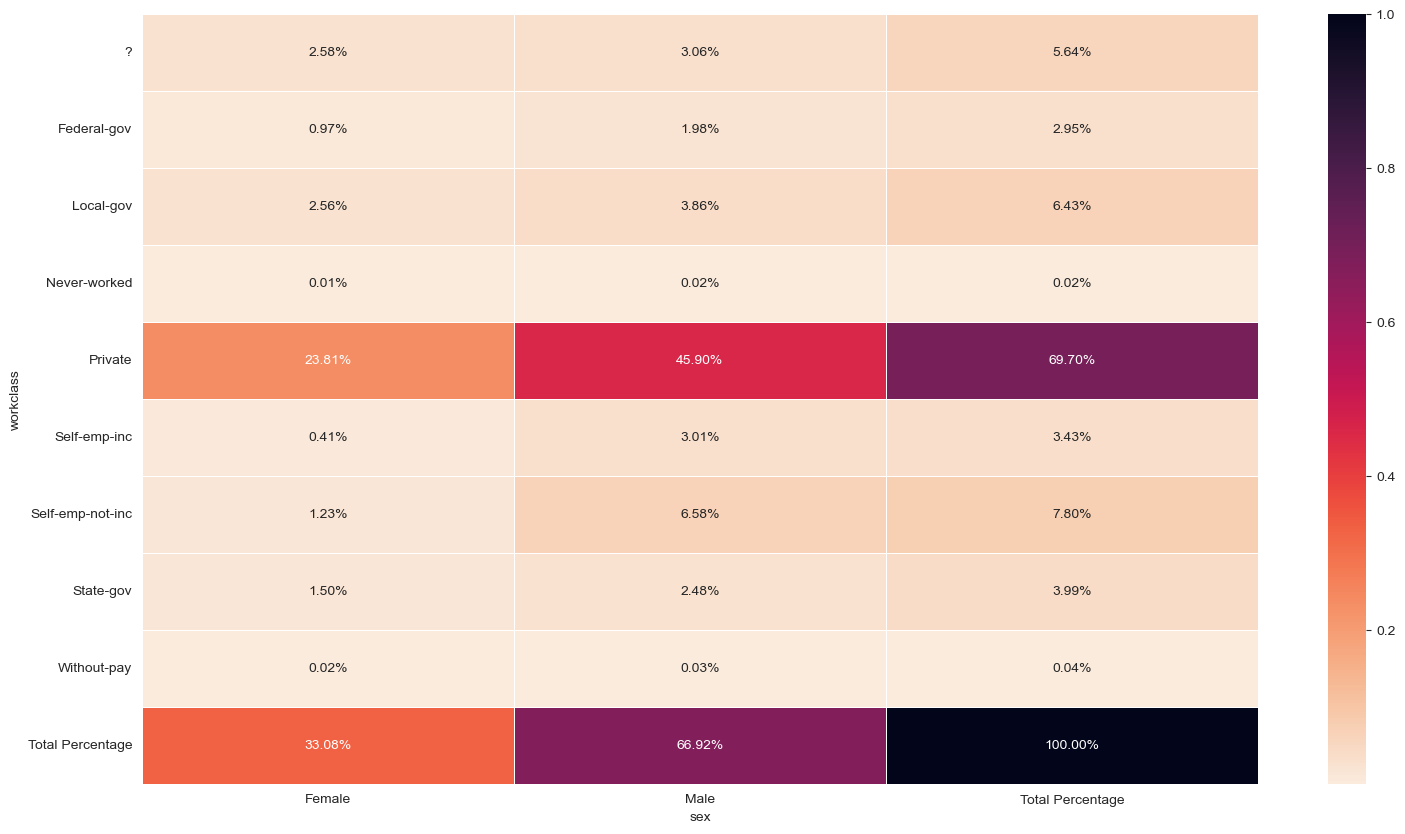



('workclass', 'native_country')
native_country           ?  Cambodia    Canada     China  Columbia      Cuba  \
workclass                                                                      
?                 0.000829  0.000031  0.000430  0.000215  0.000092  0.000092   
Federal-gov       0.000522  0.000031  0.000061  0.000031  0.000061  0.000061   
Local-gov         0.000799  0.000000  0.000184  0.000092  0.000000  0.000123   
Never-worked      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Private           0.012592  0.000491  0.002426  0.001505  0.001413  0.002119   
Self-emp-inc      0.001290  0.000000  0.000184  0.000031  0.000000  0.000276   
Self-emp-not-inc  0.001290  0.000031  0.000338  0.000154  0.000215  0.000246   
State-gov         0.000584  0.000000  0.000092  0.000276  0.000031  0.000000   
Without-pay       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Total Percentage  0.017905  0.000584  0.003716  0.002303  0.001812  0.002918   

nativ

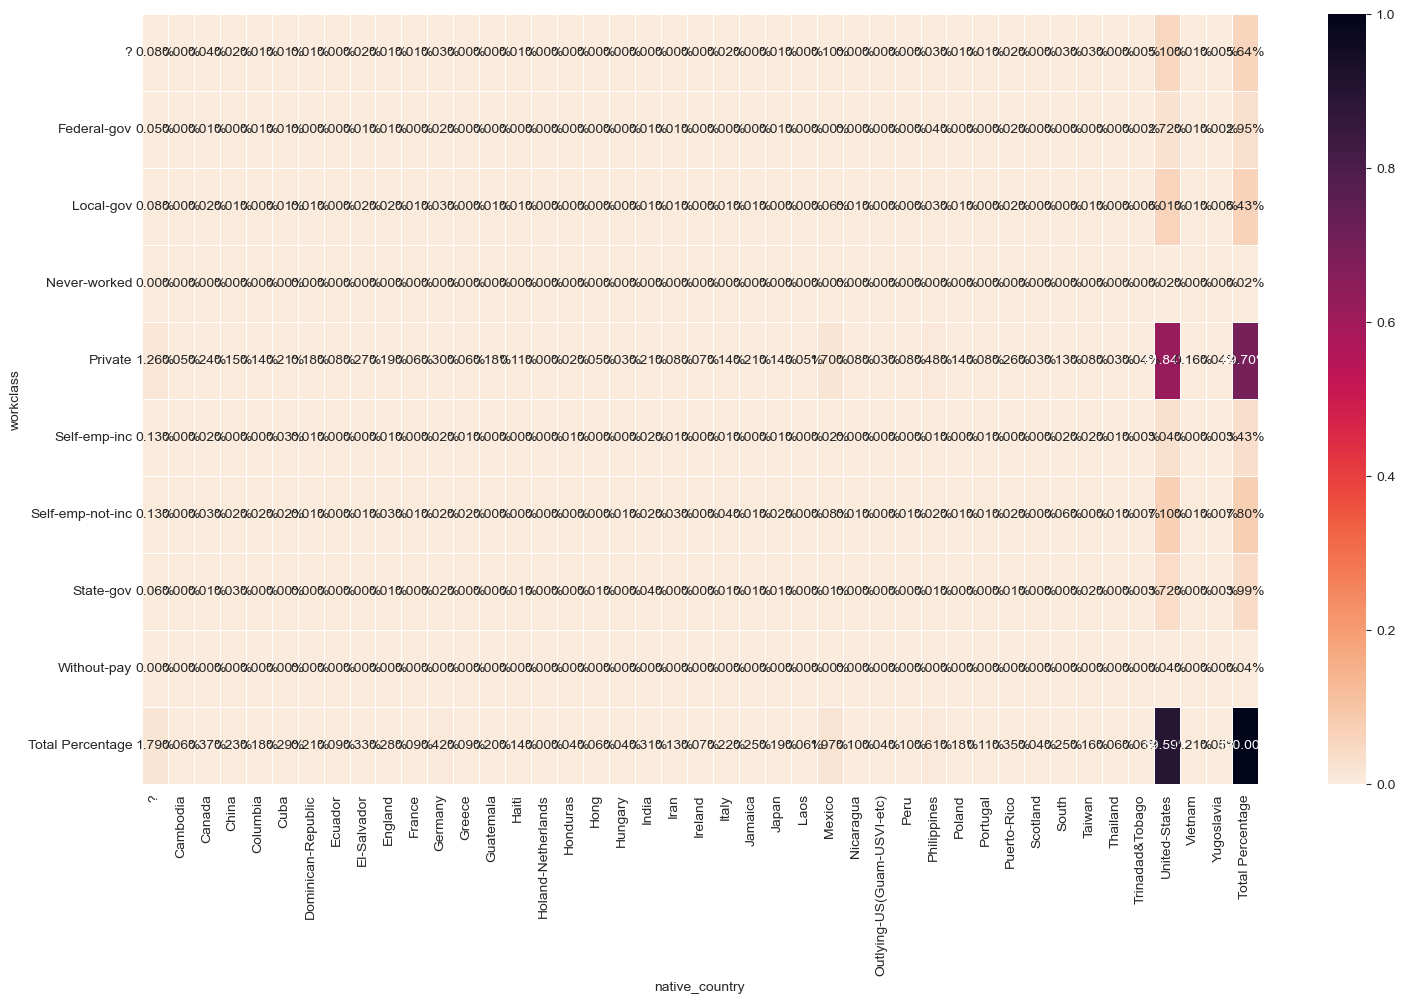



('workclass', 'income')
income                   0         1  Total Percentage
workclass                                             
?                 0.050521  0.005866          0.056386
Federal-gov       0.018089  0.011394          0.029483
Local-gov         0.045330  0.018949          0.064279
Never-worked      0.000215  0.000000          0.000215
Private           0.544609  0.152422          0.697030
Self-emp-inc      0.015172  0.019103          0.034274
Self-emp-not-inc  0.055803  0.022235          0.078038
State-gov         0.029022  0.010841          0.039864
Without-pay       0.000430  0.000000          0.000430
Total Percentage  0.759190  0.240810          1.000000


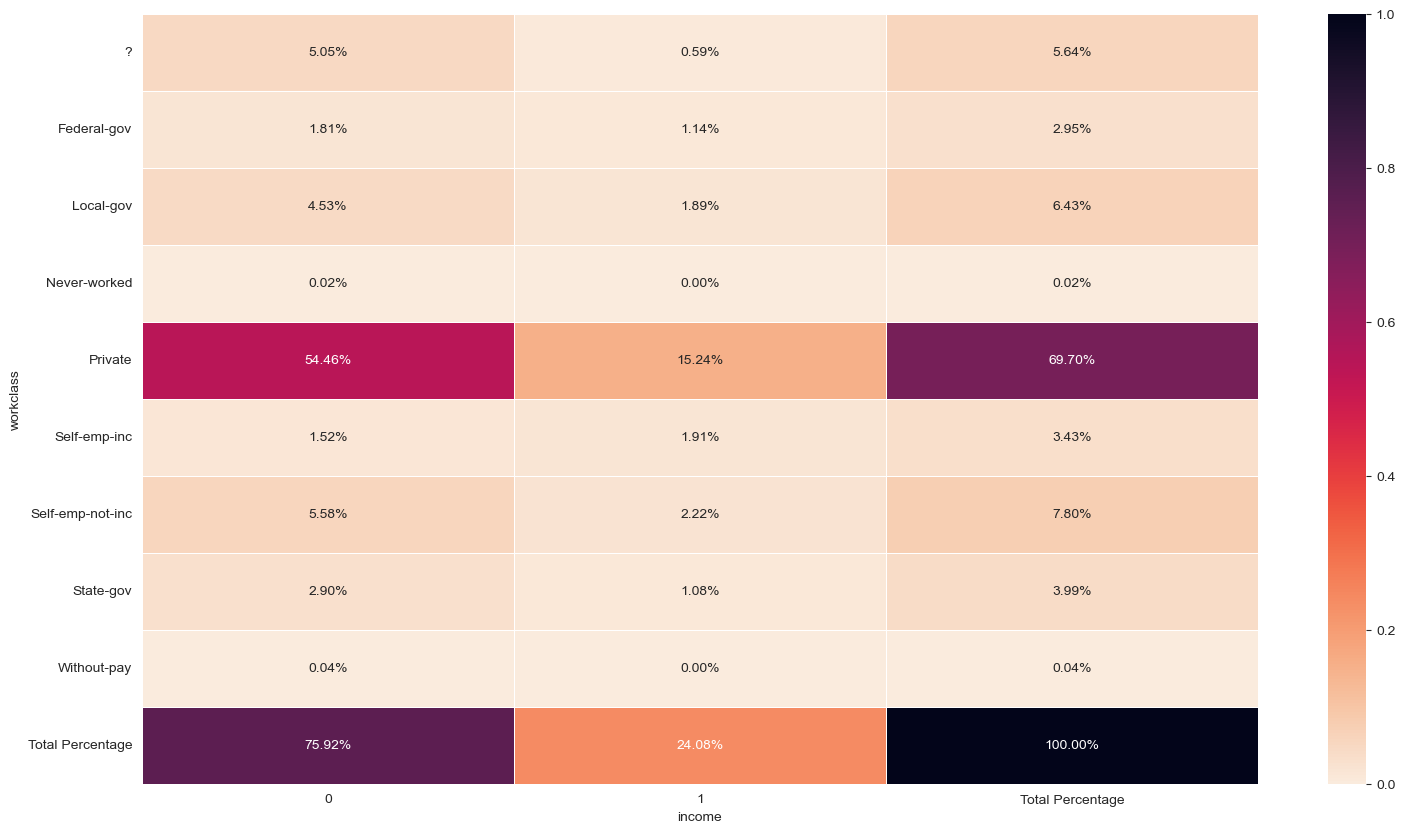



('education', 'marital_status')
marital_status    Divorced  Married-AF-spouse  Married-civ-spouse  \
education                                                           
10th              0.003685           0.000000            0.010718   
11th              0.003993           0.000000            0.010872   
12th              0.001198           0.000000            0.003993   
1st-4th           0.000307           0.000000            0.002488   
5th-6th           0.000614           0.000000            0.005282   
7th-8th           0.002242           0.000000            0.011025   
9th               0.001966           0.000000            0.007064   
Assoc-acdm        0.006234           0.000061            0.014127   
Assoc-voc         0.007187           0.000031            0.021160   
Bachelors         0.016769           0.000123            0.085010   
Doctorate         0.001013           0.000000            0.008784   
HS-grad           0.049538           0.000399            0.148798   


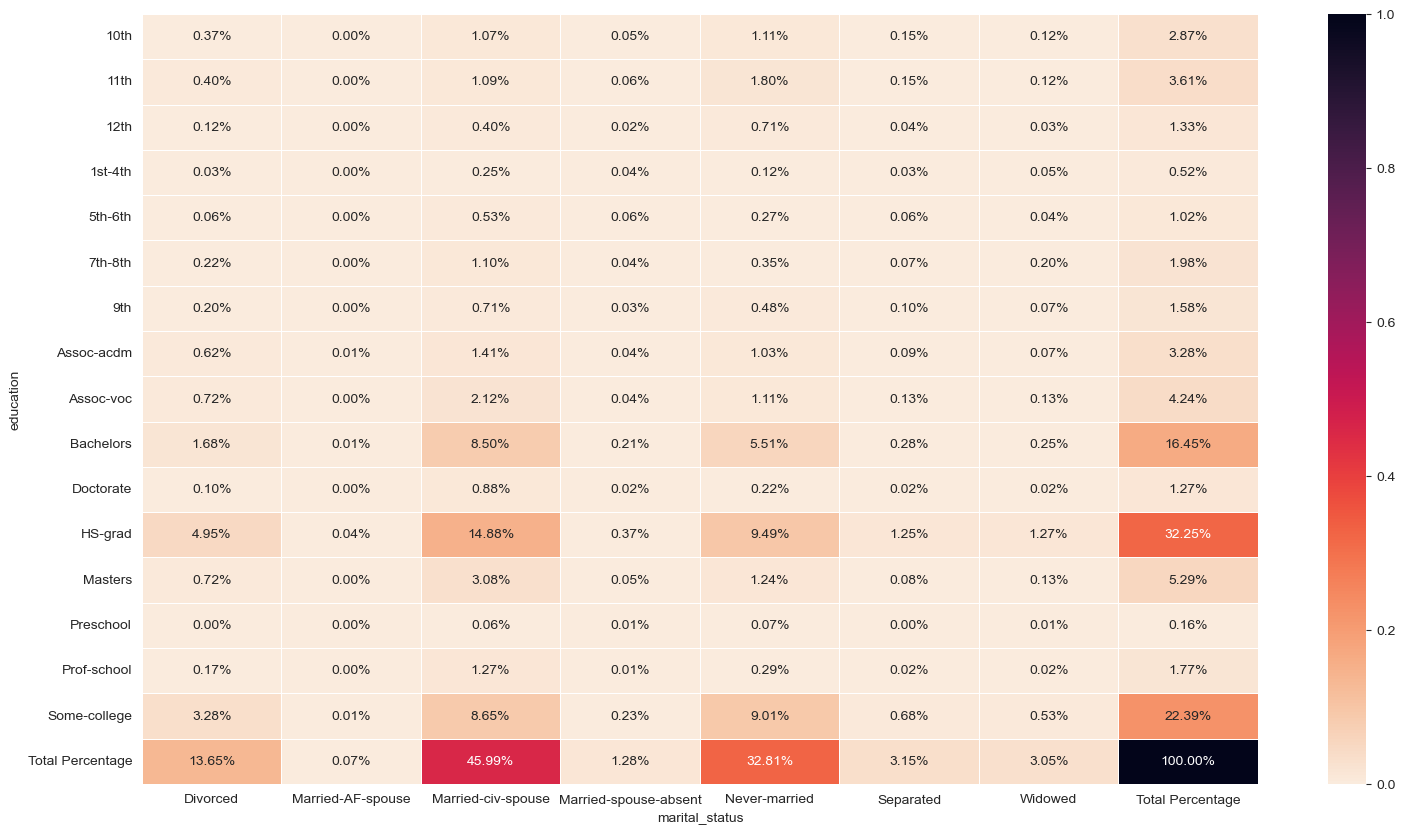



('education', 'occupation')
occupation               ?  Adm-clerical  Armed-Forces  Craft-repair  \
education                                                              
10th              0.003133      0.001167      0.000000      0.005221   
11th              0.003655      0.002058      0.000000      0.005375   
12th              0.001228      0.001167      0.000031      0.001781   
1st-4th           0.000369      0.000000      0.000000      0.000706   
5th-6th           0.000921      0.000184      0.000000      0.001321   
7th-8th           0.002242      0.000338      0.000000      0.003563   
9th               0.001566      0.000430      0.000000      0.002948   
Assoc-acdm        0.001443      0.005927      0.000000      0.003532   
Assoc-voc         0.001873      0.005129      0.000000      0.007739   
Bachelors         0.005313      0.015540      0.000031      0.006941   
Doctorate         0.000461      0.000154      0.000000      0.000061   
HS-grad           0.016369      0.

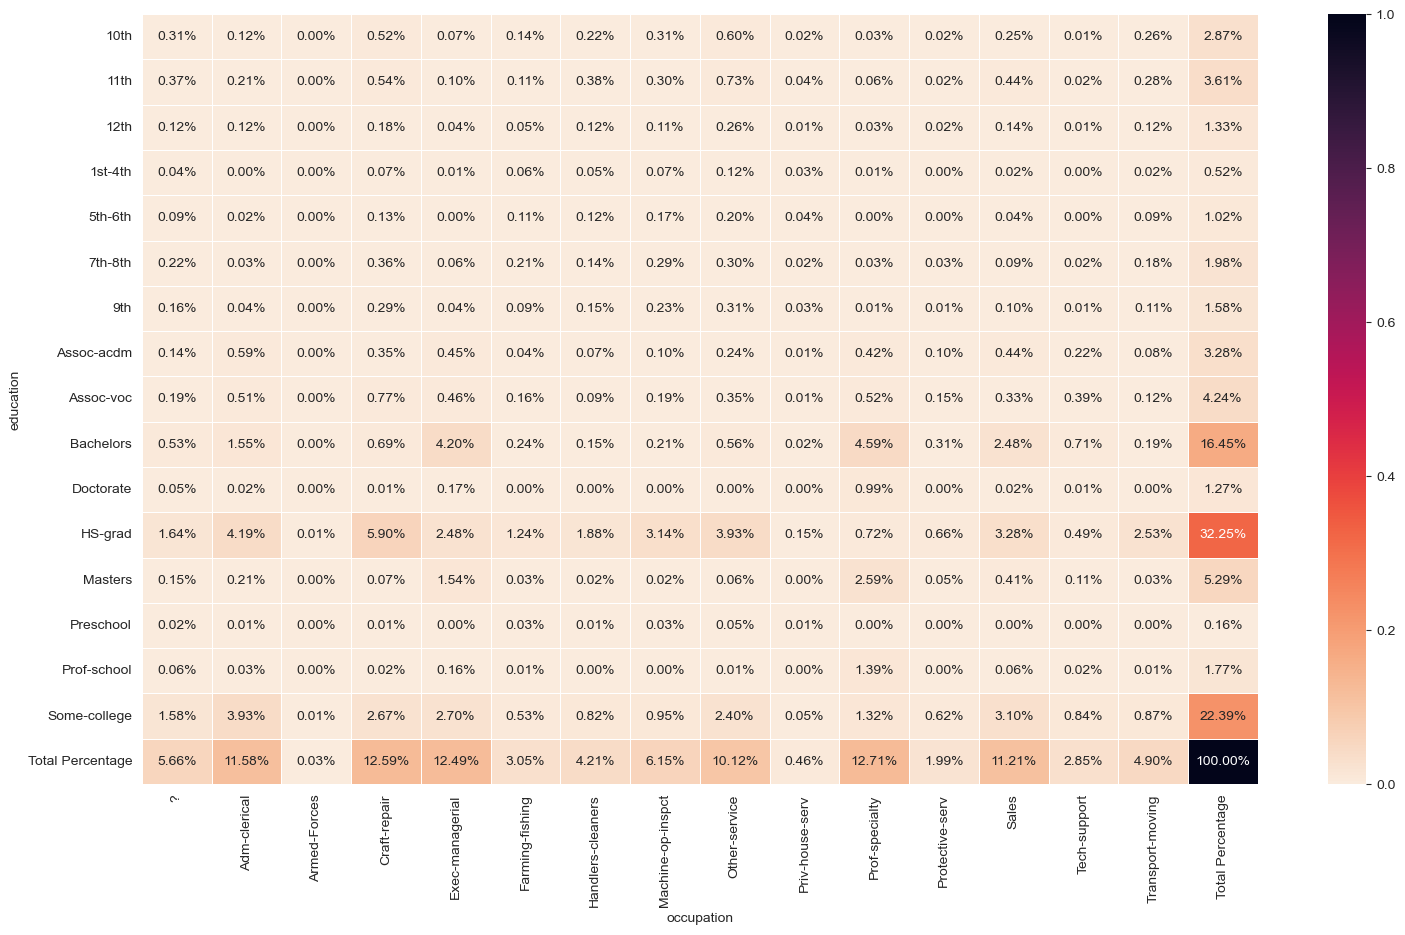



('education', 'relationship')
relationship       Husband  Not-in-family  Other-relative  Own-child  \
education                                                              
10th              0.009613       0.006449        0.001321   0.006910   
11th              0.009551       0.006480        0.001812   0.013083   
12th              0.003163       0.002979        0.000706   0.004730   
1st-4th           0.002150       0.001536        0.000491   0.000276   
5th-6th           0.004576       0.002150        0.001228   0.000461   
7th-8th           0.010227       0.004238        0.001013   0.001505   
9th               0.006204       0.003409        0.000921   0.002457   
Assoc-acdm        0.011670       0.010166        0.000461   0.004023   
Assoc-voc         0.018304       0.010780        0.000737   0.004422   
Bachelors         0.074721       0.051135        0.002672   0.016062   
Doctorate         0.008139       0.002948        0.000092   0.000215   
HS-grad           0.131415      

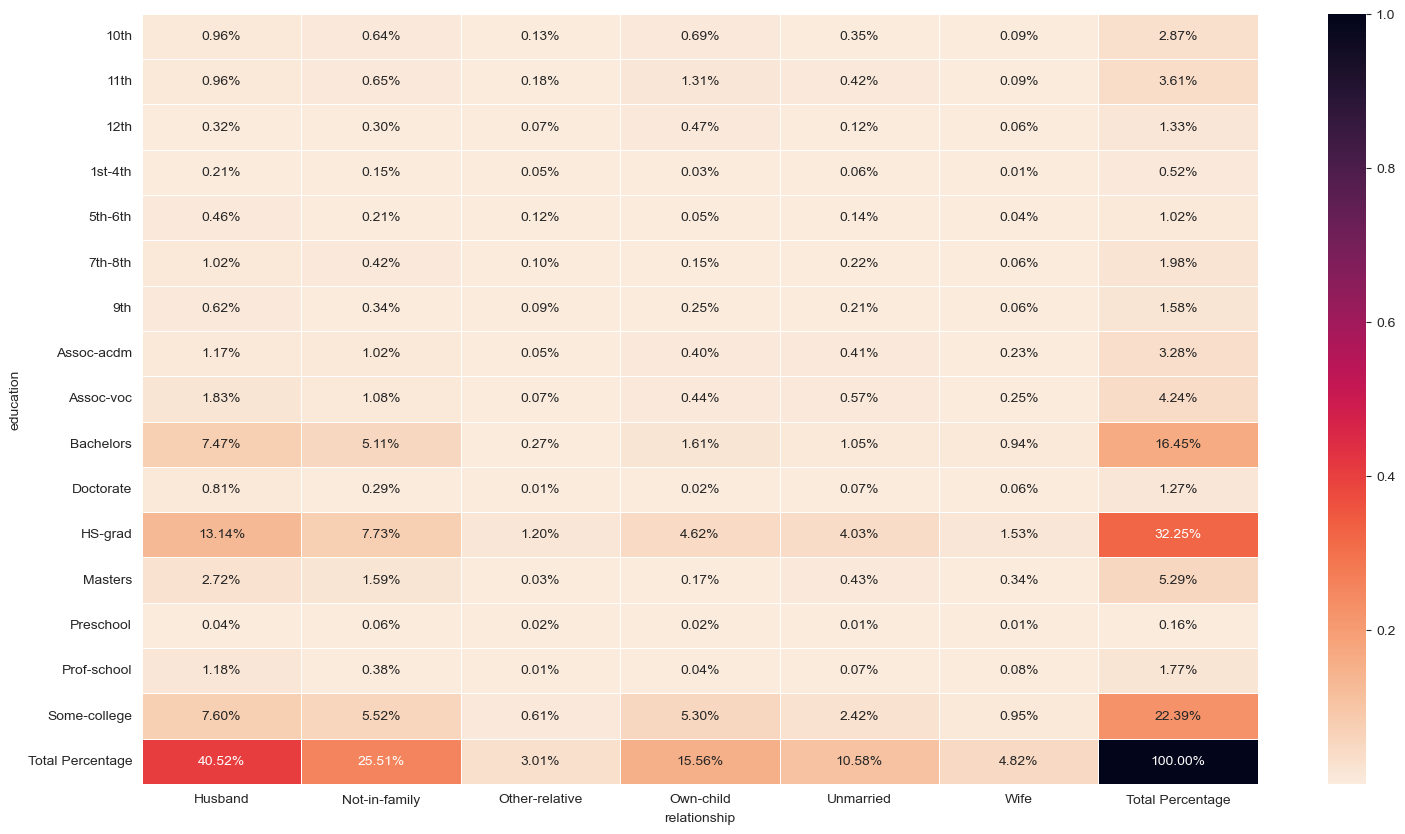



('education', 'race')
race              Amer-Indian-Eskimo  Asian-Pac-Islander     Black     Other  \
education                                                                      
10th                        0.000491            0.000399  0.004085  0.000276   
11th                        0.000430            0.000645  0.004699  0.000307   
12th                        0.000154            0.000276  0.002150  0.000430   
1st-4th                     0.000123            0.000154  0.000491  0.000276   
5th-6th                     0.000061            0.000553  0.000645  0.000399   
7th-8th                     0.000276            0.000338  0.001720  0.000522   
9th                         0.000154            0.000276  0.002733  0.000246   
Assoc-acdm                  0.000246            0.000891  0.003286  0.000246   
Assoc-voc                   0.000584            0.001167  0.003440  0.000184   
Bachelors                   0.000645            0.008876  0.010135  0.001013   
Doctorate       

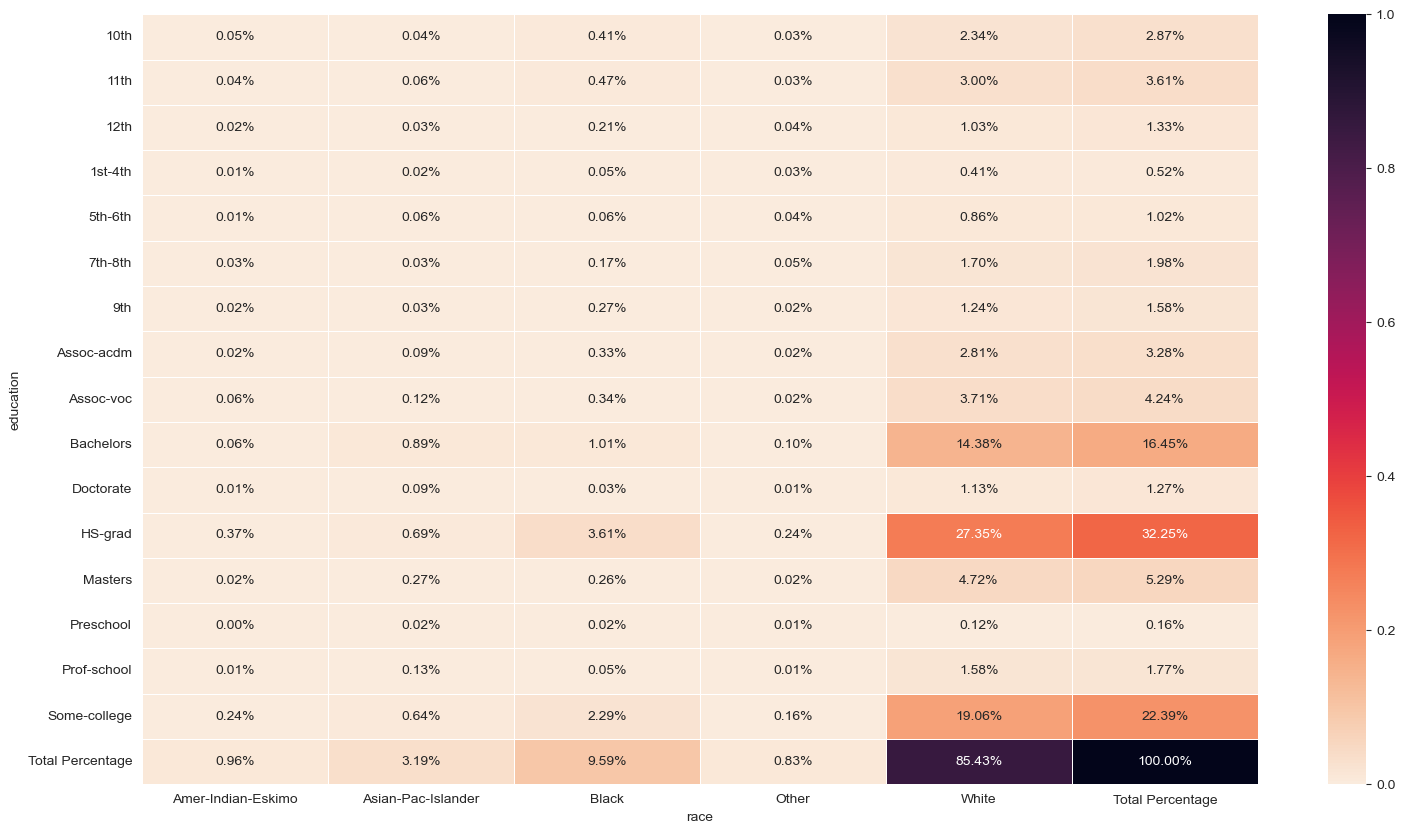



('education', 'sex')
sex                 Female      Male  Total Percentage
education                                             
10th              0.009060  0.019594          0.028654
11th              0.013267  0.022819          0.036086
12th              0.004422  0.008876          0.013298
1st-4th           0.001413  0.003747          0.005160
5th-6th           0.002580  0.007647          0.010227
7th-8th           0.004914  0.014926          0.019840
9th               0.004422  0.011363          0.015786
Assoc-acdm        0.012930  0.019840          0.032769
Assoc-voc         0.015356  0.027088          0.042443
Bachelors         0.049722  0.114738          0.164461
Doctorate         0.002641  0.010043          0.012684
HS-grad           0.104112  0.218390          0.322502
Masters           0.016461  0.036455          0.052916
Preschool         0.000491  0.001075          0.001566
Prof-school       0.002825  0.014864          0.017690
Some-college      0.086177  0.137741      

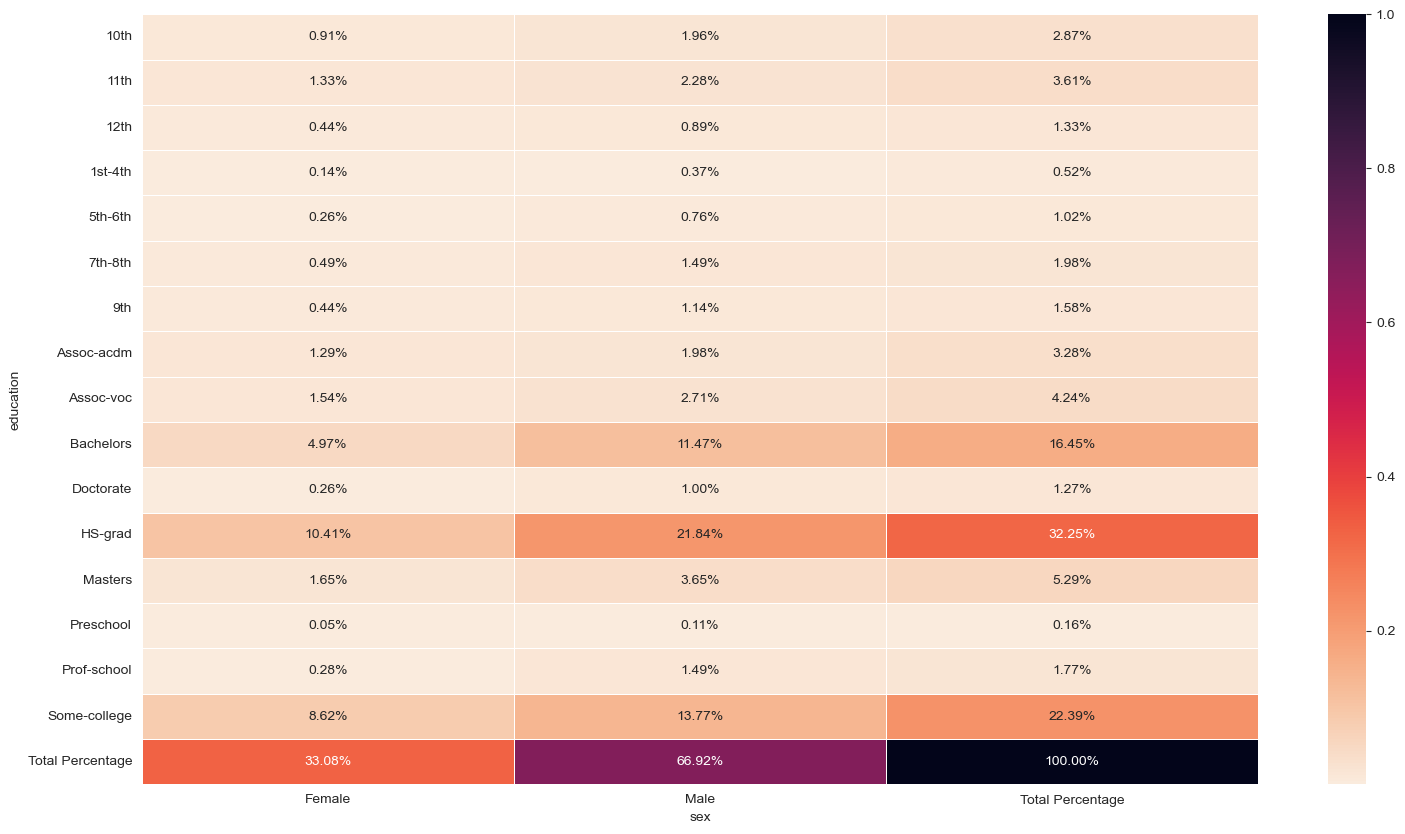



('education', 'native_country')
native_country           ?  Cambodia    Canada     China  Columbia      Cuba  \
education                                                                      
10th              0.000369  0.000000  0.000061  0.000092  0.000092  0.000061   
11th              0.000246  0.000000  0.000154  0.000000  0.000031  0.000031   
12th              0.000491  0.000031  0.000061  0.000000  0.000061  0.000092   
1st-4th           0.000154  0.000031  0.000000  0.000000  0.000031  0.000092   
5th-6th           0.000461  0.000000  0.000031  0.000000  0.000061  0.000123   
7th-8th           0.000584  0.000031  0.000061  0.000123  0.000031  0.000184   
9th               0.000246  0.000000  0.000092  0.000061  0.000092  0.000092   
Assoc-acdm        0.000369  0.000000  0.000031  0.000000  0.000123  0.000092   
Assoc-voc         0.000491  0.000000  0.000215  0.000000  0.000154  0.000061   
Bachelors         0.004453  0.000092  0.000737  0.000645  0.000123  0.000522   
Doctor

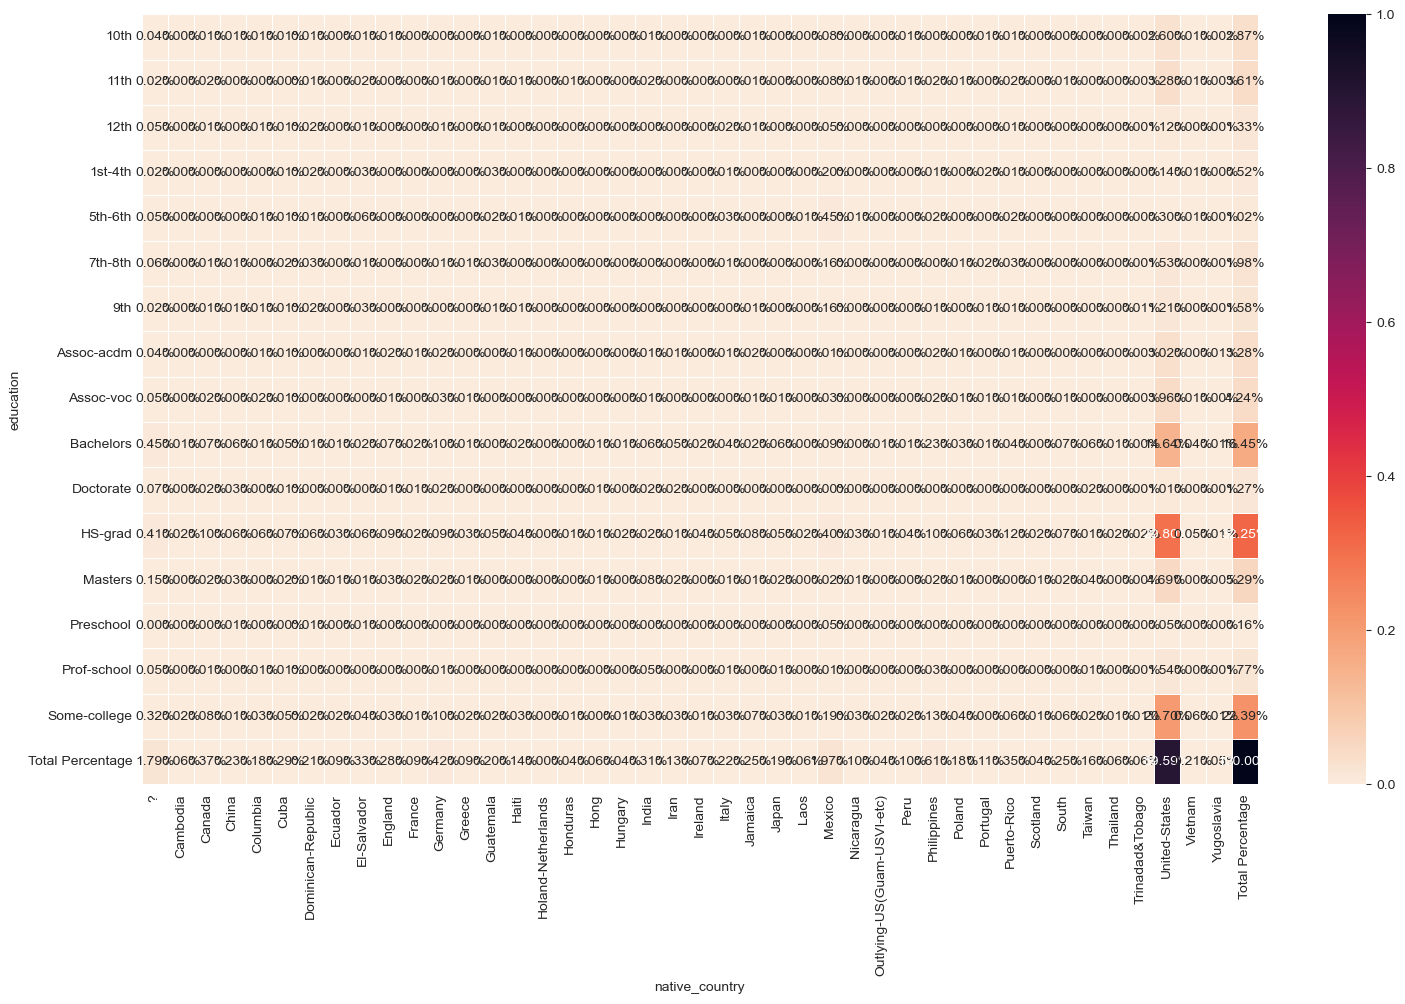



('education', 'income')
income                   0         1  Total Percentage
education                                             
10th              0.026750  0.001904          0.028654
11th              0.034243  0.001843          0.036086
12th              0.012285  0.001013          0.013298
1st-4th           0.004975  0.000184          0.005160
5th-6th           0.009736  0.000491          0.010227
7th-8th           0.018611  0.001228          0.019840
9th               0.014957  0.000829          0.015786
Assoc-acdm        0.024631  0.008139          0.032769
Assoc-voc         0.031357  0.011087          0.042443
Bachelors         0.096250  0.068210          0.164461
Doctorate         0.003286  0.009398          0.012684
HS-grad           0.271060  0.051442          0.322502
Masters           0.023464  0.029452          0.052916
Preschool         0.001566  0.000000          0.001566
Prof-school       0.004699  0.012991          0.017690
Some-college      0.181321  0.042597   

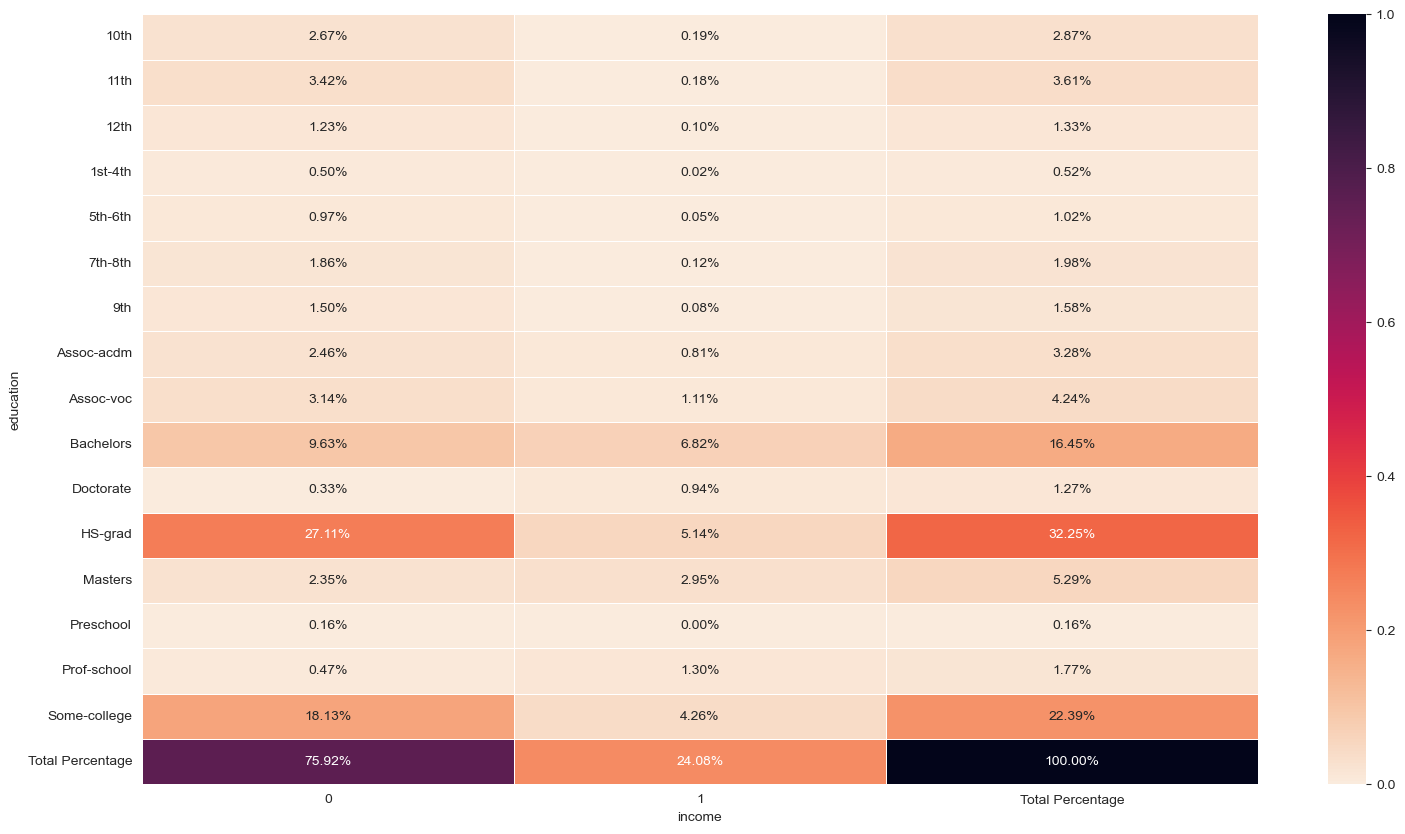



('marital_status', 'occupation')
occupation                    ?  Adm-clerical  Armed-Forces  Craft-repair  \
marital_status                                                              
Divorced               0.005682      0.025153      0.000000      0.014250   
Married-AF-spouse      0.000061      0.000154      0.000000      0.000092   
Married-civ-spouse     0.019563      0.030282      0.000092      0.078745   
Married-spouse-absent  0.000891      0.001812      0.000000      0.001597   
Never-married          0.023679      0.048862      0.000184      0.026781   
Separated              0.002027      0.004515      0.000000      0.003163   
Widowed                0.004699      0.005006      0.000000      0.001259   
Total Percentage       0.056601      0.115783      0.000276      0.125887   

occupation             Exec-managerial  Farming-fishing  Handlers-cleaners  \
marital_status                                                               
Divorced                      0.018550

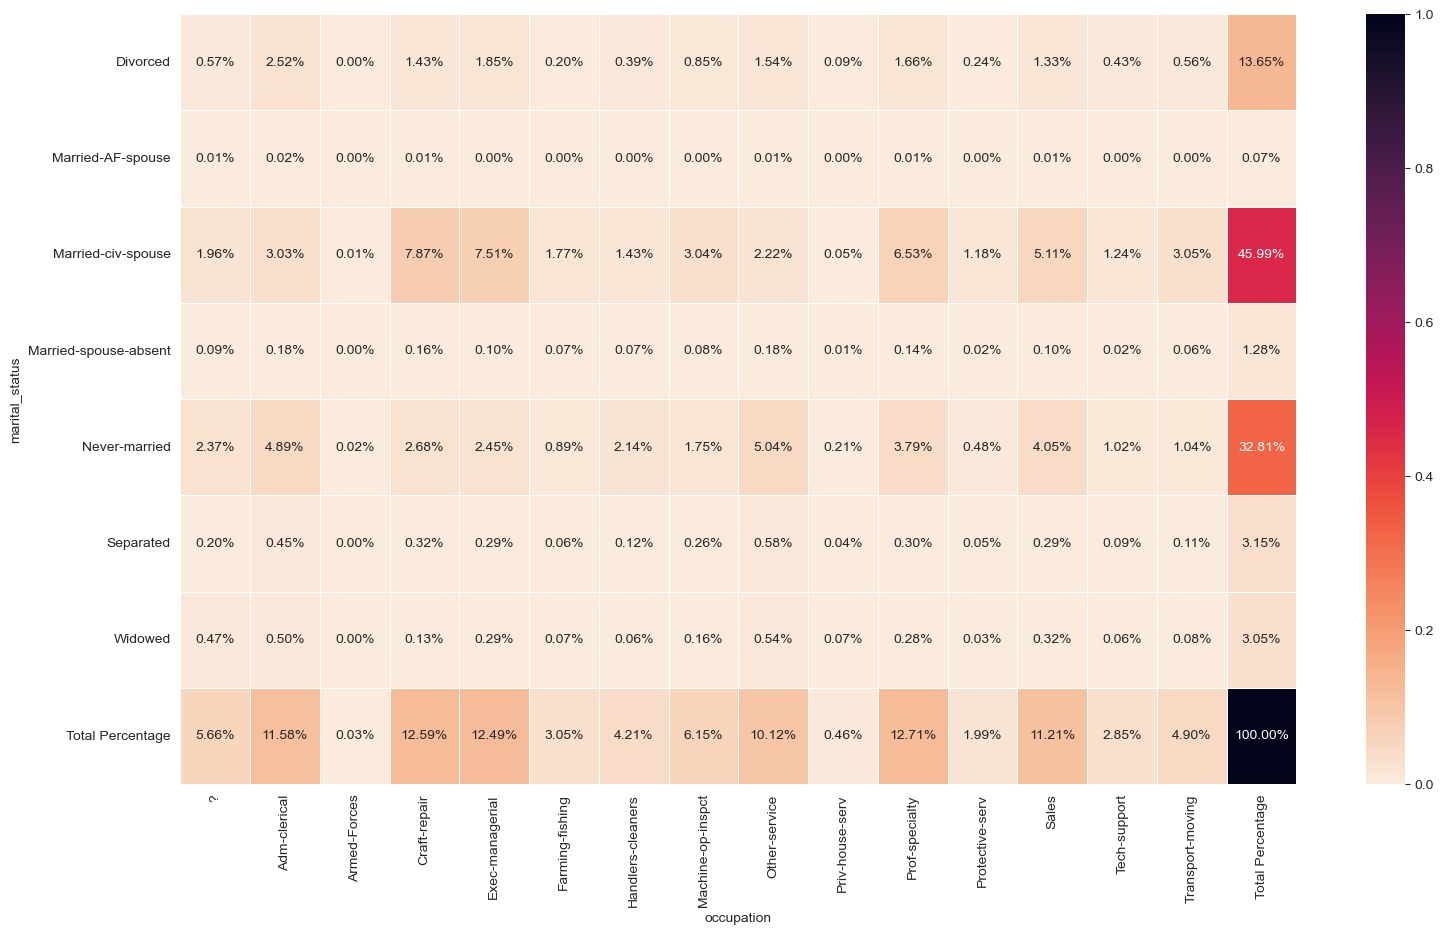



('marital_status', 'relationship')
relationship            Husband  Not-in-family  Other-relative  Own-child  \
marital_status                                                              
Divorced               0.000000       0.073831        0.003378   0.010073   
Married-AF-spouse      0.000276       0.000000        0.000031   0.000031   
Married-civ-spouse     0.404902       0.000522        0.003808   0.002918   
Married-spouse-absent  0.000000       0.006480        0.000983   0.001382   
Never-married          0.000000       0.144529        0.018765   0.137741   
Separated              0.000000       0.012899        0.001689   0.003040   
Widowed                0.000000       0.016799        0.001474   0.000461   
Total Percentage       0.405178       0.255060        0.030128   0.155646   

relationship           Unmarried      Wife  Total Percentage  
marital_status                                                
Divorced                0.049169  0.000000          0.136452  
Mar

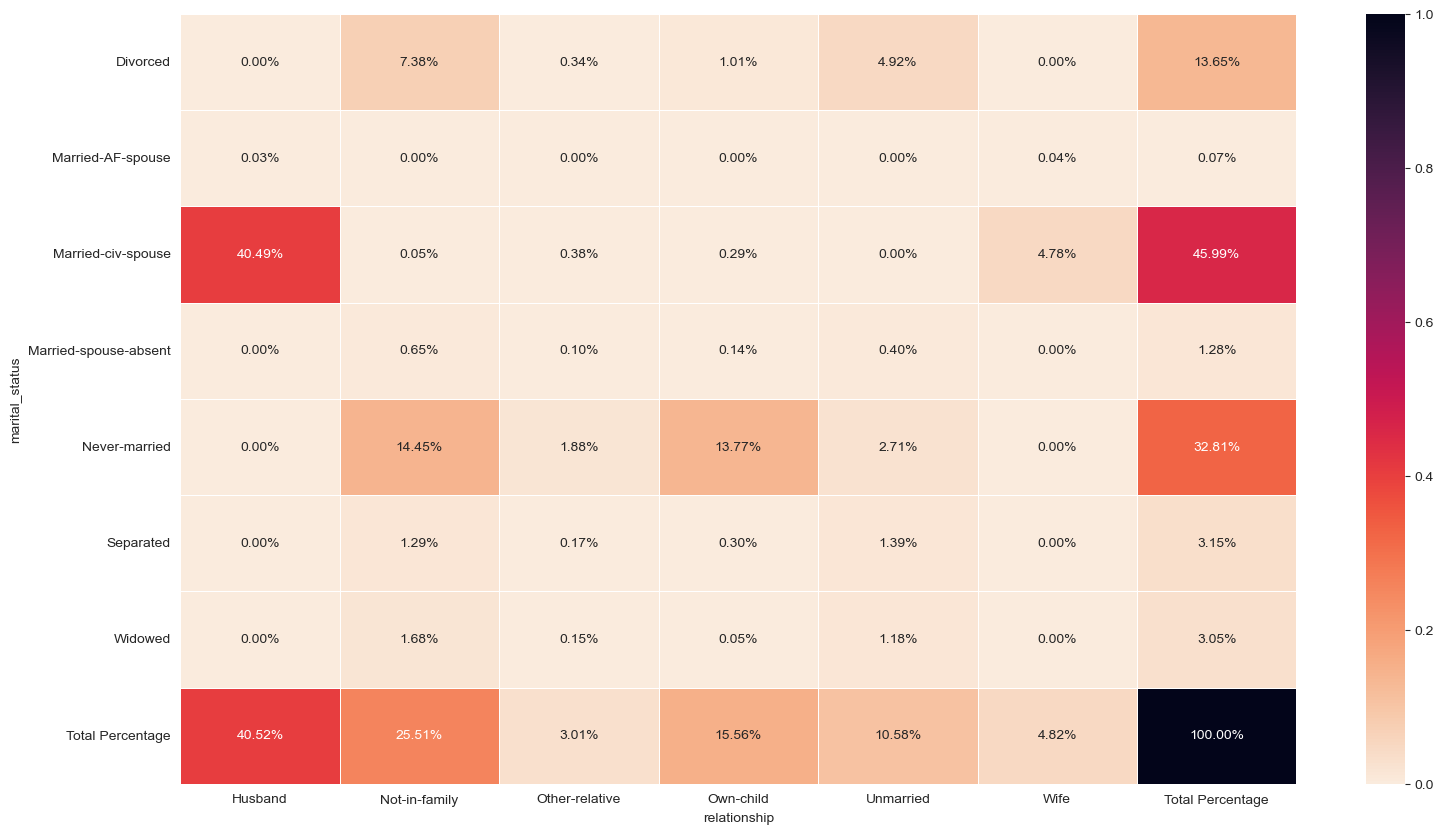



('marital_status', 'race')
race                   Amer-Indian-Eskimo  Asian-Pac-Islander     Black  \
marital_status                                                            
Divorced                         0.001843            0.002303  0.014895   
Married-AF-spouse                0.000000            0.000000  0.000031   
Married-civ-spouse               0.003563            0.015601  0.025706   
Married-spouse-absent            0.000276            0.001259  0.001904   
Never-married                    0.003163            0.011425  0.041338   
Separated                        0.000338            0.000584  0.008139   
Widowed                          0.000369            0.000737  0.003931   
Total Percentage                 0.009551            0.031909  0.095943   

race                      Other     White  Total Percentage  
marital_status                                               
Divorced               0.000799  0.116612          0.136452  
Married-AF-spouse      0.000000  0

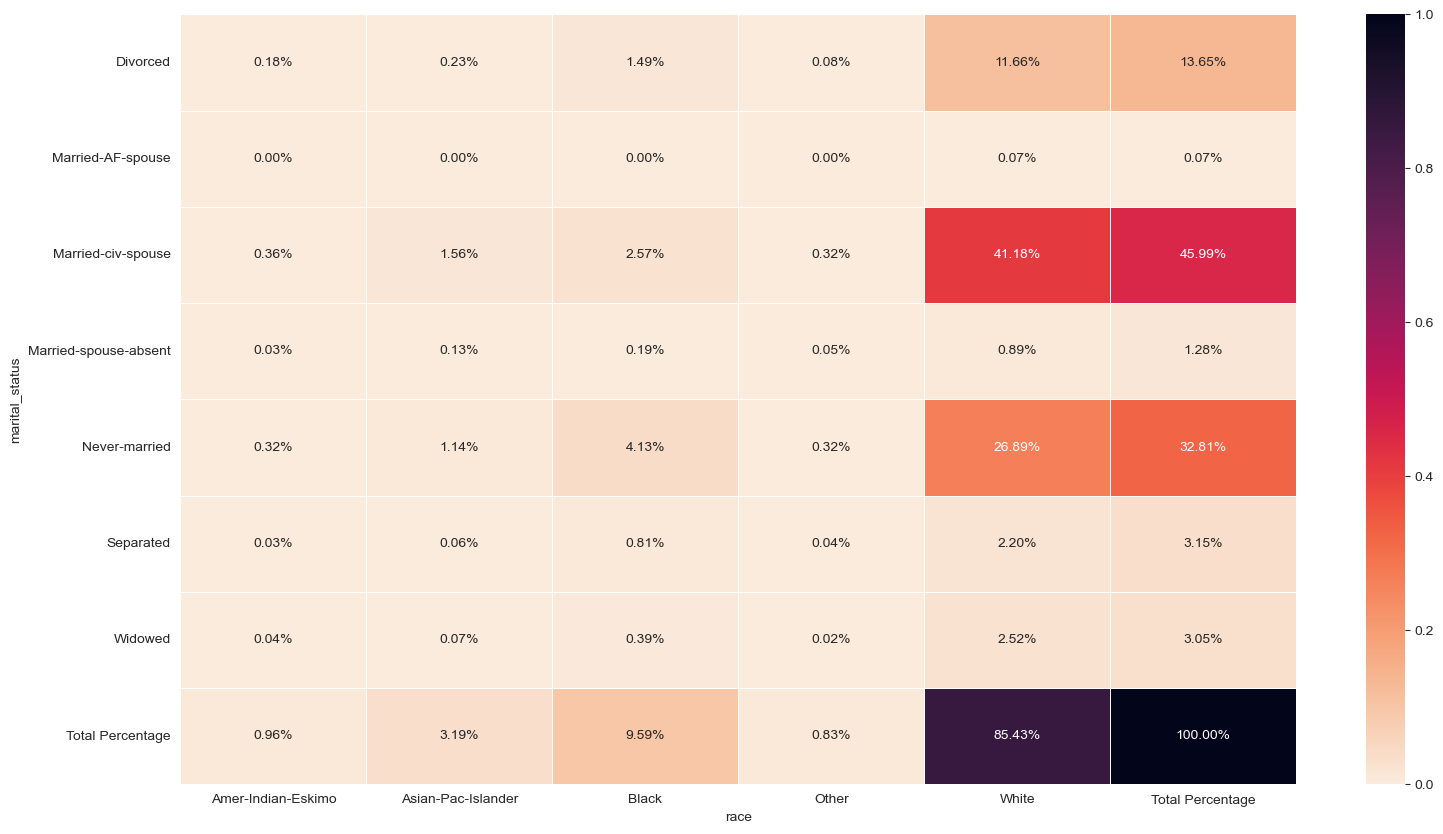



('marital_status', 'sex')
sex                      Female      Male  Total Percentage
marital_status                                             
Divorced               0.082061  0.054390          0.136452
Married-AF-spouse      0.000430  0.000276          0.000706
Married-civ-spouse     0.050889  0.409048          0.459937
Married-spouse-absent  0.006296  0.006542          0.012837
Never-married          0.146402  0.181690          0.328092
Separated              0.019379  0.012100          0.031479
Widowed                0.025337  0.005160          0.030497
Total Percentage       0.330795  0.669205          1.000000


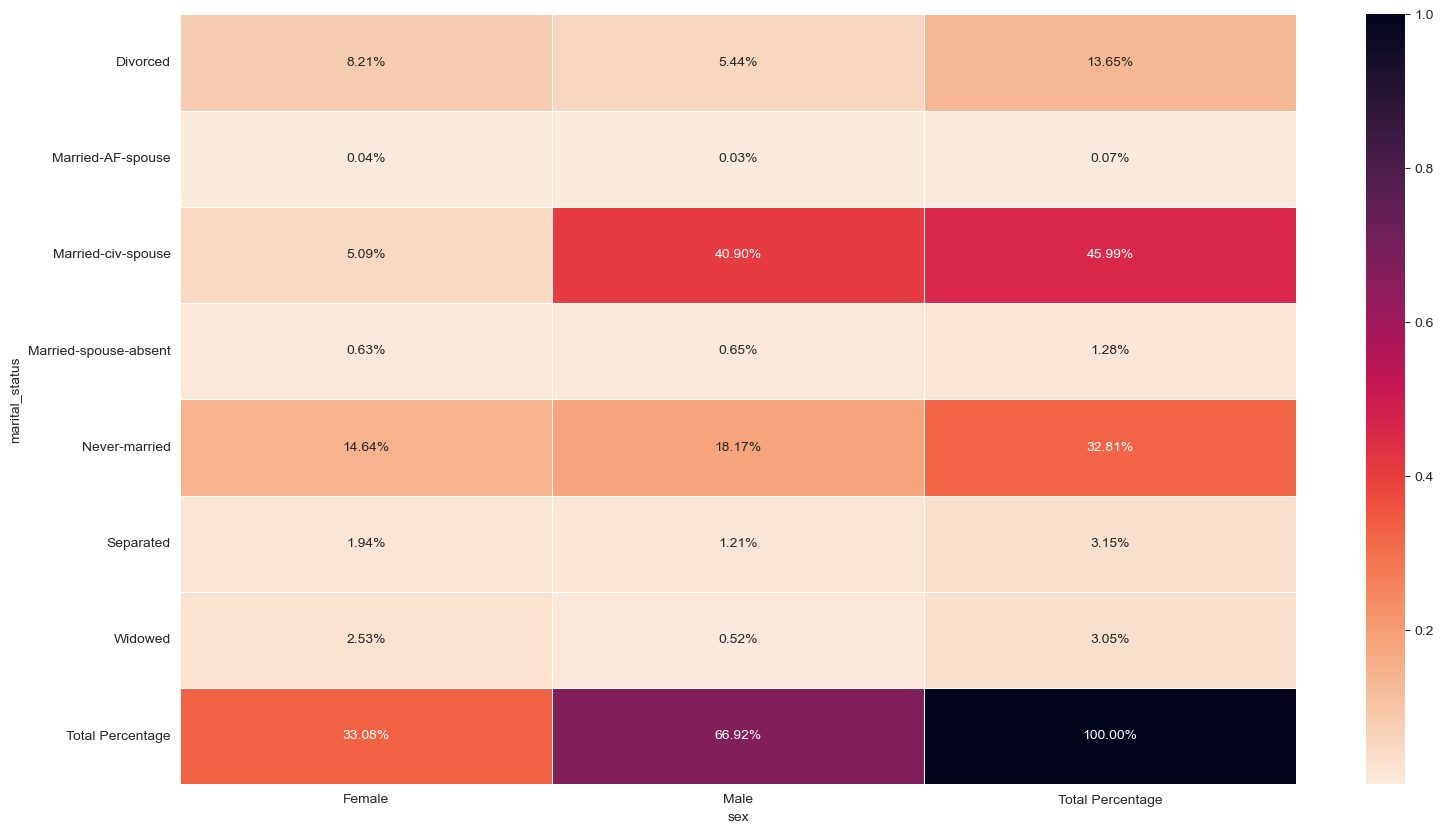



('marital_status', 'native_country')
native_country                ?  Cambodia    Canada     China  Columbia  \
marital_status                                                            
Divorced               0.001505  0.000000  0.000491  0.000154  0.000184   
Married-AF-spouse      0.000000  0.000000  0.000000  0.000000  0.000000   
Married-civ-spouse     0.008722  0.000338  0.001935  0.001536  0.000584   
Married-spouse-absent  0.000645  0.000031  0.000092  0.000184  0.000154   
Never-married          0.005989  0.000215  0.001013  0.000338  0.000614   
Separated              0.000614  0.000000  0.000092  0.000061  0.000184   
Widowed                0.000430  0.000000  0.000092  0.000031  0.000092   
Total Percentage       0.017905  0.000584  0.003716  0.002303  0.001812   

native_country             Cuba  Dominican-Republic   Ecuador  El-Salvador  \
marital_status                                                               
Divorced               0.000461            0.000246  0

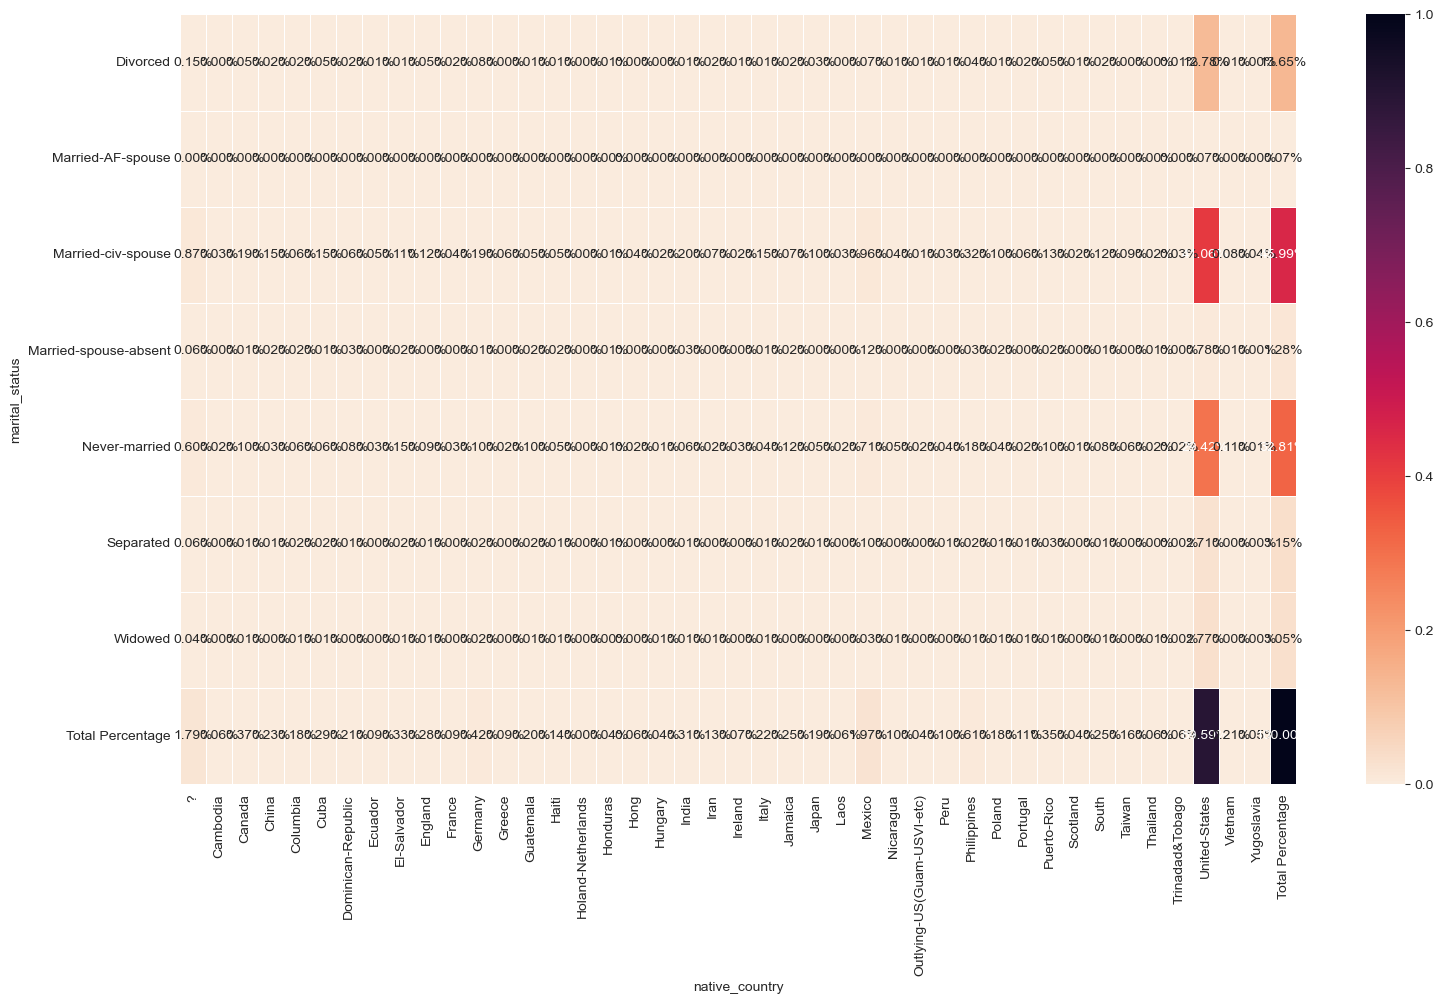



('marital_status', 'income')
income                        0         1  Total Percentage
marital_status                                             
Divorced               0.122232  0.014219          0.136452
Married-AF-spouse      0.000399  0.000307          0.000706
Married-civ-spouse     0.254415  0.205522          0.459937
Married-spouse-absent  0.011793  0.001044          0.012837
Never-married          0.313012  0.015079          0.328092
Separated              0.029452  0.002027          0.031479
Widowed                0.027886  0.002610          0.030497
Total Percentage       0.759190  0.240810          1.000000


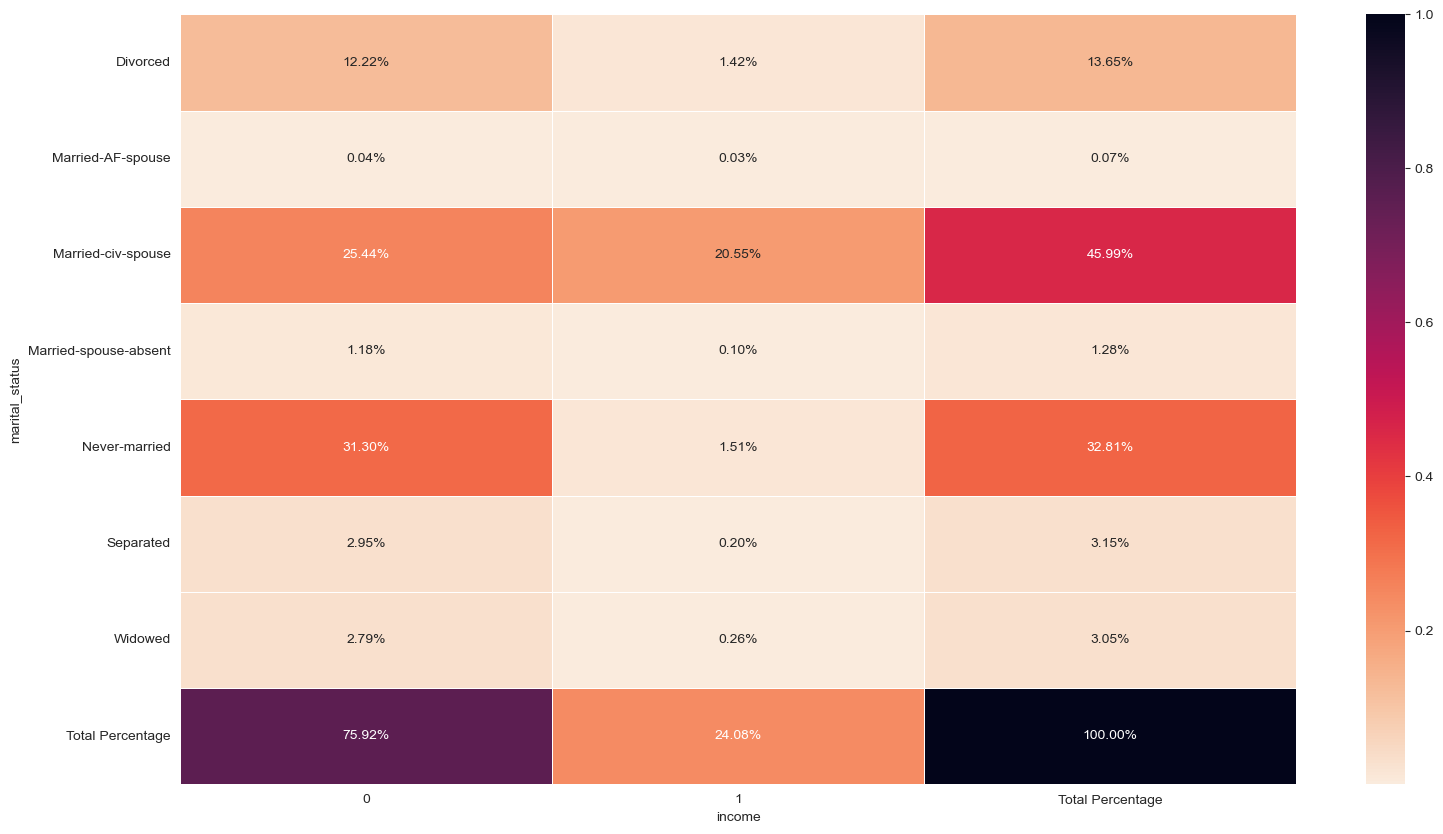



('occupation', 'relationship')
relationship        Husband  Not-in-family  Other-relative  Own-child  \
occupation                                                              
?                  0.015018       0.013513        0.001935   0.016676   
Adm-clerical       0.018673       0.035718        0.004085   0.023709   
Armed-Forces       0.000061       0.000123        0.000061   0.000031   
Craft-repair       0.077117       0.025675        0.003071   0.011670   
Exec-managerial    0.067166       0.030435        0.001474   0.007279   
Farming-fishing    0.017014       0.005620        0.000952   0.004545   
Handlers-cleaners  0.013421       0.009490        0.002795   0.012837   
Machine-op-inspct  0.027303       0.014158        0.002334   0.008077   
Other-service      0.015847       0.029575        0.005835   0.027364   
Priv-house-serv    0.000000       0.001966        0.000584   0.000676   
Prof-specialty     0.055404       0.039034        0.001781   0.009705   
Protective-serv   

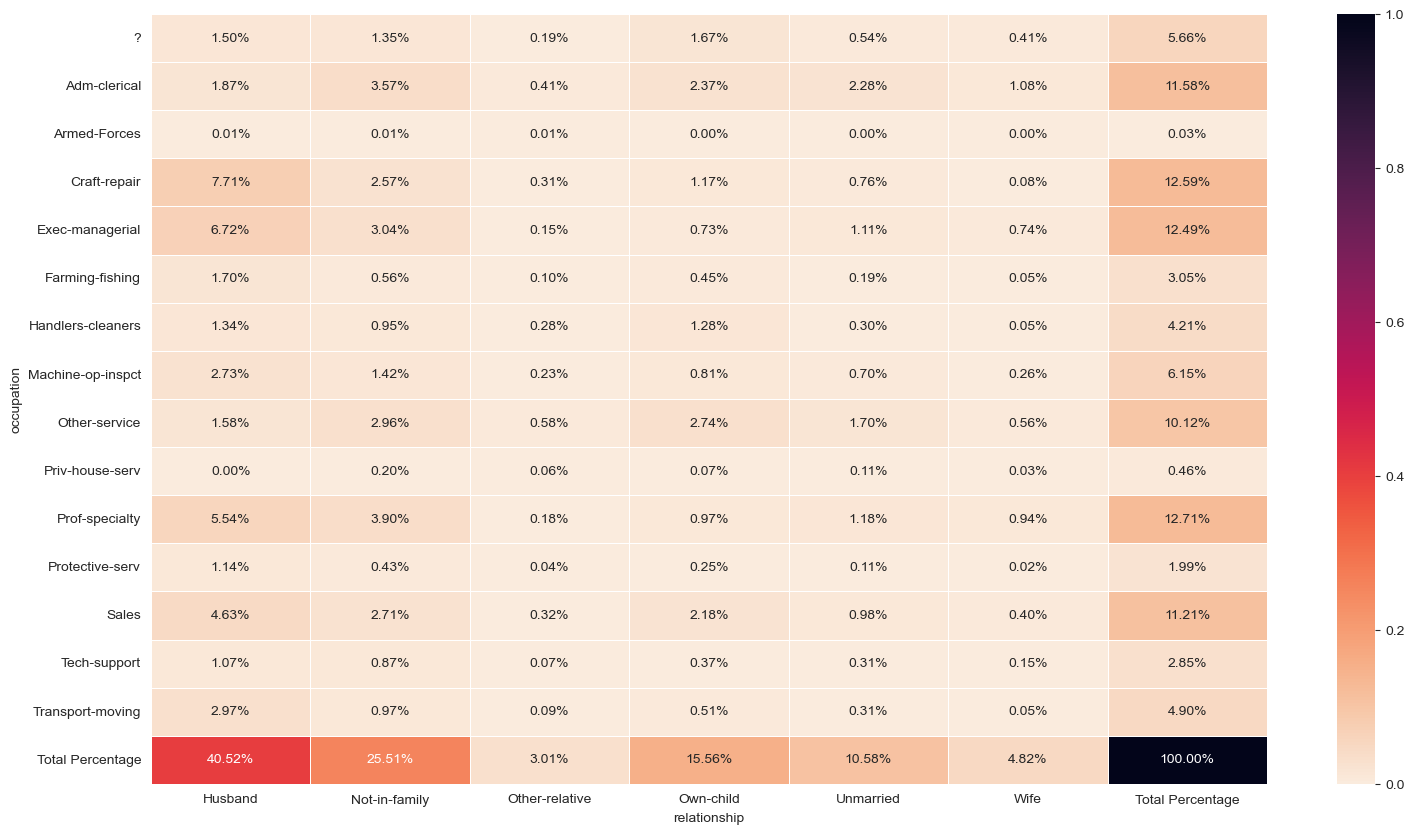



('occupation', 'race')
race               Amer-Indian-Eskimo  Asian-Pac-Islander     Black     Other  \
occupation                                                                      
?                            0.000768            0.001996  0.006603  0.000706   
Adm-clerical                 0.000952            0.004269  0.015049  0.000799   
Armed-Forces                 0.000031            0.000000  0.000031  0.000000   
Craft-repair                 0.001351            0.002733  0.007494  0.000860   
Exec-managerial              0.000921            0.004146  0.007494  0.000338   
Farming-fishing              0.000307            0.000491  0.001290  0.000338   
Handlers-cleaners            0.000676            0.000706  0.005497  0.000369   
Machine-op-inspct            0.000584            0.001812  0.008415  0.001198   
Other-service                0.001013            0.003931  0.017536  0.001228   
Priv-house-serv              0.000000            0.000123  0.000860  0.000092   
Pro

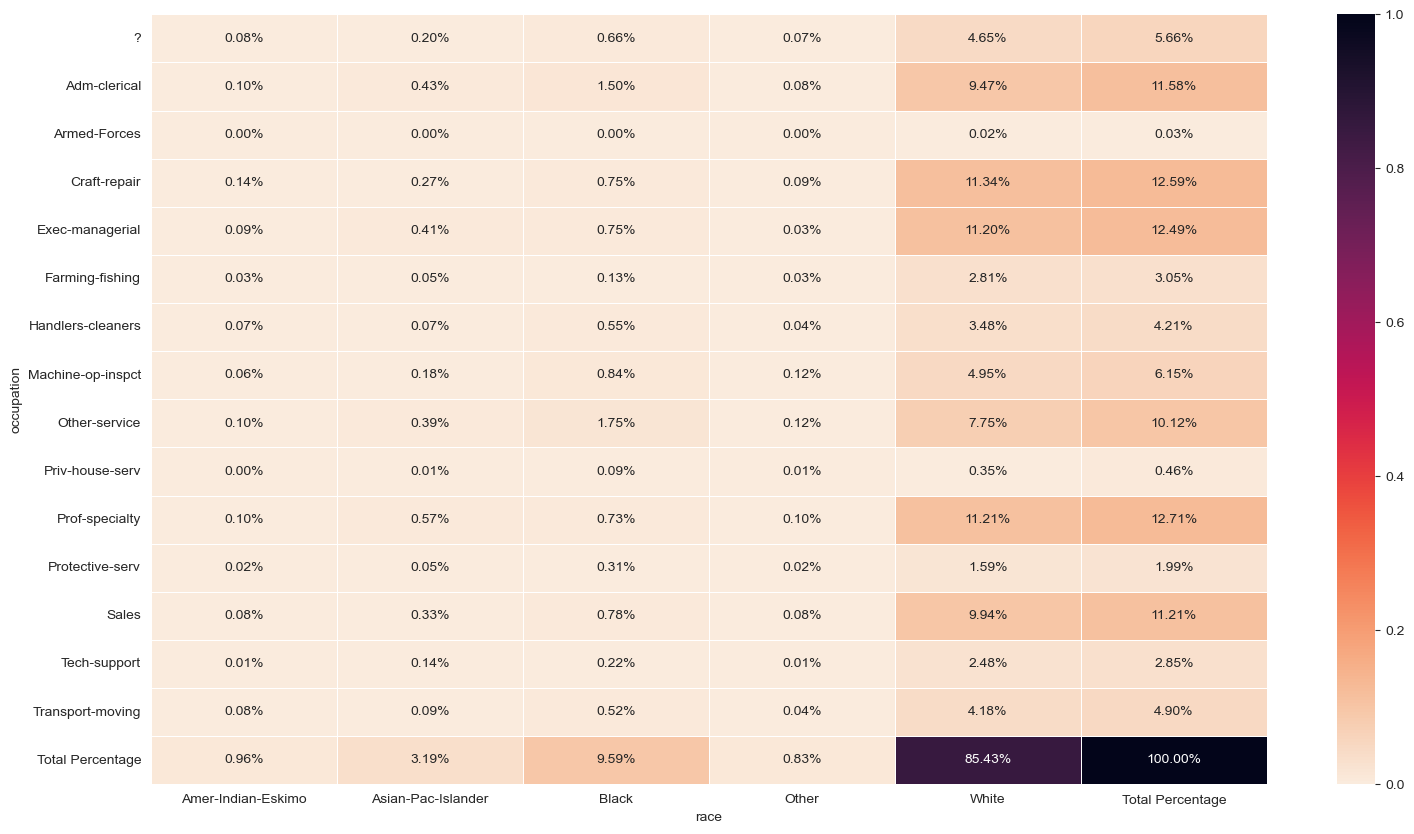



('occupation', 'sex')
sex                  Female      Male  Total Percentage
occupation                                             
?                  0.025828  0.030773          0.056601
Adm-clerical       0.077915  0.037867          0.115783
Armed-Forces       0.000000  0.000276          0.000276
Craft-repair       0.006818  0.119069          0.125887
Exec-managerial    0.035595  0.089279          0.124873
Farming-fishing    0.001996  0.028531          0.030527
Handlers-cleaners  0.005037  0.037038          0.042075
Machine-op-inspct  0.016891  0.044593          0.061485
Other-service      0.055281  0.045914          0.101195
Priv-house-serv    0.004330  0.000246          0.004576
Prof-specialty     0.046528  0.080618          0.127146
Protective-serv    0.002334  0.017598          0.019932
Sales              0.038789  0.073309          0.112097
Tech-support       0.010688  0.017813          0.028500
Transport-moving   0.002764  0.046282          0.049046
Total Percentage   0.330

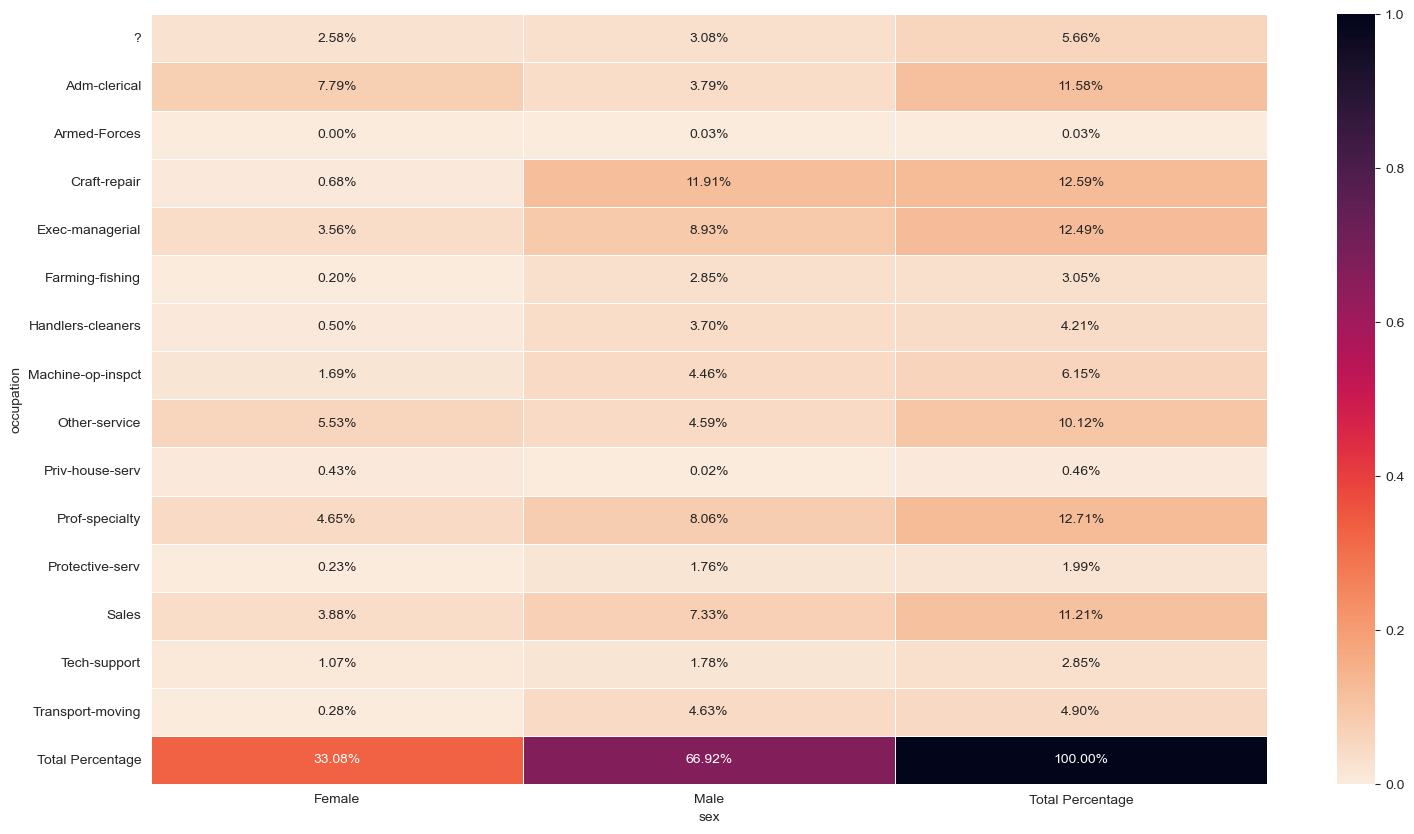



('occupation', 'native_country')
native_country            ?  Cambodia    Canada     China  Columbia      Cuba  \
occupation                                                                      
?                  0.000829  0.000031  0.000430  0.000215  0.000092  0.000092   
Adm-clerical       0.001505  0.000000  0.000369  0.000061  0.000246  0.000369   
Armed-Forces       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Craft-repair       0.002119  0.000184  0.000461  0.000092  0.000276  0.000215   
Exec-managerial    0.002273  0.000031  0.000399  0.000307  0.000123  0.000491   
Farming-fishing    0.000154  0.000031  0.000061  0.000000  0.000000  0.000061   
Handlers-cleaners  0.000614  0.000000  0.000061  0.000000  0.000092  0.000092   
Machine-op-inspct  0.001106  0.000123  0.000154  0.000246  0.000307  0.000184   
Other-service      0.002549  0.000031  0.000369  0.000491  0.000246  0.000399   
Priv-house-serv    0.000184  0.000000  0.000000  0.000000  0.000031  0.000

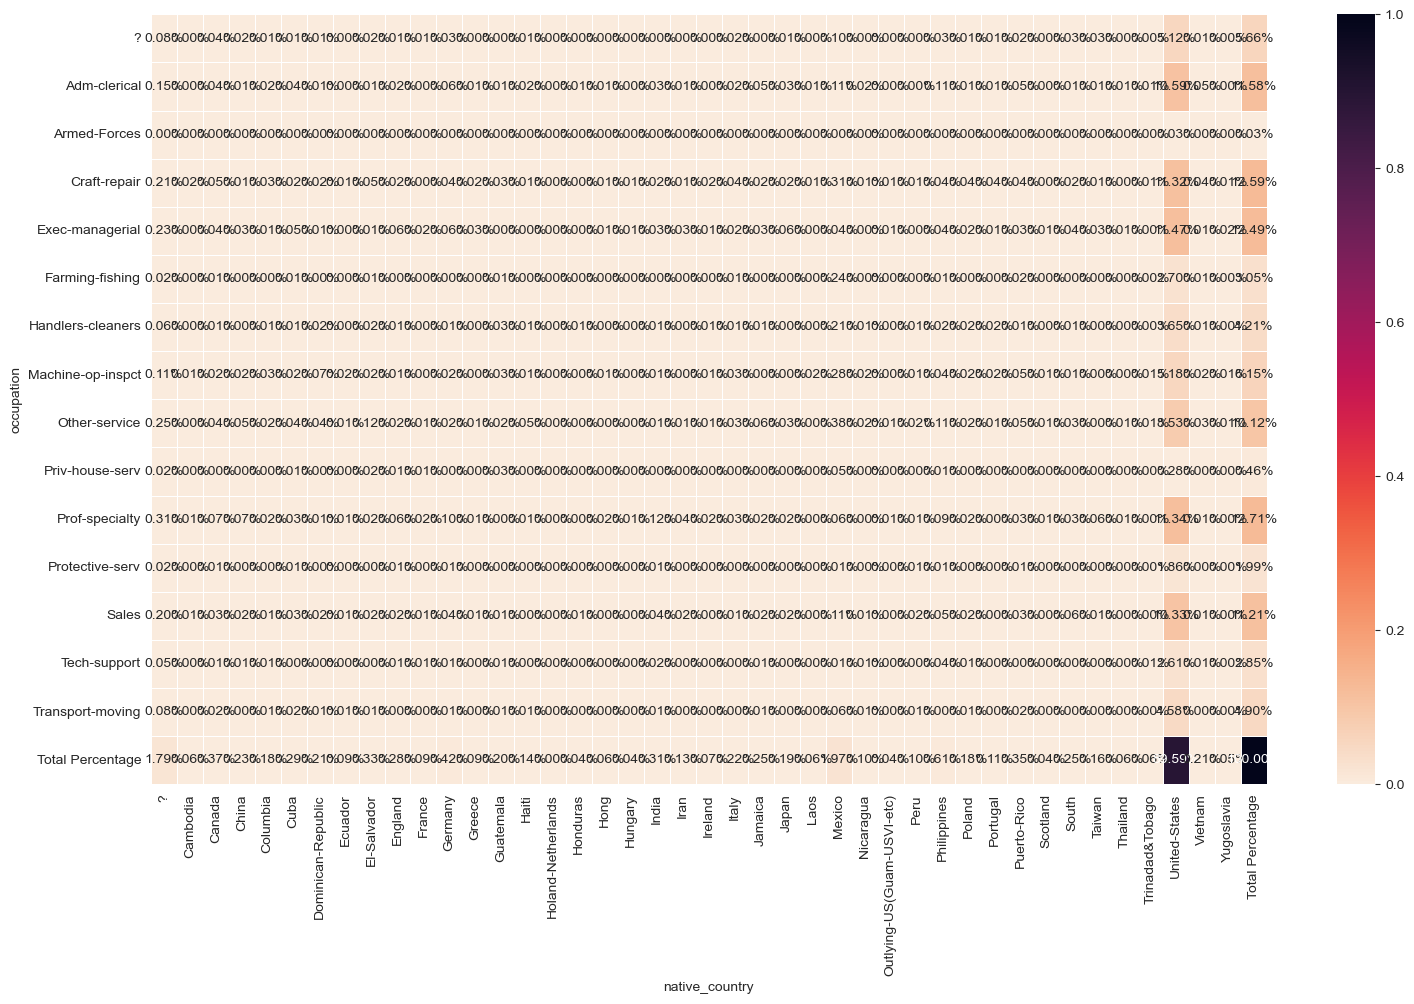



('occupation', 'income')
income                    0         1  Total Percentage
occupation                                             
?                  0.050736  0.005866          0.056601
Adm-clerical       0.100212  0.015571          0.115783
Armed-Forces       0.000246  0.000031          0.000276
Craft-repair       0.097356  0.028531          0.125887
Exec-managerial    0.064433  0.060440          0.124873
Farming-fishing    0.026995  0.003532          0.030527
Handlers-cleaners  0.039434  0.002641          0.042075
Machine-op-inspct  0.053807  0.007678          0.061485
Other-service      0.096987  0.004207          0.101195
Priv-house-serv    0.004545  0.000031          0.004576
Prof-specialty     0.070053  0.057093          0.127146
Protective-serv    0.013452  0.006480          0.019932
Sales              0.081908  0.030189          0.112097
Tech-support       0.019809  0.008691          0.028500
Transport-moving   0.039219  0.009828          0.049046
Total Percentage   0.

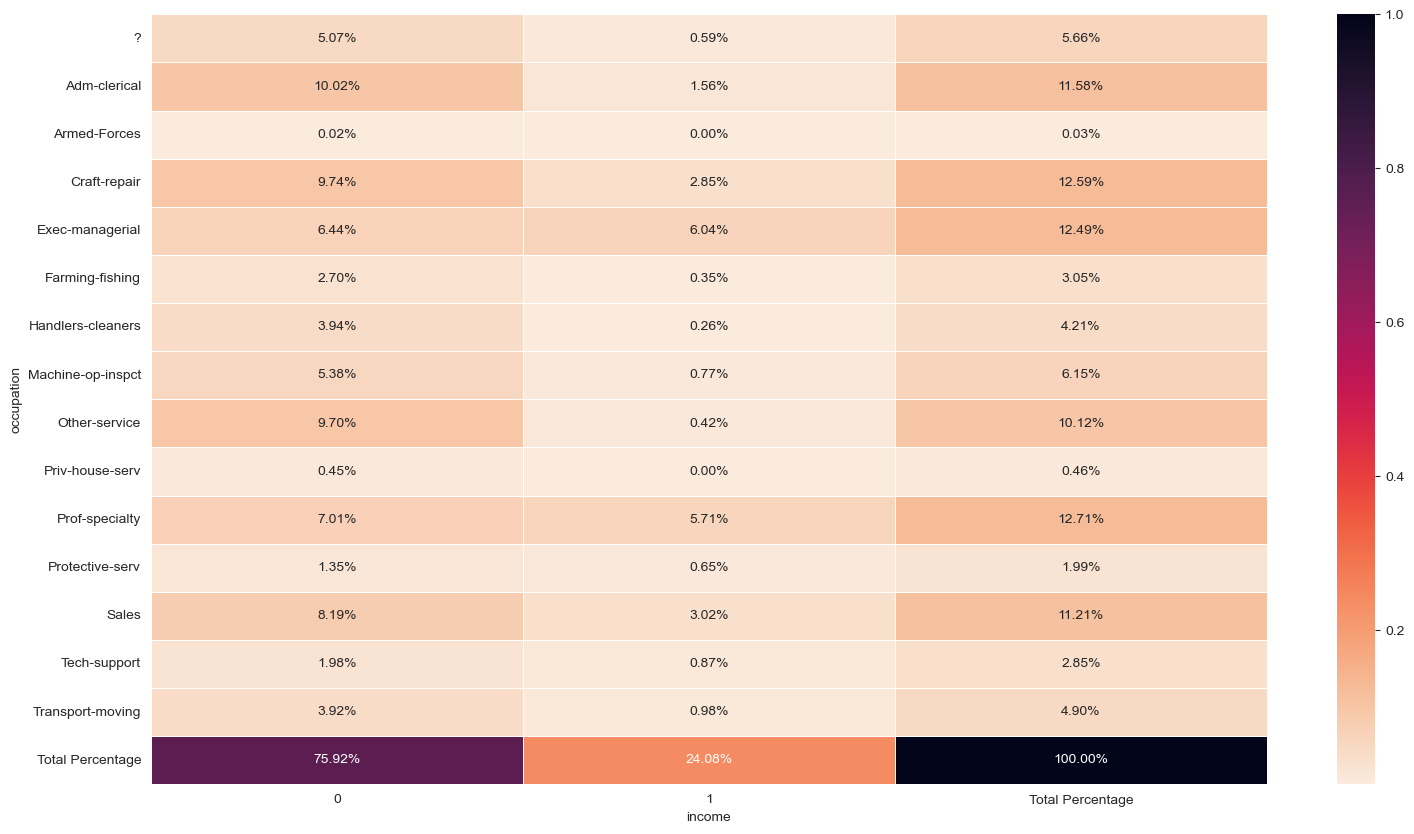



('relationship', 'race')
race              Amer-Indian-Eskimo  Asian-Pac-Islander     Black     Other  \
relationship                                                                   
Husband                     0.002825            0.012592  0.020607  0.002457   
Not-in-family               0.002488            0.006572  0.024938  0.002242   
Other-relative              0.000399            0.002518  0.005037  0.000860   
Own-child                   0.001474            0.005313  0.017045  0.001136   
Unmarried                   0.001781            0.002795  0.023617  0.001136   
Wife                        0.000584            0.002119  0.004699  0.000491   
Total Percentage            0.009551            0.031909  0.095943  0.008323   

race                 White  Total Percentage  
relationship                                  
Husband           0.366696          0.405178  
Not-in-family     0.218820          0.255060  
Other-relative    0.021314          0.030128  
Own-child        

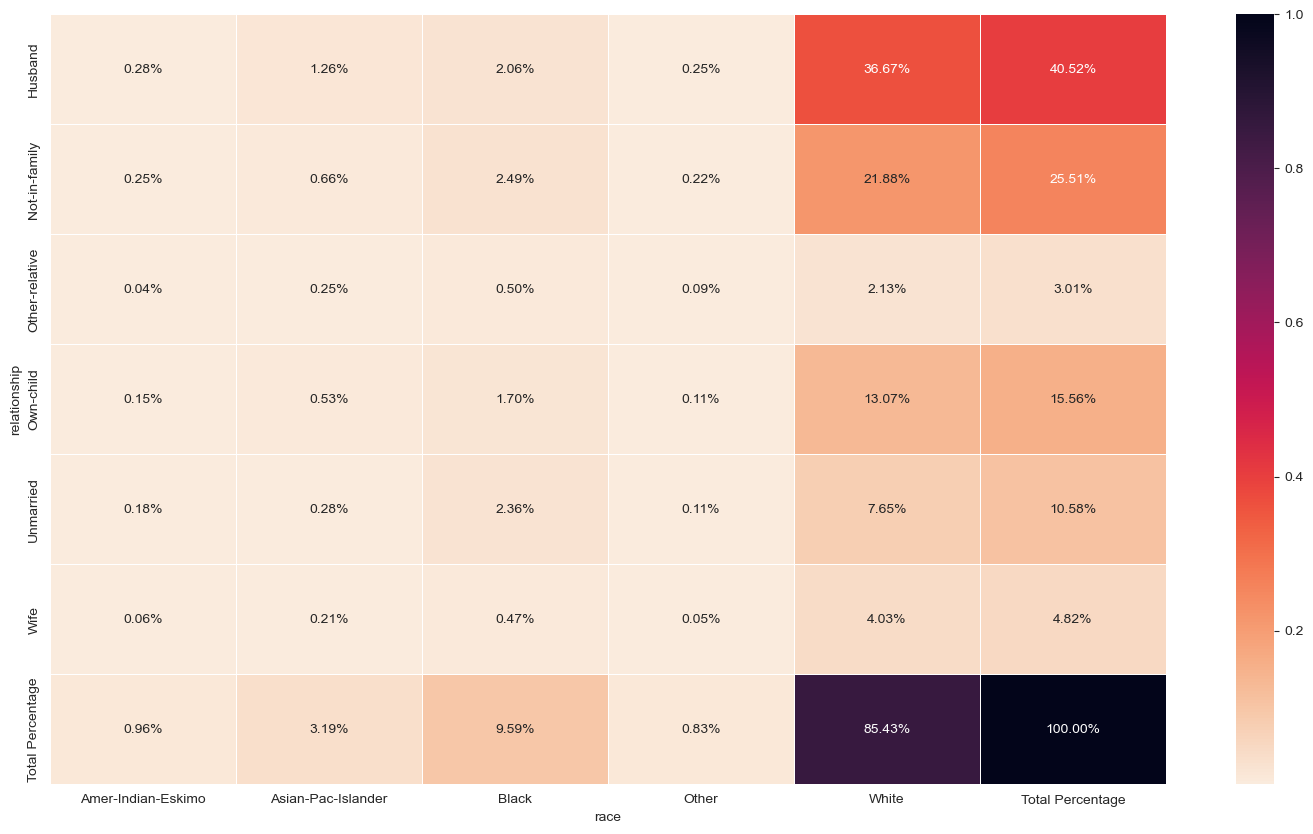



('relationship', 'sex')
sex                 Female      Male  Total Percentage
relationship                                          
Husband           0.000031  0.405147          0.405178
Not-in-family     0.119007  0.136052          0.255060
Other-relative    0.013206  0.016922          0.030128
Own-child         0.068948  0.086699          0.155646
Unmarried         0.081509  0.024324          0.105832
Wife              0.048094  0.000061          0.048156
Total Percentage  0.330795  0.669205          1.000000


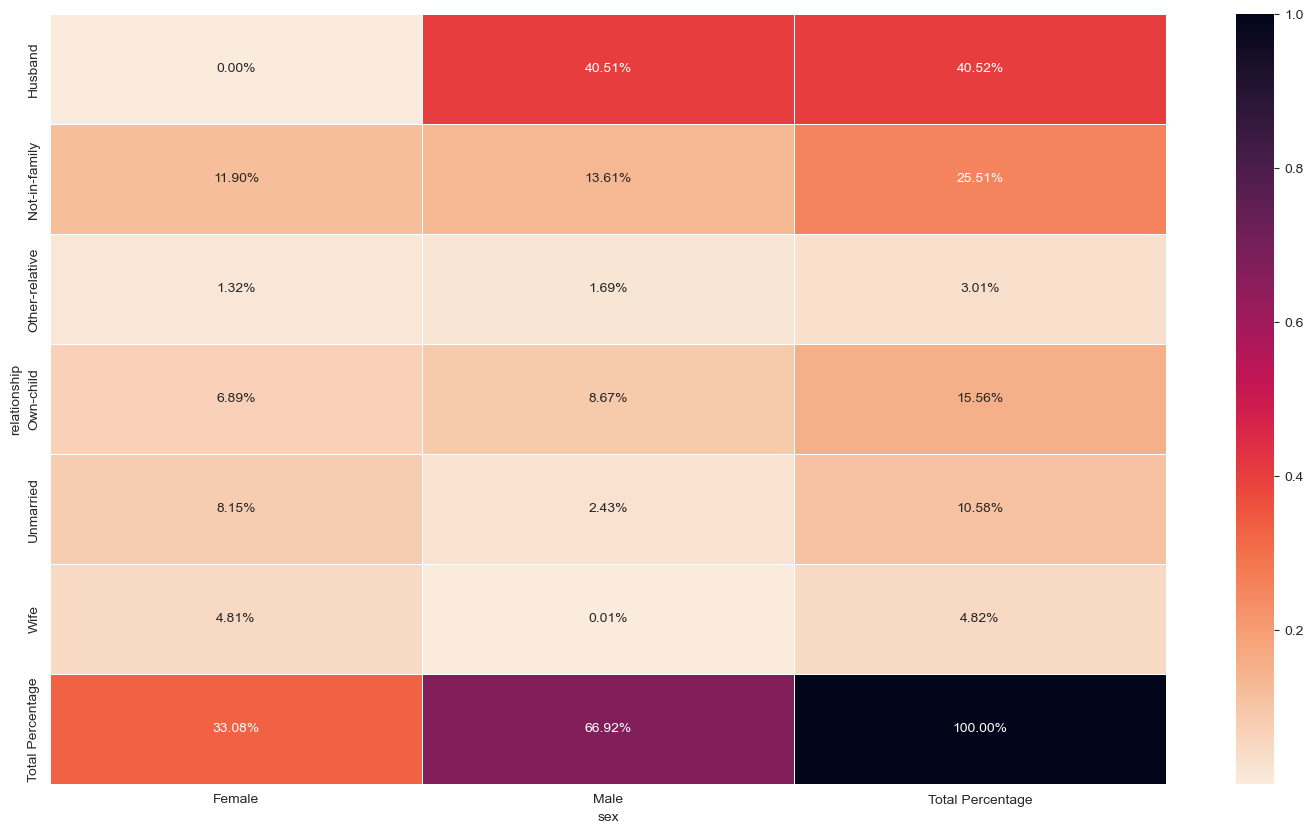



('relationship', 'native_country')
native_country           ?  Cambodia    Canada     China  Columbia      Cuba  \
relationship                                                                   
Husband           0.007555  0.000276  0.001628  0.001167  0.000491  0.001259   
Not-in-family     0.004576  0.000123  0.001136  0.000522  0.000614  0.000553   
Other-relative    0.000891  0.000092  0.000031  0.000154  0.000092  0.000154   
Own-child         0.001935  0.000031  0.000338  0.000184  0.000184  0.000369   
Unmarried         0.001904  0.000031  0.000307  0.000061  0.000399  0.000399   
Wife              0.001044  0.000031  0.000276  0.000215  0.000031  0.000184   
Total Percentage  0.017905  0.000584  0.003716  0.002303  0.001812  0.002918   

native_country    Dominican-Republic   Ecuador  El-Salvador   England  \
relationship                                                            
Husband                     0.000430  0.000338     0.000891  0.000983   
Not-in-family          

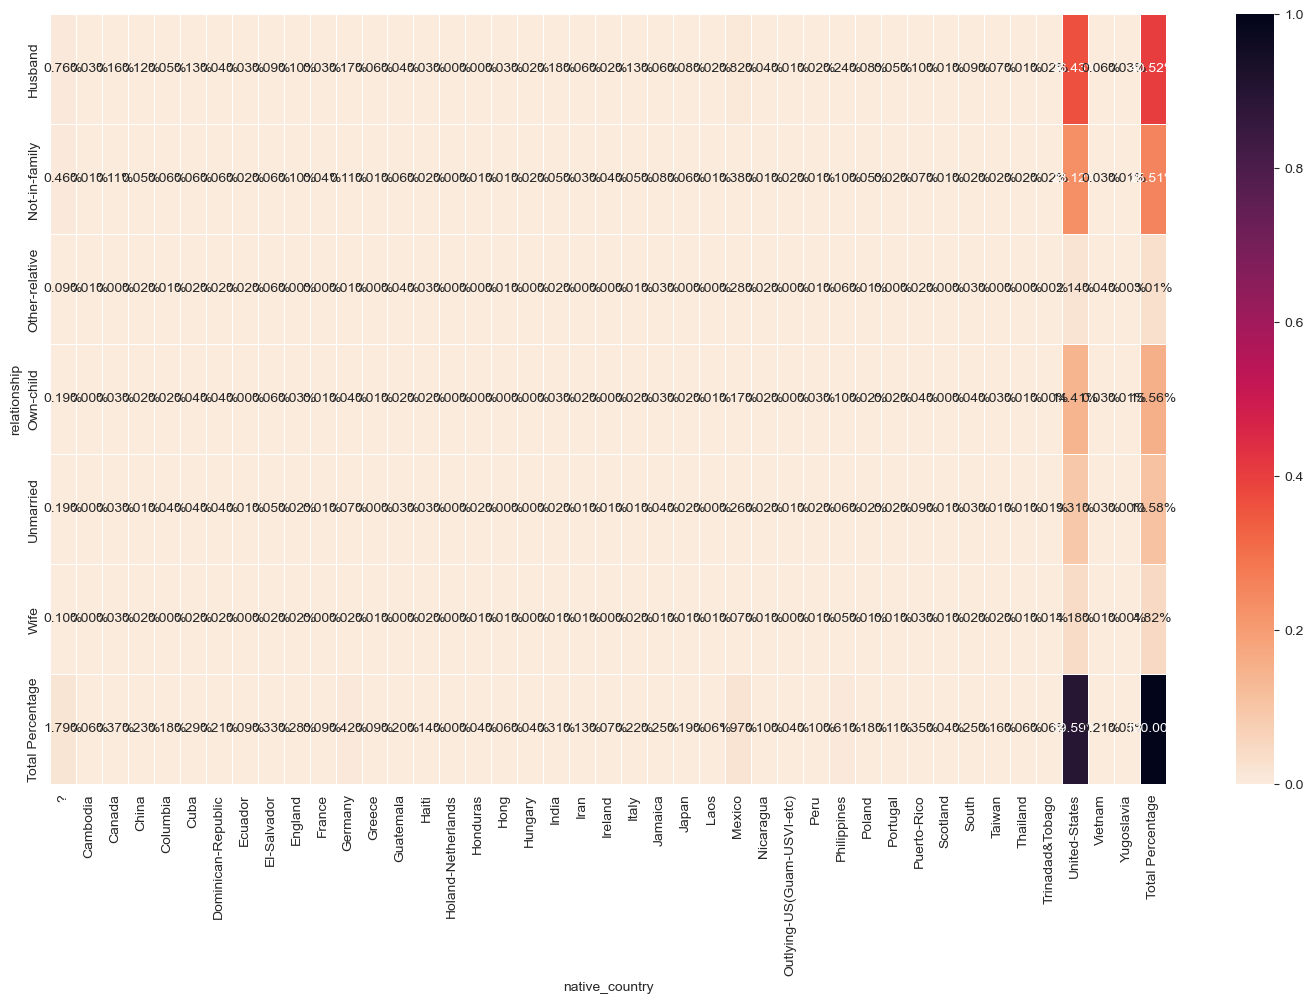



('relationship', 'income')
income                   0         1  Total Percentage
relationship                                          
Husband           0.223427  0.181751          0.405178
Not-in-family     0.228771  0.026289          0.255060
Other-relative    0.028992  0.001136          0.030128
Own-child         0.153589  0.002058          0.155646
Unmarried         0.099137  0.006695          0.105832
Wife              0.025276  0.022880          0.048156
Total Percentage  0.759190  0.240810          1.000000


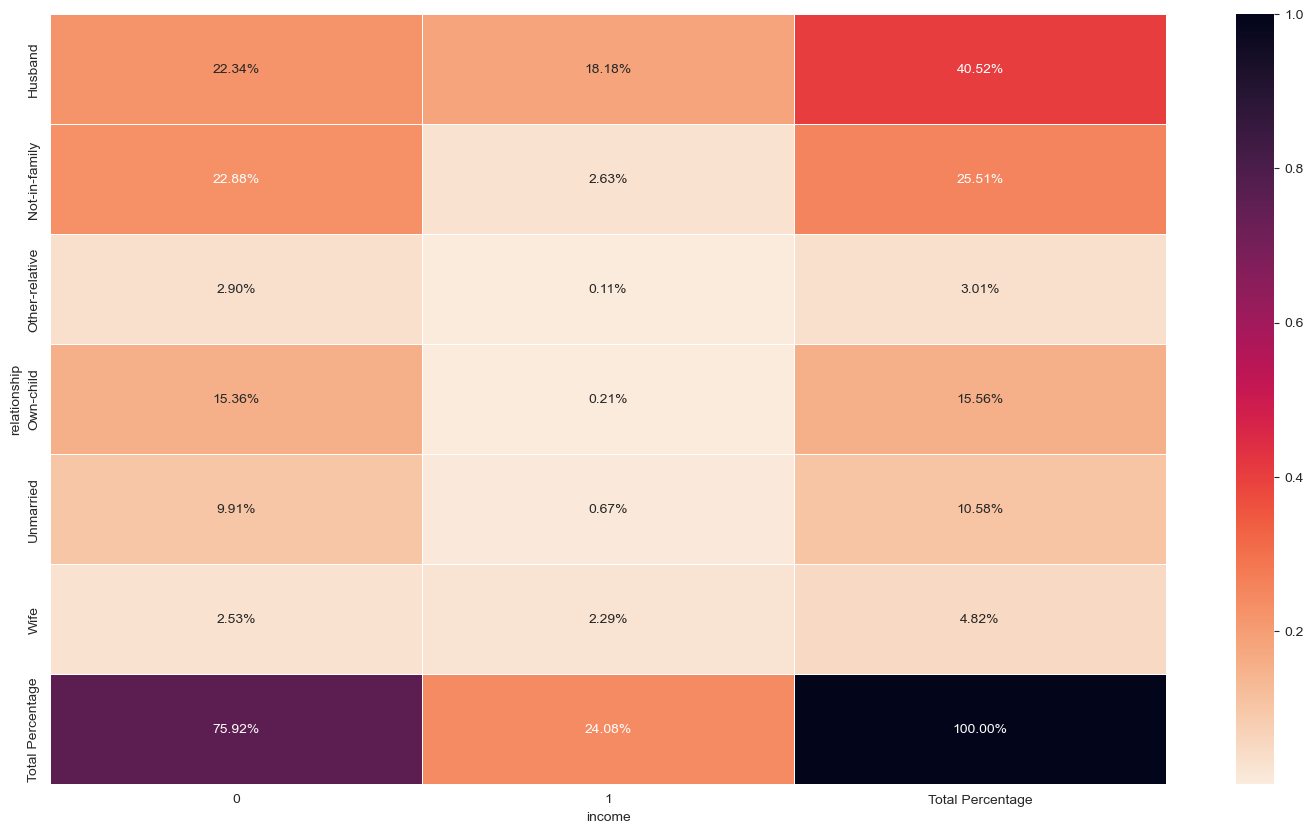



('race', 'sex')
sex                   Female      Male  Total Percentage
race                                                    
Amer-Indian-Eskimo  0.003655  0.005897          0.009551
Asian-Pac-Islander  0.010626  0.021283          0.031909
Black               0.047757  0.048186          0.095943
Other               0.003348  0.004975          0.008323
White               0.265410  0.588864          0.854274
Total Percentage    0.330795  0.669205          1.000000


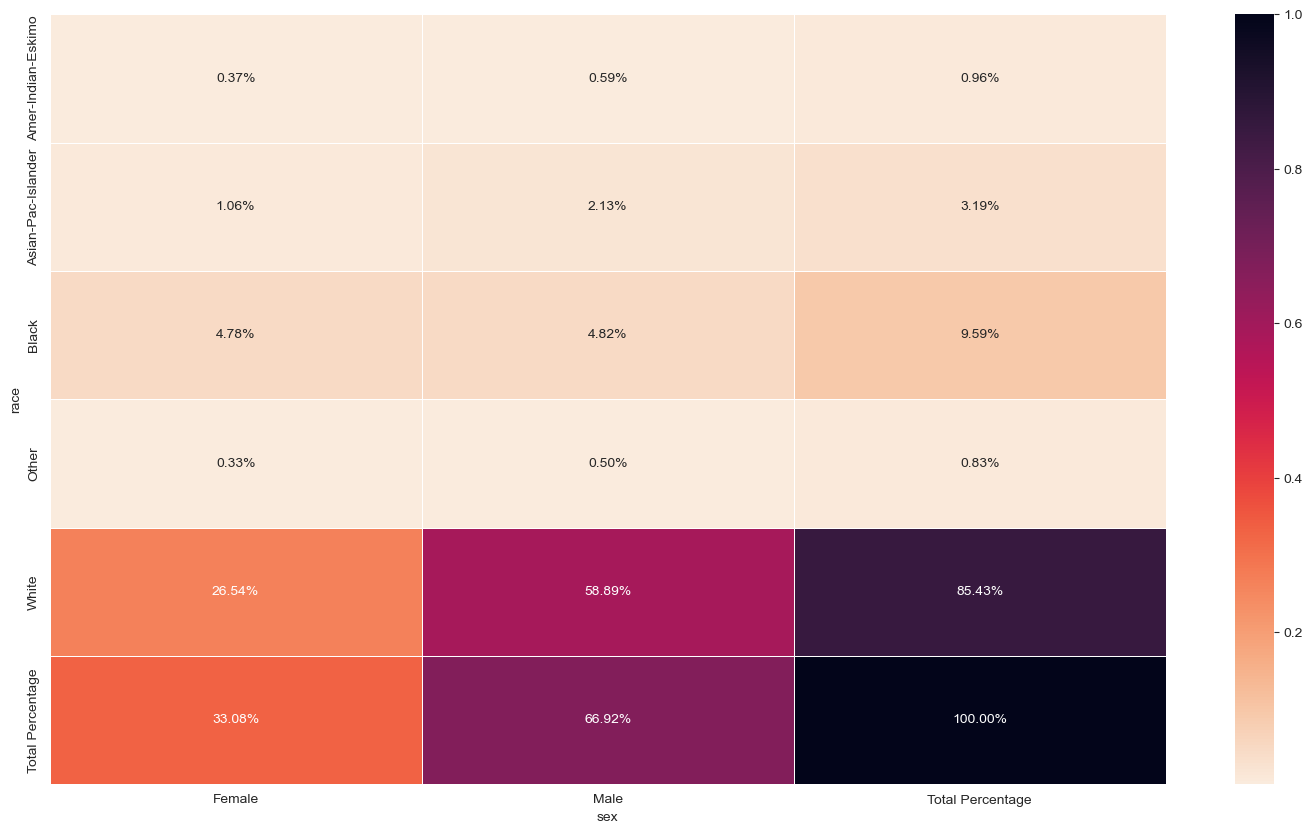



('race', 'native_country')
native_country             ?  Cambodia    Canada     China  Columbia  \
race                                                                   
Amer-Indian-Eskimo  0.000000  0.000000  0.000000  0.000000  0.000031   
Asian-Pac-Islander  0.002549  0.000553  0.000031  0.002242  0.000000   
Black               0.002948  0.000031  0.000000  0.000000  0.000000   
Other               0.000553  0.000000  0.000031  0.000000  0.000215   
White               0.011855  0.000000  0.003655  0.000061  0.001566   
Total Percentage    0.017905  0.000584  0.003716  0.002303  0.001812   

native_country          Cuba  Dominican-Republic   Ecuador  El-Salvador  \
race                                                                      
Amer-Indian-Eskimo  0.000000            0.000000  0.000000     0.000000   
Asian-Pac-Islander  0.000000            0.000031  0.000000     0.000000   
Black               0.000092            0.000369  0.000000     0.000031   
Other              

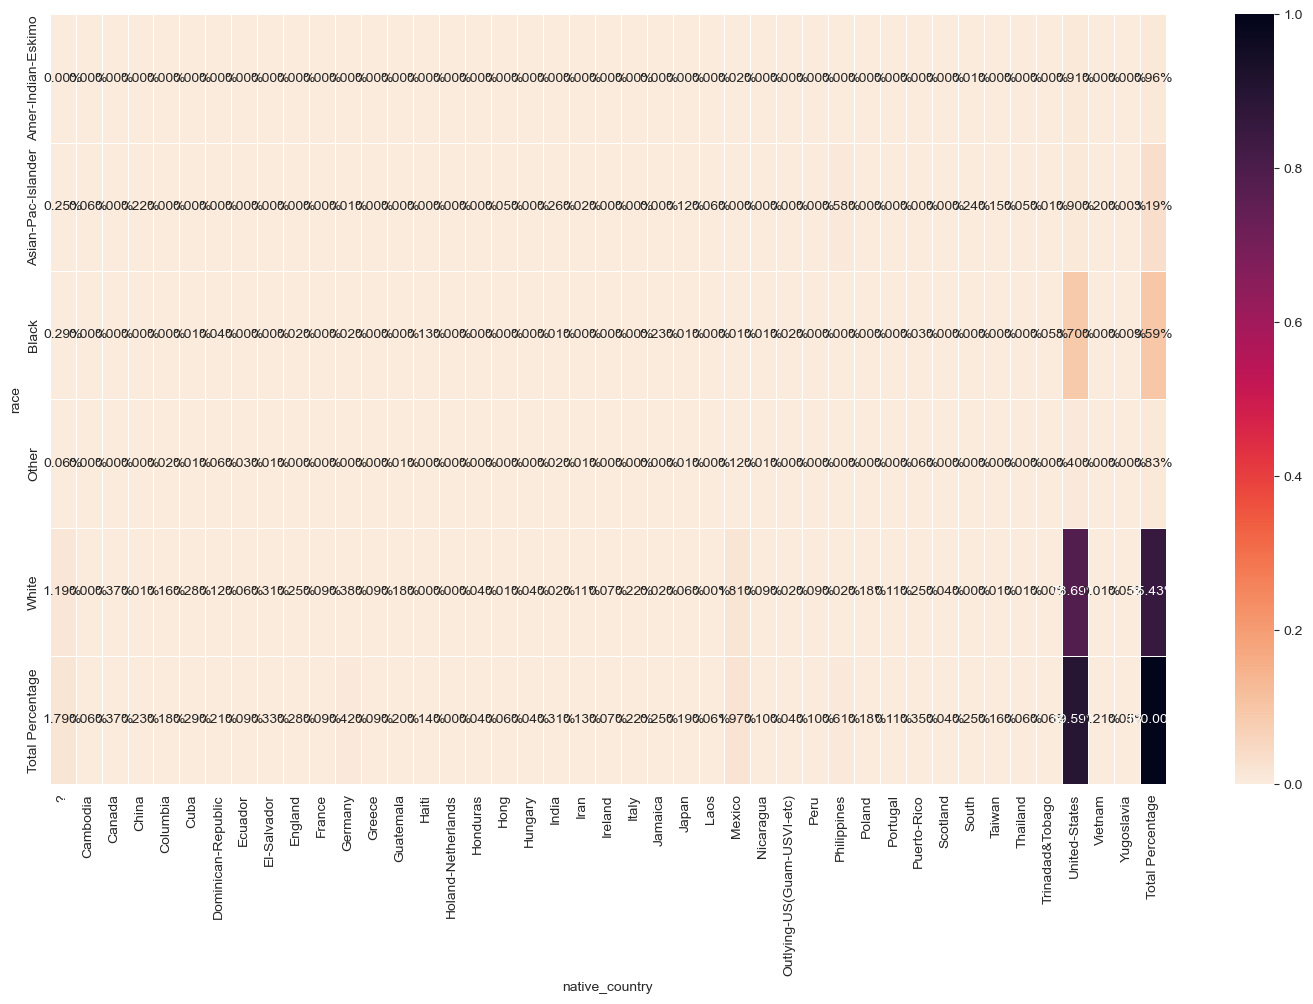



('race', 'income')
income                     0         1  Total Percentage
race                                                    
Amer-Indian-Eskimo  0.008446  0.001106          0.009551
Asian-Pac-Islander  0.023433  0.008476          0.031909
Black               0.084058  0.011885          0.095943
Other               0.007555  0.000768          0.008323
White               0.635699  0.218574          0.854274
Total Percentage    0.759190  0.240810          1.000000


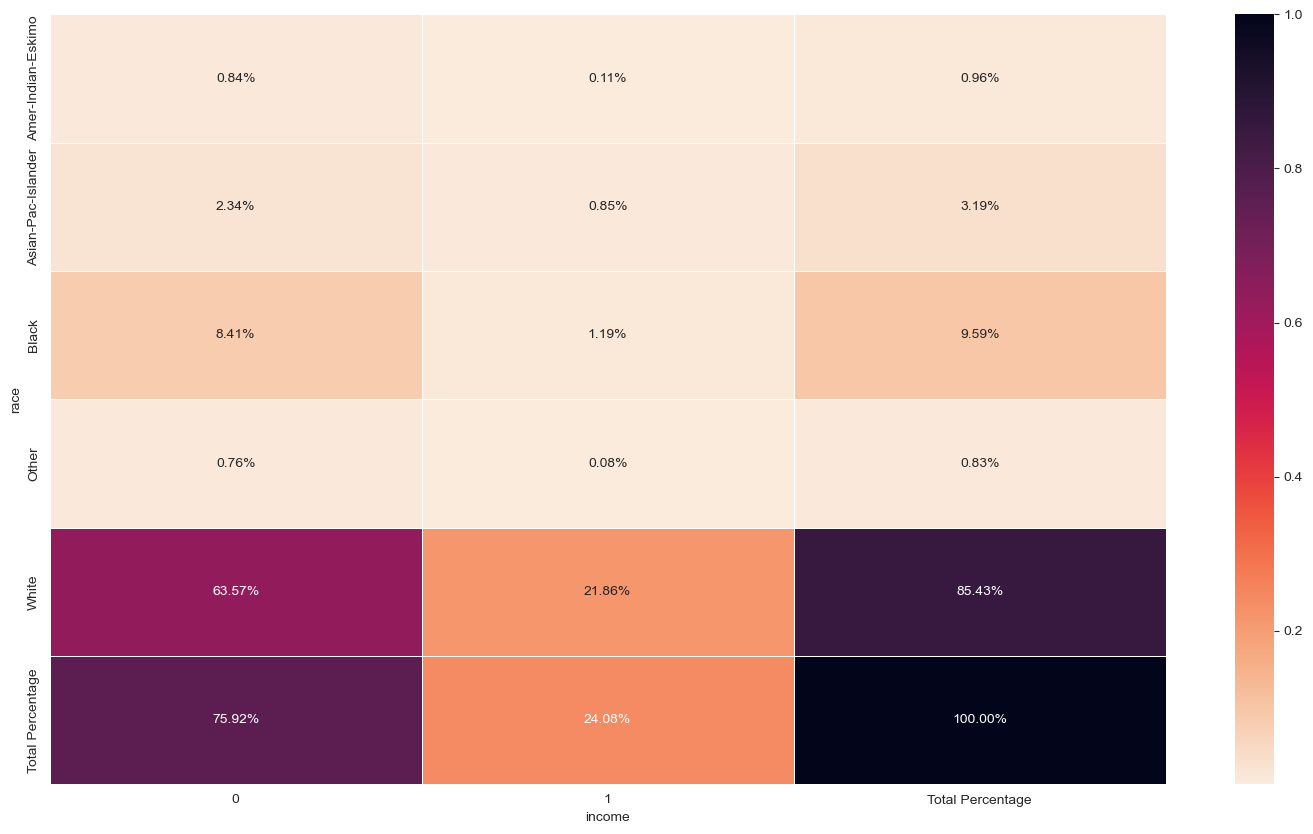



('sex', 'native_country')
native_country           ?  Cambodia    Canada     China  Columbia      Cuba  \
sex                                                                            
Female            0.005006  0.000092  0.001198  0.000645  0.000737  0.001228   
Male              0.012899  0.000491  0.002518  0.001658  0.001075  0.001689   
Total Percentage  0.017905  0.000584  0.003716  0.002303  0.001812  0.002918   

native_country    Dominican-Republic   Ecuador  El-Salvador   England  \
sex                                                                     
Female                      0.001075  0.000276     0.001075  0.000983   
Male                        0.001075  0.000584     0.002181  0.001781   
Total Percentage            0.002150  0.000860     0.003255  0.002764   

native_country      France   Germany    Greece  Guatemala     Haiti  \
sex                                                                   
Female            0.000369  0.001843  0.000154   0.000614  0.00

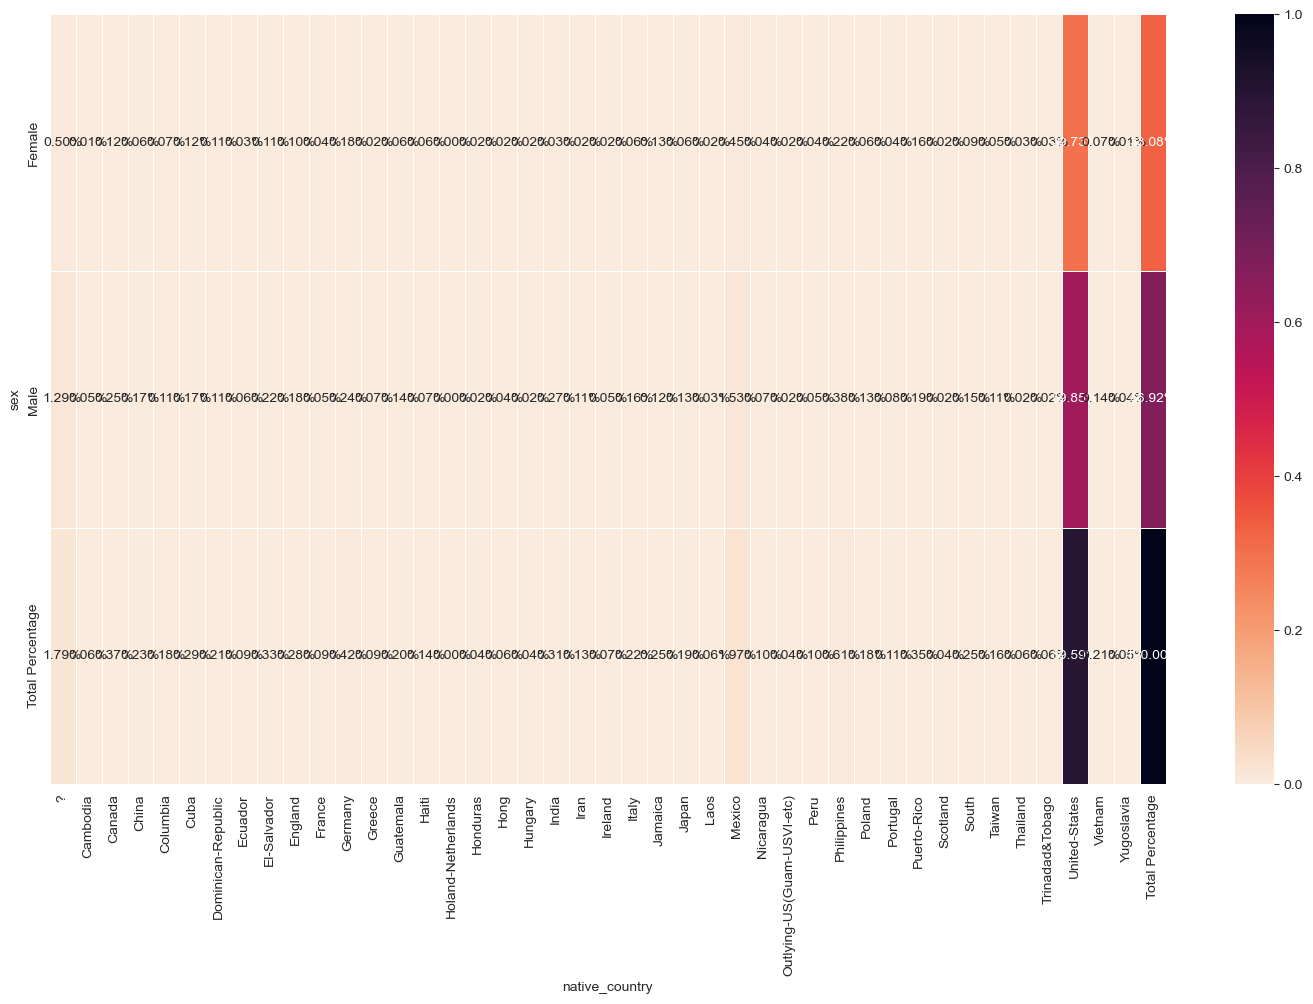



('sex', 'income')
income                   0         1  Total Percentage
sex                                                   
Female            0.294586  0.036209          0.330795
Male              0.464605  0.204601          0.669205
Total Percentage  0.759190  0.240810          1.000000


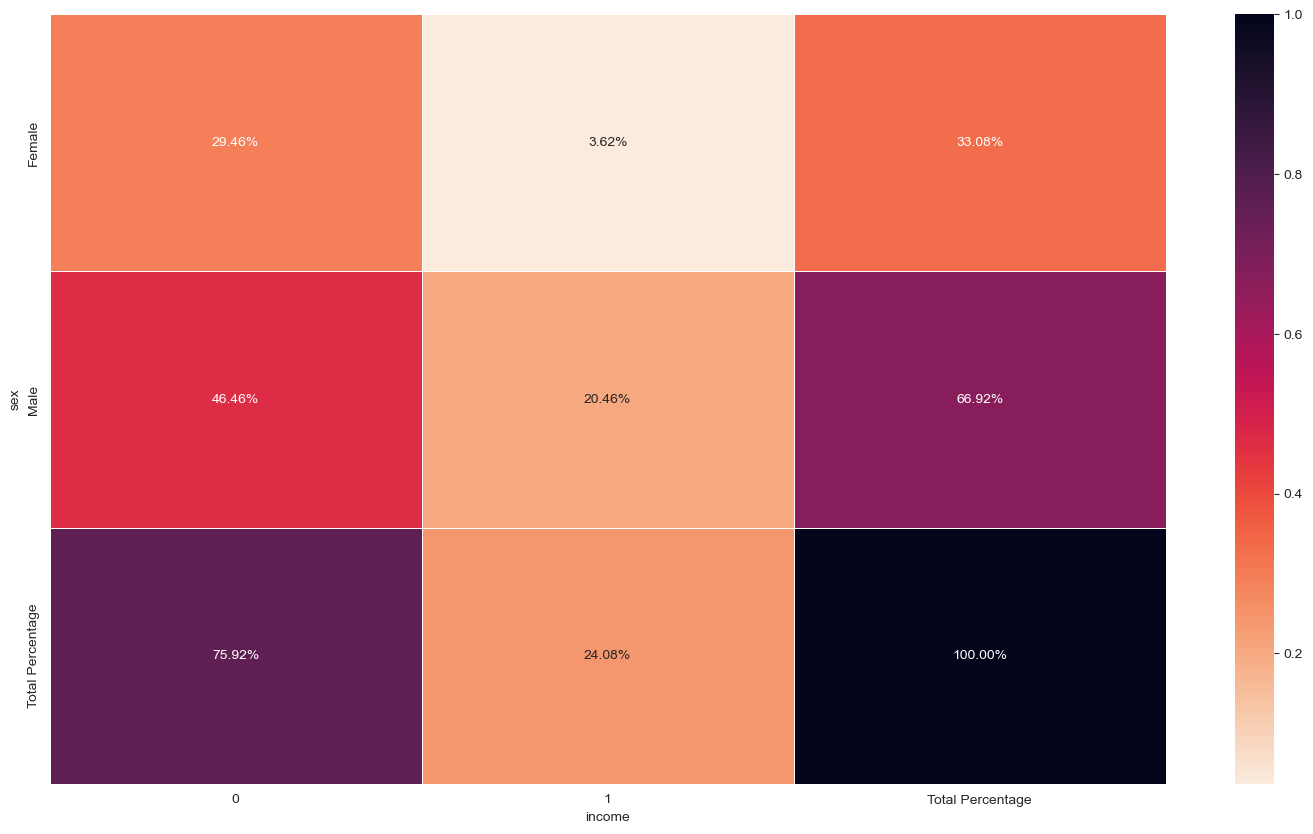



('native_country', 'income')
income                             0         1  Total Percentage
native_country                                                  
?                           0.013421  0.004484          0.017905
Cambodia                    0.000369  0.000215          0.000584
Canada                      0.002518  0.001198          0.003716
China                       0.001689  0.000614          0.002303
Columbia                    0.001751  0.000061          0.001812
Cuba                        0.002150  0.000768          0.002918
Dominican-Republic          0.002088  0.000061          0.002150
Ecuador                     0.000737  0.000123          0.000860
El-Salvador                 0.002979  0.000276          0.003255
England                     0.001843  0.000921          0.002764
France                      0.000522  0.000369          0.000891
Germany                     0.002856  0.001351          0.004207
Greece                      0.000645  0.000246          0.0

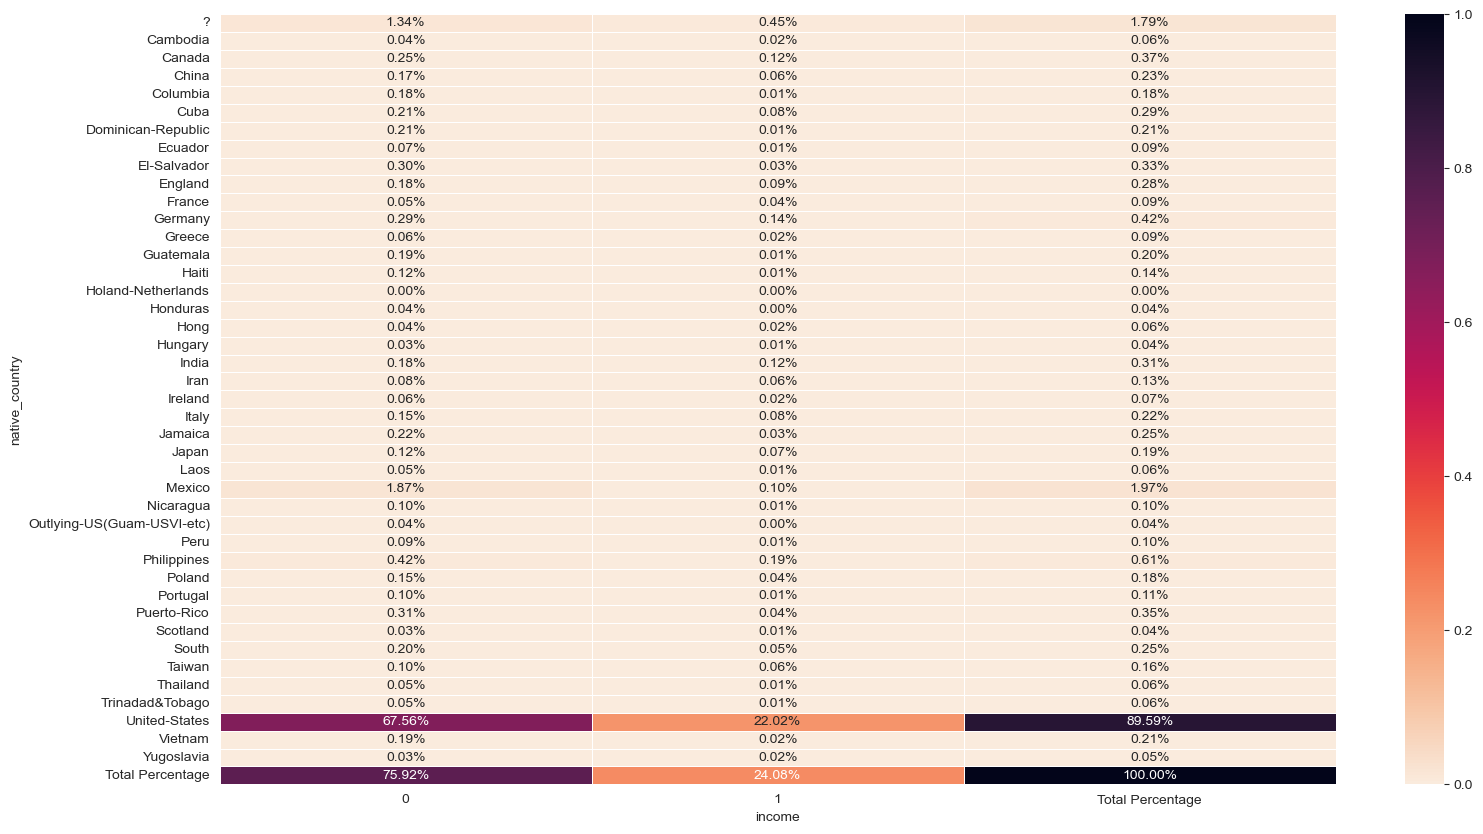

In [37]:
import itertools
categorical_vals = ["workclass", "education", "marital_status", "occupation","relationship","race","sex","native_country","income"]
combos = list(itertools.combinations(categorical_vals, 2))
#print(combos)

def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(18, 10))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.show();
    
for i in range(len(combos)):
    print(combos[i])
    cross = pd.crosstab(index=df[combos[i][0]], columns=df[combos[i][1]],margins=True,
            margins_name='Total Percentage',normalize=True)
    print(cross)
    plot_heatmap(cross, fmt='.2%')
    print('\n')
   

The heatmaps show percentage of distribution and strong relationship(darker shade)

# 5. Report on whether anomalous fields exist in this dataset, based on your EDA, which are these fields and what should be done about it.

In [38]:
# Check for any null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [39]:
#check for duplicates
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

24


age         workclass  fnlwgt     education  education_num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  367749     Bachelors             13   
22494   49  Self-emp-not-inc   43479  Some-college             10   
25872   23           Private  240137       5th-6th              3   
26313   28           Private  274679       Masters             14   
28230   27           Private  255582       HS-grad              9   
28522   42           Private  204235  Some-college             10   
28846   39           Private   30916       HS-grad              9   
29157   38           Private  207202       HS-grad              9   
30845   46           Private  133616  Some-college             10   
31993   19           Private  251579  Some-college             10   
32404   35           Private  379959       HS-grad              9   

           marital_status         occupation   relationship  \
4881        Never-married       Craft-repair  Not-in-family   
5104        Never-married      Other-service  Not-in-family   
9171        Never-married     Prof-specialty      Own-child   
11631       Never-married       Tech-support  Not-in-family   
13084       Never-married    Priv-house-serv  Not-in-family   
15059       Never-married    Farming-fishing  Not-in-family   
17040  Married-civ-spouse       Craft-repair        Husband   
18555       Never-married      Other-service  Not-in-family   
18698       Never-married    Farming-fishing  Not-in-family   
21318       Never-married       Adm-clerical      Own-child   
21490       Never-married    Exec-managerial      Own-child   
21875  Married-civ-spouse       Craft-repair        Husband   
22300       Never-married    Priv-house-serv  Not-in-family   
22367       Never-married     Prof-specialty  Not-in-family   
22494  Married-civ-spouse       Craft-repair        Husband   
25872       Never-married  Handlers-cleaners  Not-in-family   
26313       Never-married     Prof-specialty  Not-in-family   
28230       Never-married  Machine-op-inspct  Not-in-family   
28522  Married-civ-spouse     Prof-specialty        Husband   
28846  Married-civ-spouse       Craft-repair        Husband   
29157  Married-civ-spouse  Machine-op-inspct        Husband   
30845            Divorced       Adm-clerical      Unmarried   
31993       Never-married      Other-service      Own-child   
32404            Divorced      Other-service  Not-in-family   

                     race     sex  capital_gain  capital_loss  hours_per_week  \
4881                White    Male             0             0              40   
5104   Asian-Pac-Islander    Male             0             0              35   
9171                White  Female             0             0              10   
11631               White  Female             0             0              10   
13084               White  Female             0             0              40   
15059               White    Male             0             0              50   
17040               White    Male             0             0              40   
18555               Black    Male             0          

In [40]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [41]:
#check for duplicates again
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income]
Index: []

In [42]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [43]:
#strip varibles of object type for any whitespaces
df_trimmed = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#replace ? with nan
df_trimmed['workclass'] = df_trimmed['workclass'].map(lambda x: np.nan if x=="?"  else x)
df_trimmed['education'] = df_trimmed['education'].map(lambda x: np.nan if x=="?"  else x)
df_trimmed['marital_status'] = df_trimmed['marital_status'].map(lambda x: np.nan if x=="?"  else x)
df_trimmed['occupation'] = df_trimmed['occupation'].map(lambda x: np.nan if x=="?"  else x)
df_trimmed['relationship'] = df_trimmed['relationship'].map(lambda x: np.nan if x=="?"  else x)
df_trimmed['race'] = df_trimmed['race'].map(lambda x: np.nan if x=="?"  else x)
df_trimmed['sex'] = df_trimmed['sex'].map(lambda x: np.nan if x=="?"  else x)
df_trimmed['native_country'] = df_trimmed['native_country'].map(lambda x: np.nan if x=="?"  else x)
df_trimmed['income'] = df_trimmed['income'].map(lambda x: np.nan if x=="?"  else x)

print(df_trimmed.isnull().sum())
print(df_trimmed.shape)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64
(32537, 15)


There are 3 categorical fields with null values - workclass, occupation, native-country, Since those nominal categorical values with null values are not significant for the given large data set, lets drop them.

In [44]:
#Since those categorical values with null values are not significant, drop them 
df_new = df_trimmed.dropna()
print(df_new.isnull().sum())
print(df_new.shape)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
(30139, 15)


Resulting number of rows -30139

In [45]:
#Check if every categorical field fall within its accepted set of unique values
print(df_new['workclass'].describe())
df_new[~(df_new["workclass"].isin(["Private","Self-emp-not-inc","Self-emp-inc","Federal-gov","Local-gov","State-gov","Without-pay","Never-worked"]))].count()

count       30139
unique          7
top       Private
freq        22264
Name: workclass, dtype: object


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [46]:
#Check if every categorical field fall within its accepted set of unique values
print(df_new['education'].describe())
df_new[~(df_new["education"].isin(["Bachelors", "Some-college", "11th", "HS-grad", "Prof-school", "Assoc-acdm", "Assoc-voc", "9th", "7th-8th", "12th", "Masters", "1st-4th", "10th", "Doctorate", "5th-6th", "Preschool"]))].count()

count       30139
unique         16
top       HS-grad
freq         9834
Name: education, dtype: object


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [47]:
#Check if every categorical field fall within its accepted set of unique values
print(df_new['marital_status'].describe())
df_new[~(df_new["marital_status"].isin(["Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed", "Married-spouse-absent", "Married-AF-spouse"]))].count()

count                  30139
unique                     7
top       Married-civ-spouse
freq                   14059
Name: marital_status, dtype: object


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [48]:
#Check if every categorical field fall within its accepted set of unique values
print(df_new['occupation'].describe())
df_new[~(df_new["occupation"].isin(["Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"]))].count()

count              30139
unique                14
top       Prof-specialty
freq                4034
Name: occupation, dtype: object


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [49]:
#Check if every categorical field fall within its accepted set of unique values
print(df_new['relationship'].describe())
df_new[~(df_new["relationship"].isin(["Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"]))].count()

count       30139
unique          6
top       Husband
freq        12457
Name: relationship, dtype: object


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [50]:
#Check if every categorical field fall within its accepted set of unique values
print(df_new['race'].describe())
df_new[~(df_new["race"].isin(["White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"]))].count()

count     30139
unique        5
top       White
freq      25912
Name: race, dtype: object


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [51]:
print(df_new['sex'].describe())
df_new[~(df_new["sex"].isin(["Male","Female"]))].count()

count     30139
unique        2
top        Male
freq      20366
Name: sex, dtype: object


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [52]:
print(df_new['native_country'].describe())
df_new[~(df_new["native_country"].isin(["United-States", "Cambodia", "England", "Puerto-Rico", "Canada", "Germany", "Outlying-US(Guam-USVI-etc)", "India", "Japan", "Greece", "South", "China", "Cuba", "Iran", "Honduras", "Philippines", "Italy", "Poland", "Jamaica", "Vietnam", "Mexico", "Portugal", "Ireland", "France", "Dominican-Republic", "Laos", "Ecuador", "Taiwan", "Haiti", "Columbia", "Hungary", "Guatemala", "Nicaragua", "Scotland", "Thailand", "Yugoslavia", "El-Salvador", "Trinadad&Tobago", "Peru", "Hong", "Holand-Netherlands"]))].count()

count             30139
unique               41
top       United-States
freq              27487
Name: native_country, dtype: object


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [53]:
print(df_new['income'].describe())
df_new[~(df_new["income"].isin(["0", "1"]))].count()

count    30139.000000
mean         0.249046
std          0.432468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64


age               30139
workclass         30139
fnlwgt            30139
education         30139
education_num     30139
marital_status    30139
occupation        30139
relationship      30139
race              30139
sex               30139
capital_gain      30139
capital_loss      30139
hours_per_week    30139
native_country    30139
income            30139
dtype: int64

# Check for Outliers if any

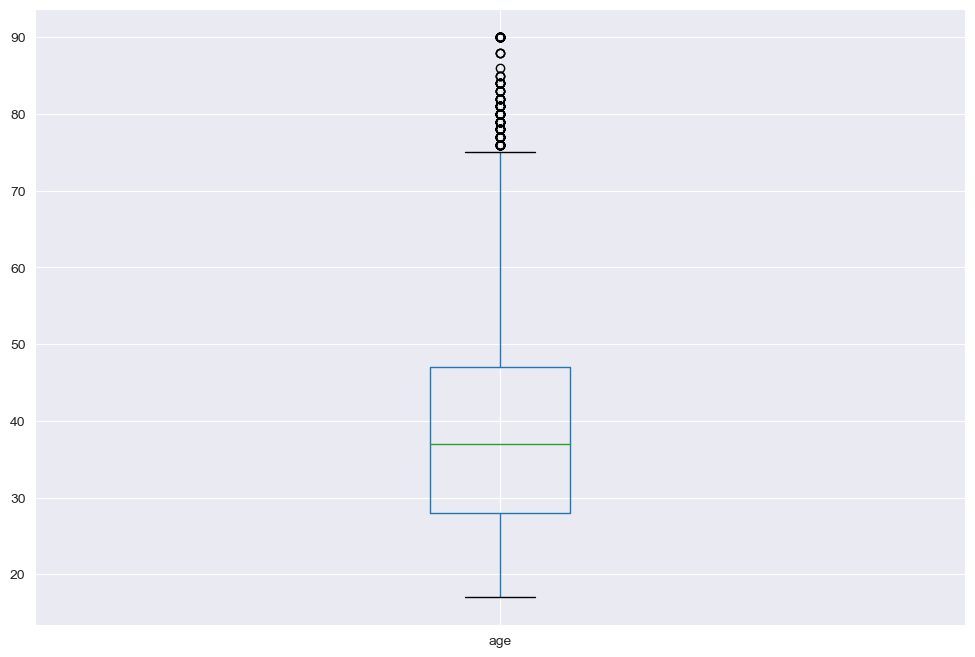

In [54]:
df_new.boxplot(column=['age'])
plt.show()

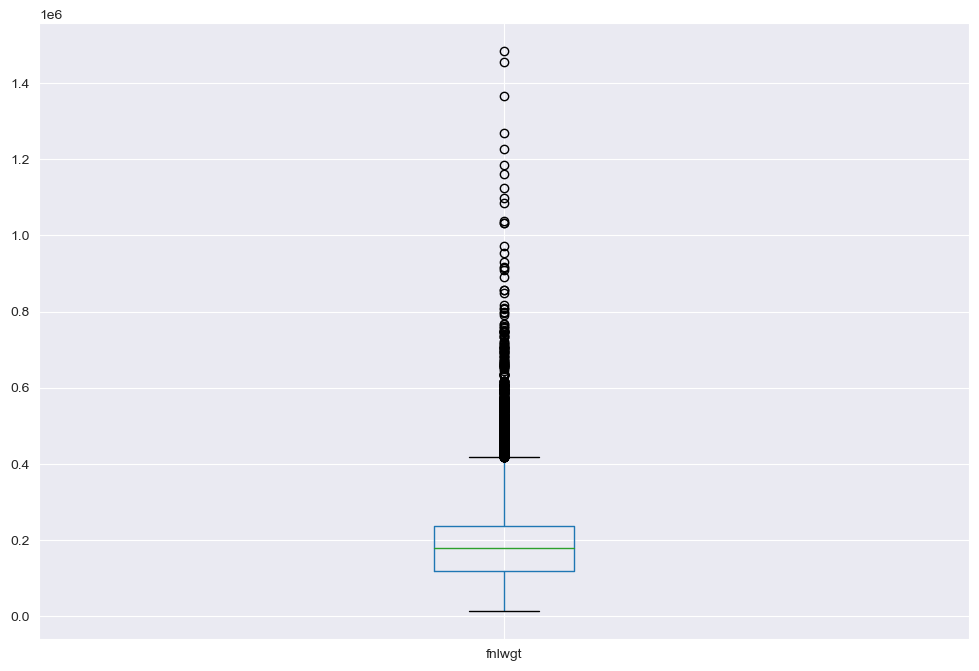

In [55]:
df_new.boxplot(column=['fnlwgt'])
plt.show()

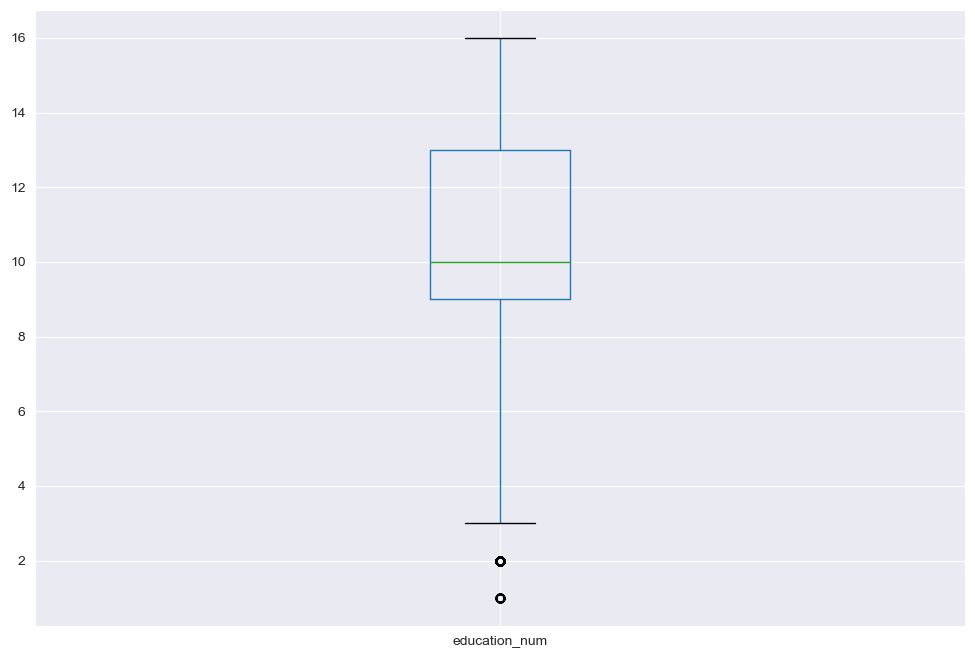

In [56]:
df_new.boxplot(column=['education_num'])
plt.show()

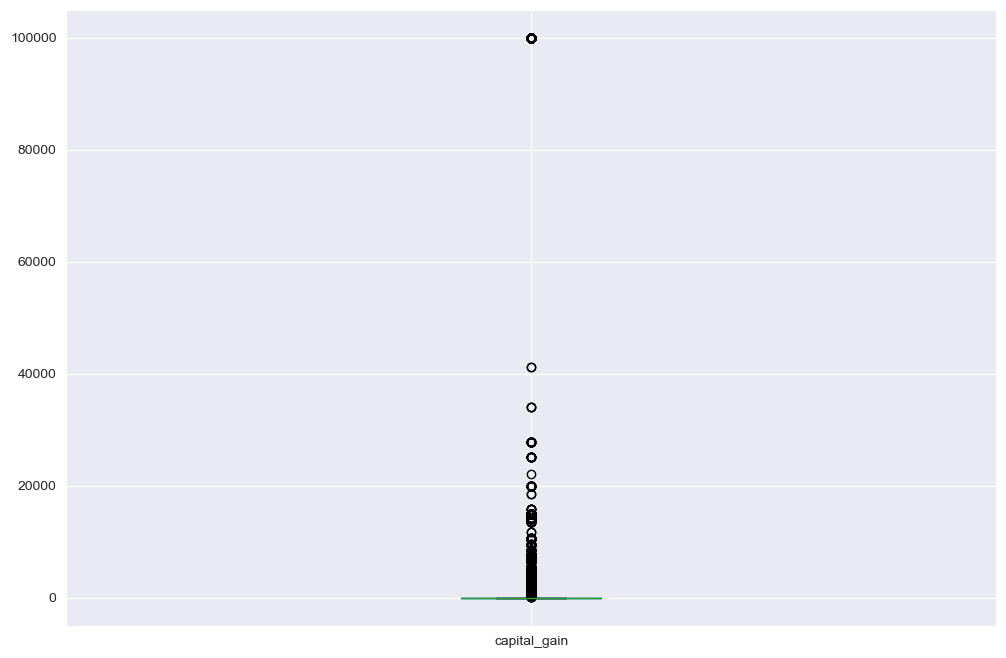

In [57]:
df_new.boxplot(column=['capital_gain'])
plt.show()

In [58]:
#check number of rows with outliers
df_check = df_new[df_new.capital_gain >= 80000]
df_check.shape
#lets not remove resulting in 148 rows

(148, 15)

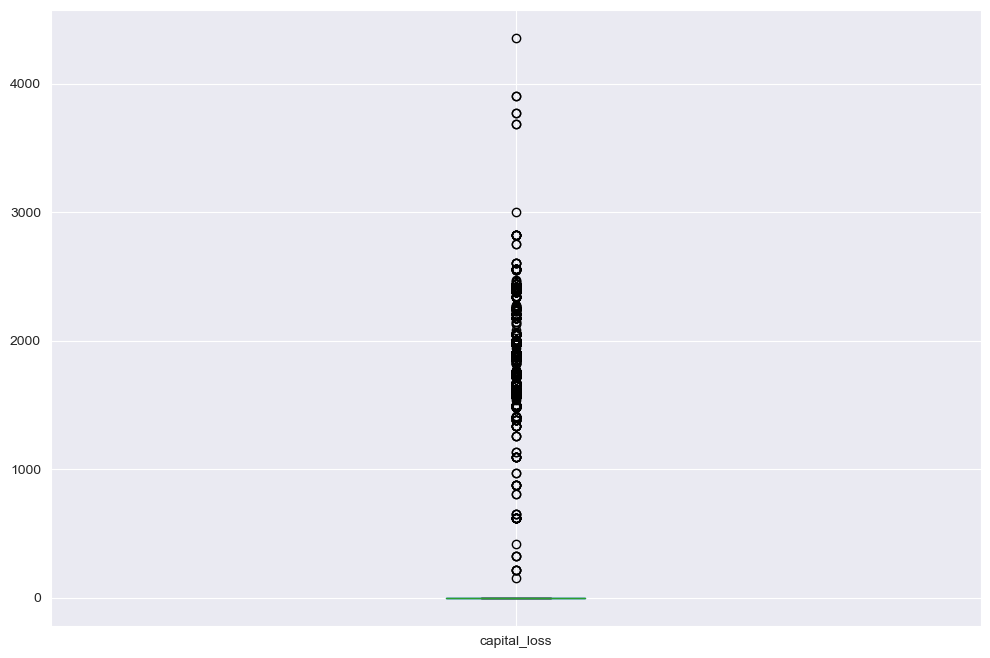

In [59]:
df_new.boxplot(column=['capital_loss'])
plt.show()

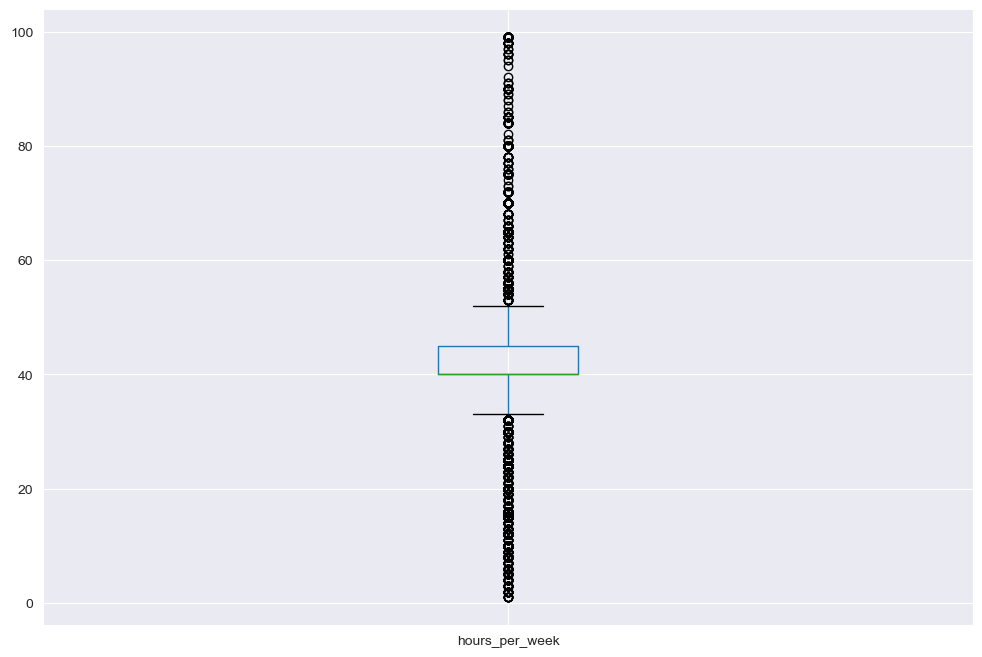

In [60]:
df_new.boxplot(column=['hours_per_week'])
plt.show()

# 6. Report the mean, median, minimum, maximum and standard deviation of each of the numeric variables.

In [61]:
df_new.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  30139.000000  3.013900e+04   30139.000000  30139.000000  30139.000000   
mean      38.441720  1.897950e+05      10.122532   1092.841202     88.439928   
std       13.131426  1.056586e+05       2.548738   7409.110596    404.445239   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176275e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784170e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376045e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week        income  
count    30139.000000  30139.000000  
mean        40.934703      0.249046  
std         11.978753      0.432468  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         45.000000      0.000000  
max         99.000000      1.000000

# 7. Construct a histogram of each numerical variables, with an overlay of the target variable income. 
a.	Discuss the relationship, if any, each of these variables has with the target variable.
b.	Which variables would you expect to make a significant appearance in any data mining classification model?


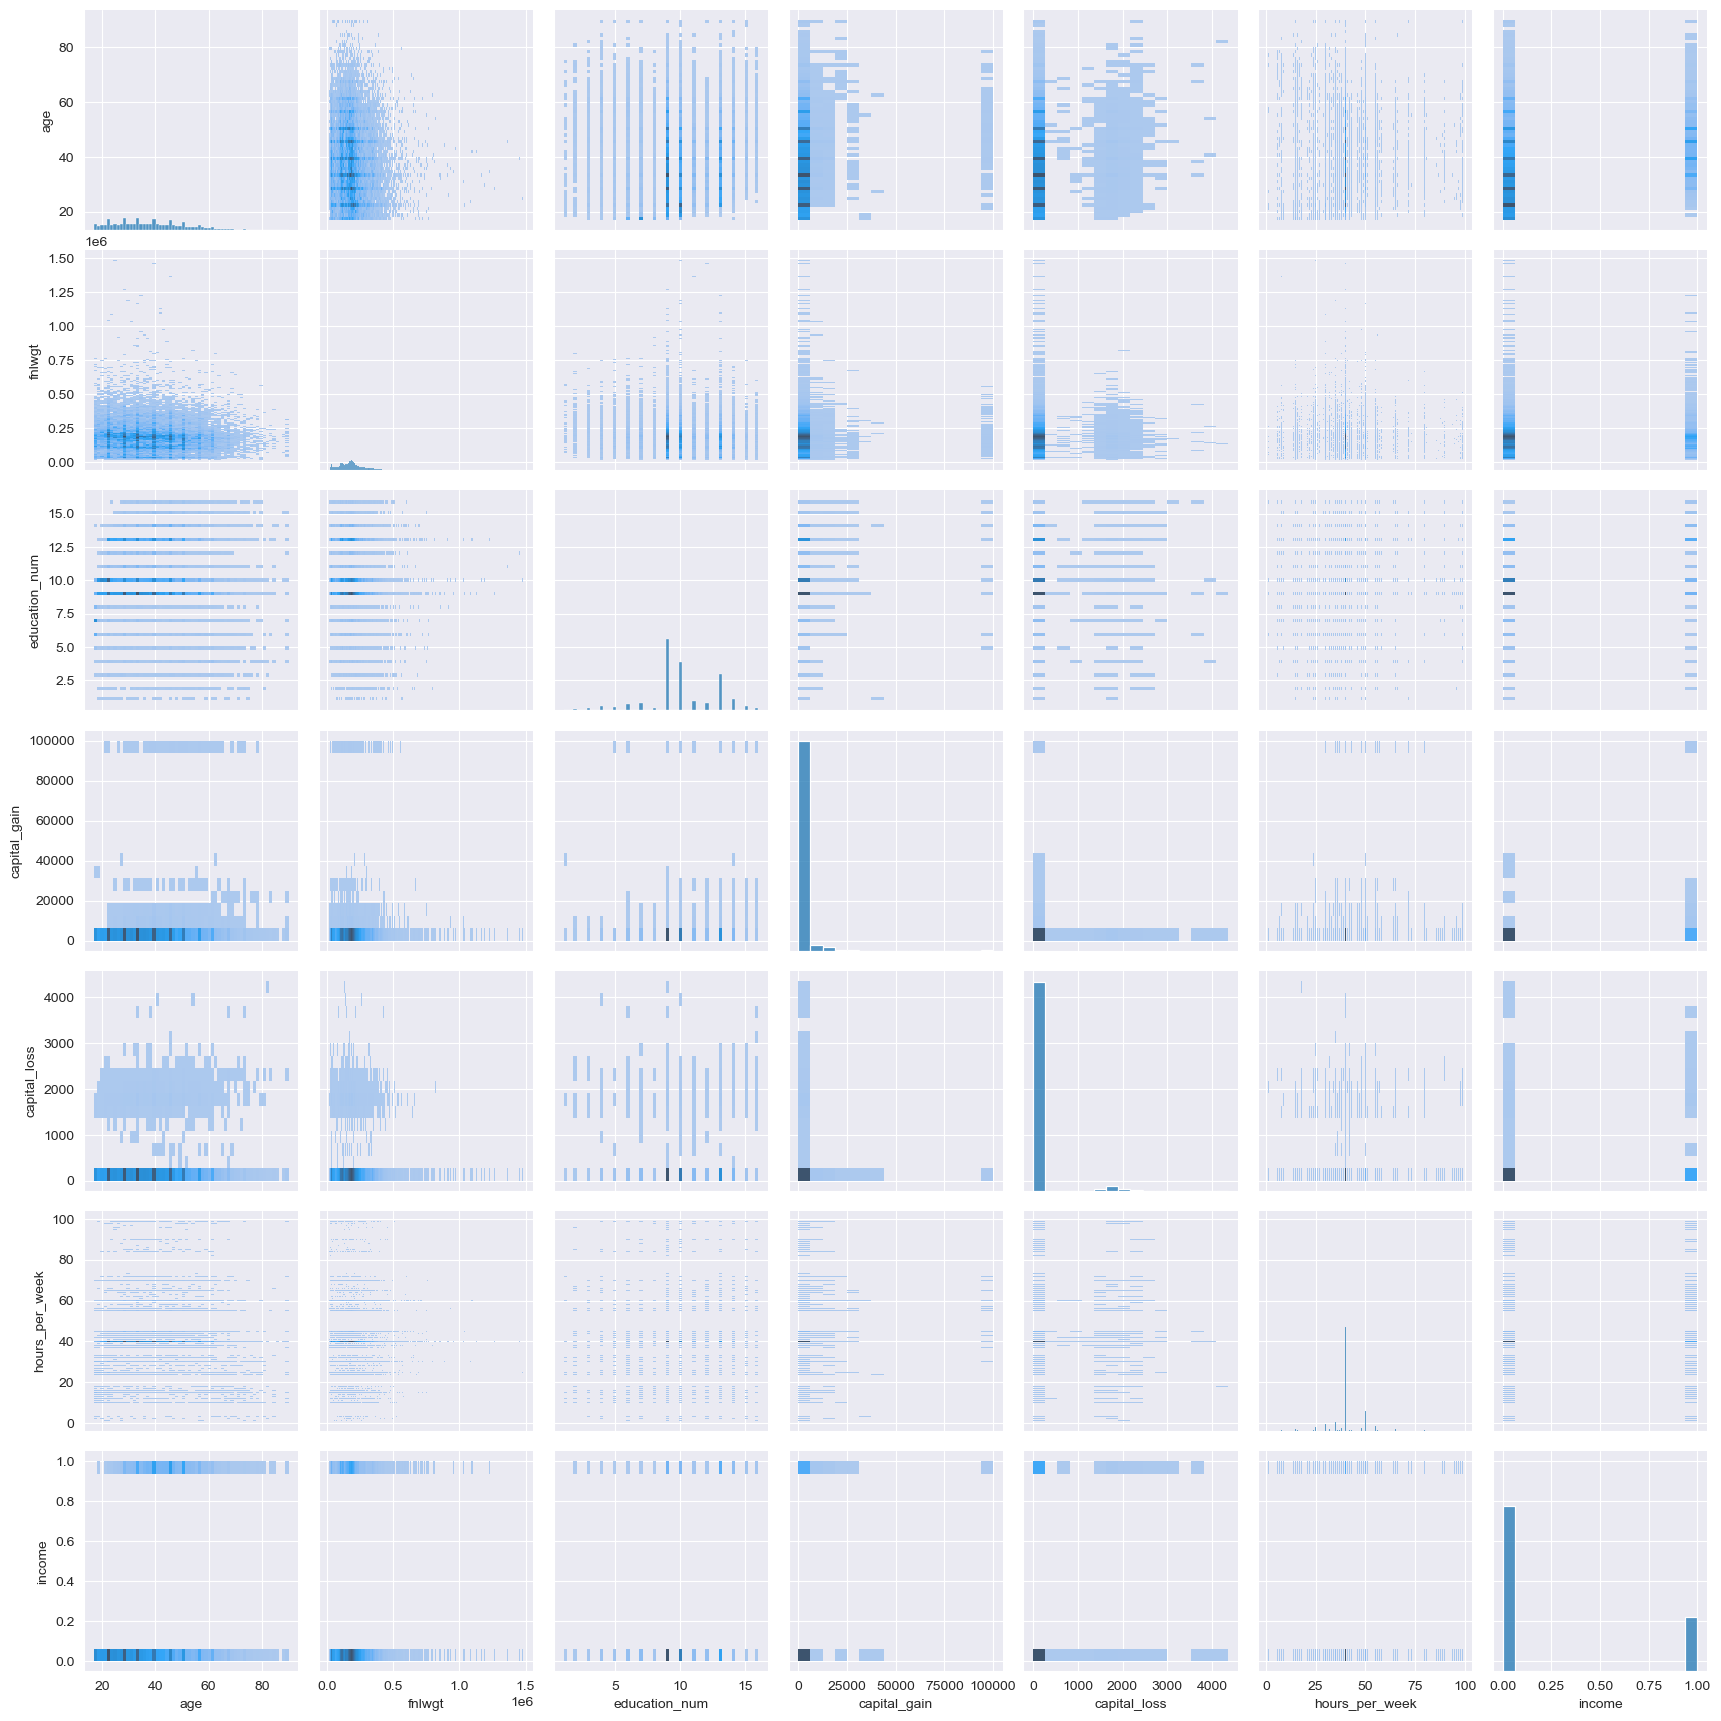

In [62]:
sns.pairplot(df_new, kind="hist")

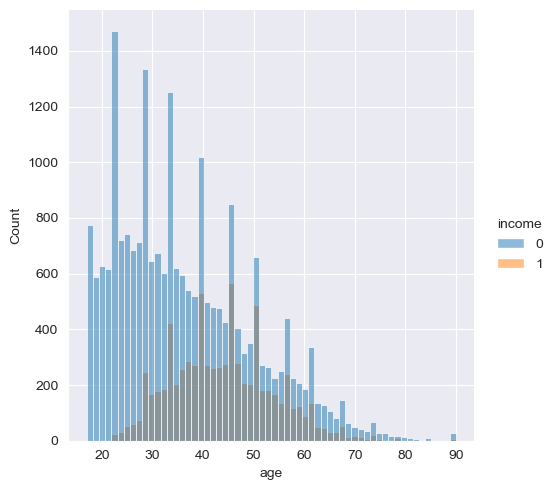

In [63]:
sns.displot(df_new, x="age", hue="income")

people 35-45 seems to be making income >50k. Income reduces with increase in age

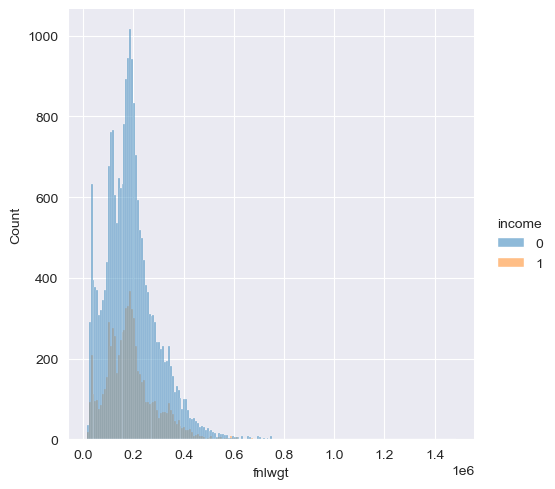

In [64]:
sns.displot(df_new, x="fnlwgt", hue="income")

both <=50k income holders and >50k plots seems similar. i.e., some percentage of people for every fnlwgt has income >=50k.

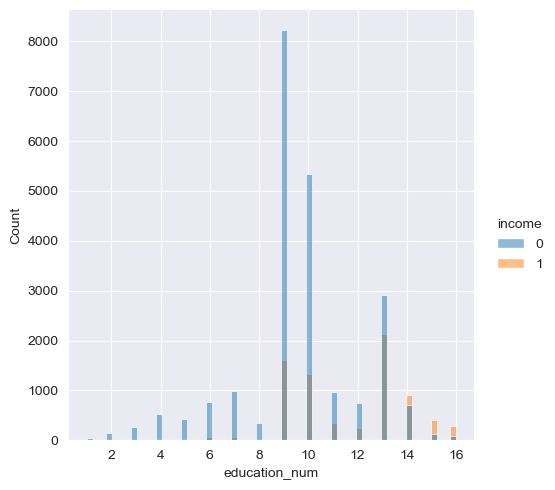

In [65]:
sns.displot(df_new, x="education_num", hue="income")

those education_num below 8 does not seem to have income >=50k. While income increases with increasing education_num. There is a strong linear relation between education_num and income.

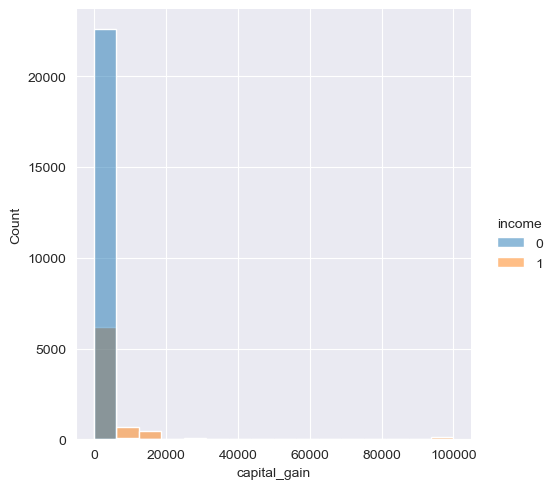

In [66]:
sns.displot(df_new, x="capital_gain", hue="income")

There are many people with capital_gain 0 among which around 20% have income >50k. With increasing capital gain, people with income >=50k increases.

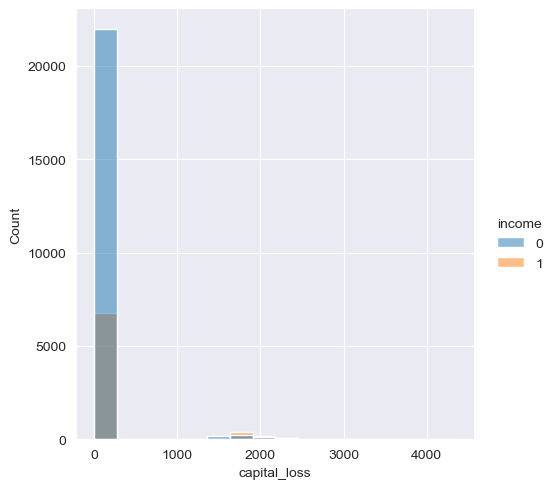

In [67]:
sns.displot(df_new, x="capital_loss", hue="income")

There are many people with capital_loss 0 among which around 20% have income >50k. 

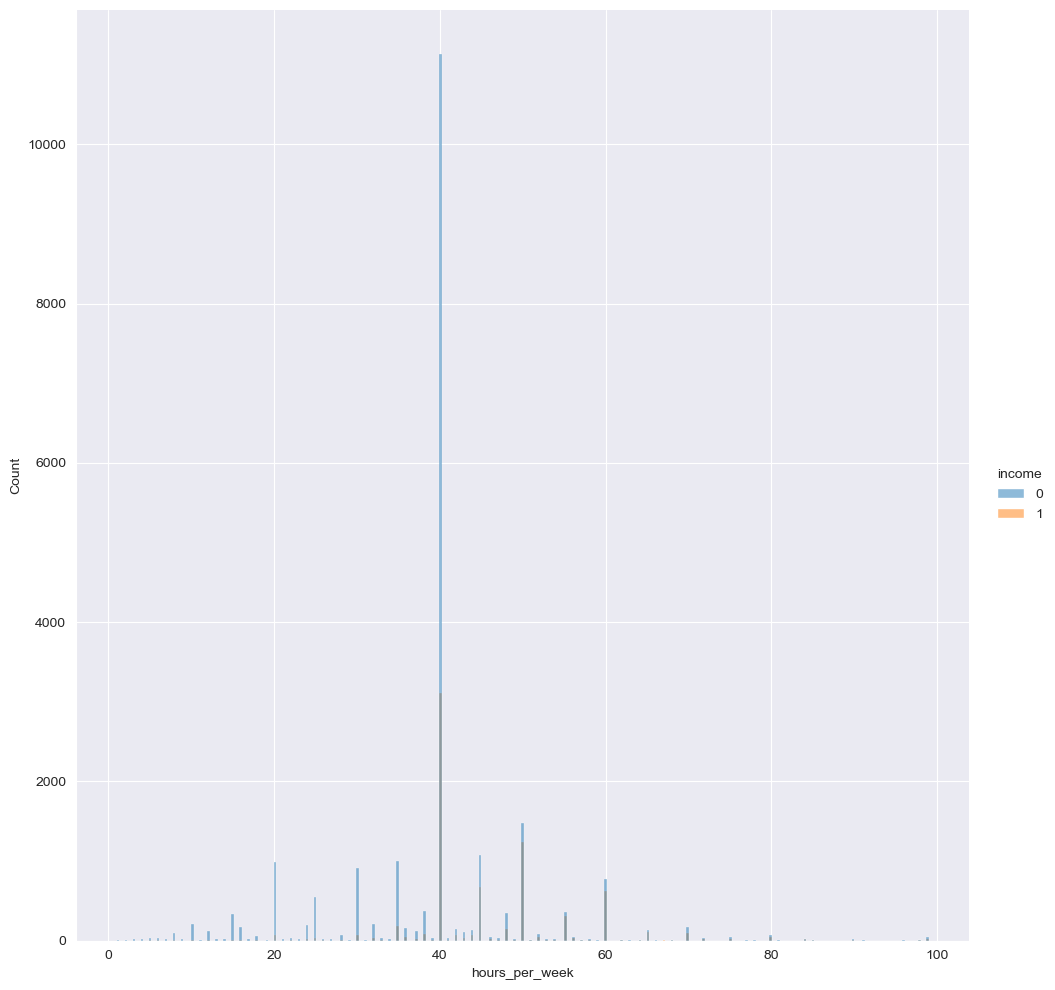

In [68]:
sns.displot(df_new, x="hours_per_week", hue="income",height=10, aspect=1)

There is large population who are contributing 40 hours per week with around 20% of those making income >=50k. Although not many contribute more than 60 hours per week, income >=50k seems to increase with increasing working hours per week. This is again linear relation.

# 8. For each pair of numeric variables, construct a scatter plot of the variables. Discuss the results.

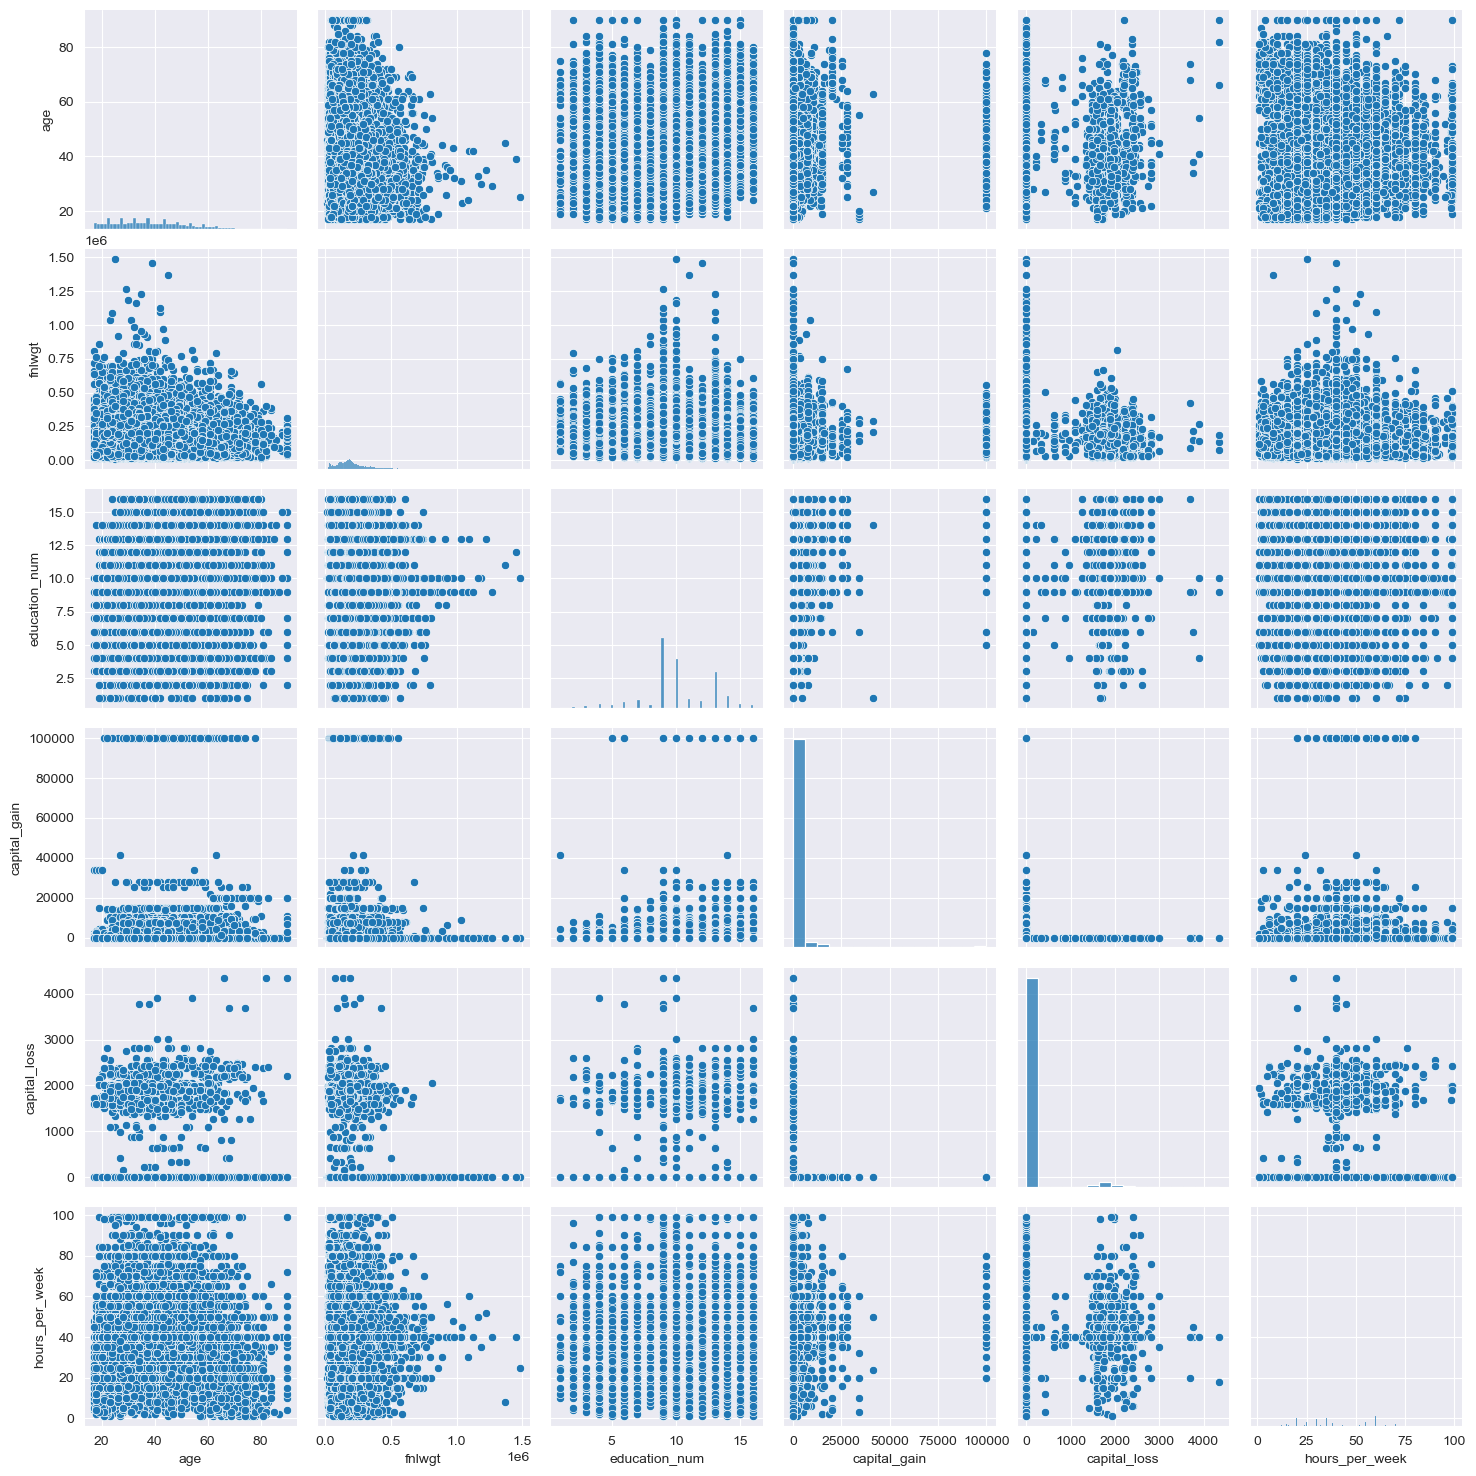

In [69]:
#Pairplot between features of numerical data
sns.pairplot(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])

From scatterplot,
The diagonal plots represent distribution of the variable relative to itself
Lets see relationship between features:
1. age and hours-per-week : The plot shows with increasing age, hours-per-week decreases.
2. age and capital-gain: There seems to be 2 categories of people.One who make <25000 capital gain and another with capital gain >100000. fnlwgt/capital gain and education-num/captial-gain too shows similar relation.
3. age and capital-loss: there seems to be 3 categories of people. One making 0 capital loss, another falling between 2000 to 3000 capital -loss. Another very few incurring loss of 4000.fnlwgt/capital-loss and education-num/capital-loss too shows similar relation.
4. There are significant rows with 0 capital gain and capital loss across all age groups.

# 9. Based on your EDA so far, identify the interesting sub-groups of records within the dataset that would be worth further investigation.

From EDA so far, other interesting sub-groups of records that would be worth further investigation are:-
The relation between age to capital_loss/capital gain, fnwgt with capital_gain/capital_loss fall into 3 categories. This reasoning is unknown. May need further investigation.


# 10. Summarize your salient EDA findings from the above exercises, just as if you were writing a report. 

From data preprocessing, we found that workclass,occupation and native_country had some null values(?) which were removed. And 24 duplicate records were found and removed.
Looking at frequency distribution, we could make out that large group of people are with native-country as united states, distibuted among white race and belong to private workclass.
About 75% of them earn <=50k income and 25% earn income >50k. people with status Married with spouse seem to be making more income >50k compared to other marital-relations. Most of those with higher education like doctorate,masters,bachelors seem to have income >50k(linear relationship here)
Hours-per-week seems to have strong linear relation with income.people 35-45 seems to be making income >50k. Income reduces with increase in age. Those with occupation of Exec-managerial and Prof-specialty occupation makes income >50k.
The below fields have strong relation with income in the order of probability 0.2 to 1. Its suggestive to get domain expert thought process from current findings to proceed further with other strong co-relations.
Married-civ-spouse    0.444609
Husband               0.400941
education_num         0.329787
capital_gain          0.278152
age                   0.272896
hours_per_week        0.269071
Male                  0.215969
Exec-managerial       0.214889
Female               -0.215969
Own-child            -0.228593
Never-married        -0.318285